# 加载数据

In [1]:
# 加载数据
import pandas as pd

# mml系统数据
# v1
# history_df = pd.read_excel(r'准备数据\MML系统数据\Histories (2022.08.05 08.30.51 AM GMT+00_00).xlsx')
# assessment_df = pd.read_excel(r'准备数据\MML系统数据\Resolved Assessments _ Tests (AUSTRALIA)  20220805.xlsx', sheet_name=1)

# v2
# access_log_df = pd.read_excel(r'准备数据\MML系统数据\Access Log - AU and IN - March to Aug - 20220811.xlsx')    # 澳洲和印度市场登录日志
wb0039_complement_df = pd.read_excel(r'准备数据\MML系统数据\Competencies - Sales Learning Programme - AU - (2022.08.11 08.31.42 AM GMT+00_00).xlsx', skiprows=lambda x : x in list(range(6)) + [7, 8])   # 澳洲市场WB0039等课程完成情况
assessment_df_IN = pd.read_excel(r'准备数据\MML系统数据\Resolved Assessments _ Tests (INDIA) (1).xlsx', sheet_name=1)   # 印度市场测验成绩
assessment_df_AU = pd.read_excel(r'准备数据\MML系统数据\Resolved Assessments _ Tests (AUSTRALIA)  20220805.xlsx', sheet_name=1) # 澳洲市场测验成绩
course_rating_IN_df = pd.read_excel(r'准备数据\MML系统数据\Resolved Course Ratings (INDIA).xlsx', sheet_name=1, skiprows=[1])   # 印度市场课程评分
course_rating_AU_df = pd.read_excel(r'准备数据\MML系统数据\Resolved Course Ratings (AUSTRALIA) (1).xlsx', sheet_name=1, skiprows=[1])     # 澳洲市场课程评分
wb0998_complement_df = pd.read_excel(r'准备数据\MML系统数据\Training Map - Sales Learning Programme - India (2022.08.11 08.30.12 AM GMT+00_00).xlsx', skiprows=lambda x : x in list(range(6)) + [7])   # 印度市场WB0998等课程完成情况
wb0982_complement_df = pd.read_excel(r'准备数据\MML系统数据\Training Map VCC5040 - AU and IN - (2022.08.11 08.26.42 AM GMT+00_00).xlsx', skiprows=lambda x : x in list(range(6)) + [7])   # 澳洲和印度市场WB0982等课程完成情况

# v3

# sales cloud系统数据
# lead_df = pd.read_csv(r'准备数据\Sales Could系统数据\lead.csv')
opportunity_df = pd.read_csv(r'准备数据\Sales Could系统数据\opportunity.csv')
opportunityid_ownerid_df = pd.read_csv(r'准备数据\Sales Could系统数据\opportunityid_ownerid.csv')
order_df = pd.read_csv(r'准备数据\Sales Could系统数据\order.csv')
test_drive_df = pd.read_csv(r'准备数据\Sales Could系统数据\testdrive.csv')
user_info_df = pd.read_csv(r'准备数据\Sales Could系统数据\user_info.csv')

# 处理MML系统数据

### 按Dealer维度统计Course Rating数量
1. 合并印度和澳洲市场Coure Rating文件
2. 将列AVERAGE重命名为Course Rating
3. 去除‘N’开头的DEALER CODE行
4. 为澳洲市场的DEALER CODE添加‘6AU’ (条件为原始的DEALER CODE的第二位为数字，否则保持原有DEALER CODE)
5. 按照MARKET, DEALER CODE, DEALER分组统计Course Rating数量
6. 按照DEALER排序输出结果CR_D_COUNT_df

In [2]:
# 按经销商维度统计课程评分数量
course_rating_df = pd.concat([course_rating_IN_df, course_rating_AU_df], axis=0, ignore_index=True)    # 合并印度和澳洲市场课程评分
course_rating_df.rename(columns={'AVERAGE': 'Course Rating'}, inplace=True)
course_rating_df['DEALER CODE'] = course_rating_df['DEALER CODE'].astype(str)
course_rating_df = course_rating_df[~course_rating_df['DEALER CODE'].str.startswith('N')]
for index, row in course_rating_df.iterrows():
    if row['MARKET'] == 'AUSTRALIA':
        course_rating_df.loc[index, 'DEALER CODE'] = '6' + row['MARKET'][:2] + row['DEALER CODE'] if row['DEALER CODE'][1].isdigit() else row['DEALER CODE']
        
CR_D_COUNT = course_rating_df.groupby(['MARKET','DEALER CODE', 'DEALER'])['Course Rating'].count()
CR_D_COUNT_df = CR_D_COUNT.reset_index()
CR_D_COUNT_df.sort_values(inplace=True, by=['DEALER'])
CR_D_COUNT_df

MARKET DEALER CODE                         DEALER  Course Rating
19      INDIA     6IN6044                      Ahmedabad              2
37      INDIA         nan               Allianz Partners              1
21      INDIA     6IN6045                      Bangalore              4
16      INDIA    6IN60381                        Calicut              1
23      INDIA     6IN6048                     Chandigarh              3
33      INDIA     6IN6072                        Chennai              3
34      INDIA     6IN6073                     Coimbatore              2
17      INDIA     6IN6043                       Gurugram              4
32      INDIA     6IN6071                      Hyderabad             13
29      INDIA     6IN6060                         Indore              2
36      INDIA     6IN6075                         Jaipur              2
15      INDIA     6IN6038                          Kochi             10
30      INDIA     6IN6061                        Kolkata              1
25      INDIA     6IN6054                        Lucknow              6
28      INDIA     6IN6058                       Ludhiana              2
31      INDIA     6IN6067       Martial Motors  Hubballi              1
24      INDIA   6IN6049S2                     Prabhadevi              2
26      INDIA     6IN6056                           Pune              1
35      INDIA     6IN6074                         Rajkot              1
27      INDIA     6IN6057                  Scandia Delhi              5
20      INDIA    6IN60441                          Surat              1
18      INDIA    6IN60431                   Viking Delhi              2
22      INDIA     6IN6046                          Vizag              2
14  AUSTRALIA     6AU5060            Volvo Cars Adelaide              1
4   AUSTRALIA     6AU2251       Volvo Cars Central Coast              2
8   AUSTRALIA     6AU2804        Volvo Cars Central West              1
9   AUSTRALIA     6AU3107           Volvo Cars Doncaster              2
0   AUSTRALIA     6AU2040           Volvo Cars Five Dock              3
12  AUSTRALIA     6AU3222             Volvo Cars Geelong              1
3   AUSTRALIA     6AU2173           Volvo Cars Liverpool              2
11  AUSTRALIA     6AU3206           Volvo Cars Melbourne              1
1   AUSTRALIA     6AU2088              Volvo Cars Mosman              2
2   AUSTRALIA     6AU2156          Volvo Cars Parramatta              1
7   AUSTRALIA     6AU2652            Volvo Cars Riverina              1
6   AUSTRALIA     6AU2580  Volvo Cars Southern Highlands              2
13  AUSTRALIA     6AU4556      Volvo Cars Sunshine Coast              2
5   AUSTRALIA     6AU2342            Volvo Cars Tamworth              1
10  AUSTRALIA     6AU3170            Volvo Cars Waverley              3

In [3]:
import os
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)

if not os.path.exists(f'figure'):
    os.mkdir(f'figure')

if not os.path.exists(f'Correlation'):
    os.mkdir(f'Correlation')


dir_list = ['QTY', 'STD', 'correlation']
for directory in dir_list:
    if not os.path.exists(f'figure/{directory}'):
        os.mkdir(f'figure/{directory}')


def plot(df: pd.DataFrame, name: str, title: str, by: str='DEALER', dir: str='STD'):
    """画图并保存

    Args:
        df (pd.DataFrame): 输入数据
        name (str): 显示数据列
        title (str): 标题
        by (str): 统计维度
        dir (str): 存放文件夹
    """

    df = df.reset_index()
    df.dropna(inplace=True)
    df['size'] = df[name] + 1

    fig = px.scatter(df,
                     x=by,
                     y=name,
                     color=name,
                     size='size')
    fig.update_layout(title=title,
                      title_font_size=20,
                      template='plotly_white',)
    fig.write_image(rf'figure/{dir}/{title}.svg')
    fig.write_image(rf'figure/{dir}/{title}.png', width=1000, height=500, scale=3)
    fig.show()


In [4]:
# 按经销商维度统计课程完成数量绘图
plot(CR_D_COUNT_df, 'Course Rating', 'QTY of Course Rating by Dealer', 'DEALER', dir='QTY')

In [5]:
# def plot_hist(df: pd.DataFrame, col: str, title: str):
#     """画直方图并保存

#     Args:
#         df (pd.DataFrame): 输入数据
#         col (str): 计算STD的列名
#         title (str): 标题
#     """
#     df_copy = df.copy()
#     df_copy = df_copy.reset_index()
#     df_copy.dropna(inplace=True)

#     fig = px.histogram(df_copy,
#                        x=col)
#     fig.update_layout(title=f"{title}'s STD is {df_copy[col].std():.2f}",
#                       title_font_size=20,
#                       template='plotly_white',)
#     fig.write_image(rf"figure/{title}'s STD.svg")
#     fig.write_image(rf"figure/{title}'s STD.png")
#     fig.show()


In [6]:
from matplotlib import pyplot as plt


def batch_plot_std(df: pd.DataFrame, x_label: str, by: str = 'Dealer'):
    """批量绘制std图并保存

    Args:
        df (pd.DataFrame): 输入数据
        x_label (str): x轴名称
        by (str, optional): 统计维度. Defaults to 'Dealer'.
    """
    group_col = 'DEALER CODE' if by == 'Dealer' else 'MARKET'
    groups = df[group_col].unique()
    for group in groups:
        df_copy = df.copy()
        group_df = df_copy[df_copy[group_col] == group].copy()
        group_df.dropna(subset=x_label, inplace=True)

        # if len(group_course_rating):
        #     group_name = group_course_rating['DEALER'].iloc[0]
        #     group_course_rating.rename(columns={'USER CODE':'SC'}, inplace=True)
        #     plot_hist(group_course_rating, "Course Rating", f'Course Rating of {group_name}')
        if len(group_df):
            if by == 'Dealer':
                group_name = group_df['DEALER'].iloc[0]
            else:
                group_name = group_df['MARKET'].iloc[0]

            group_df[x_label].plot(
                kind="hist", color="steelblue", edgecolor="black", label="直方图")
            plt.xlabel(x_label)
            plt.title(
                f"{x_label} of {group_name}'s STD is {group_df[x_label].std():.2f}")
            fig = plt.gcf()
            fig.savefig(rf'figure/STD/{x_label} of {group_name}.jpg', dpi=300)
            plt.show()


### 按Dealer维度统计Course Rating标准差
1. 按照MARKET, DEALER CODE, DEALER分组统计Course Rating标准差
2. 按照DEALER排序输出结果SD_CR_D_df

In [7]:
# 按经销商维度统计课程评分标准差
SD_CR_D = course_rating_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Course Rating'].std().round(2)
SD_CR_D.rename('SD_CR_D', inplace=True)
SD_CR_D_df = SD_CR_D.reset_index()
SD_CR_D_df.sort_values(inplace=True, by=['DEALER'])
SD_CR_D_df

MARKET DEALER CODE                         DEALER  SD_CR_D
19      INDIA     6IN6044                      Ahmedabad     0.23
37      INDIA         nan               Allianz Partners      NaN
21      INDIA     6IN6045                      Bangalore     0.66
16      INDIA    6IN60381                        Calicut      NaN
23      INDIA     6IN6048                     Chandigarh     0.19
33      INDIA     6IN6072                        Chennai     0.00
34      INDIA     6IN6073                     Coimbatore     0.00
17      INDIA     6IN6043                       Gurugram     0.50
32      INDIA     6IN6071                      Hyderabad     0.46
29      INDIA     6IN6060                         Indore     3.54
36      INDIA     6IN6075                         Jaipur     1.41
15      INDIA     6IN6038                          Kochi     0.51
30      INDIA     6IN6061                        Kolkata      NaN
25      INDIA     6IN6054                        Lucknow     1.22
28      INDIA     6IN6058                       Ludhiana     0.00
31      INDIA     6IN6067       Martial Motors  Hubballi      NaN
24      INDIA   6IN6049S2                     Prabhadevi     0.71
26      INDIA     6IN6056                           Pune      NaN
35      INDIA     6IN6074                         Rajkot      NaN
27      INDIA     6IN6057                  Scandia Delhi     0.00
20      INDIA    6IN60441                          Surat      NaN
18      INDIA    6IN60431                   Viking Delhi     0.00
22      INDIA     6IN6046                          Vizag     0.47
14  AUSTRALIA     6AU5060            Volvo Cars Adelaide      NaN
4   AUSTRALIA     6AU2251       Volvo Cars Central Coast     0.00
8   AUSTRALIA     6AU2804        Volvo Cars Central West      NaN
9   AUSTRALIA     6AU3107           Volvo Cars Doncaster     1.41
0   AUSTRALIA     6AU2040           Volvo Cars Five Dock     2.34
12  AUSTRALIA     6AU3222             Volvo Cars Geelong      NaN
3   AUSTRALIA     6AU2173           Volvo Cars Liverpool     0.23
11  AUSTRALIA     6AU3206           Volvo Cars Melbourne      NaN
1   AUSTRALIA     6AU2088              Volvo Cars Mosman     1.18
2   AUSTRALIA     6AU2156          Volvo Cars Parramatta      NaN
7   AUSTRALIA     6AU2652            Volvo Cars Riverina      NaN
6   AUSTRALIA     6AU2580  Volvo Cars Southern Highlands     0.23
13  AUSTRALIA     6AU4556      Volvo Cars Sunshine Coast     1.89
5   AUSTRALIA     6AU2342            Volvo Cars Tamworth      NaN
10  AUSTRALIA     6AU3170            Volvo Cars Waverley     2.71

In [8]:
# 按经销商维度统计课程评分标准差绘图 
plot(SD_CR_D_df, 'SD_CR_D', 'STD of Course Rating by Dealer', 'DEALER')

In [9]:
# 批量绘制Course Rating的DEALER STD图
# batch_plot_std(course_rating_df, 'Course Rating', 'Dealer')

### 按Market维度统计Course Rating数量
1. 按照MARKET分组统计Course Rating数量
2. 按照MARKET排序输出结果CR_M_COUNT_df

In [10]:
# 按市场维度统计课程评分数量
CR_M_COUNT = course_rating_df.groupby('MARKET')['Course Rating'].count()
CR_M_COUNT_df = CR_M_COUNT.reset_index()
CR_M_COUNT_df

MARKET  Course Rating
0  AUSTRALIA             25
1      INDIA             71

In [11]:
# 课程评分数量绘图
plot(CR_M_COUNT_df, 'Course Rating', 'QTY of Course Rating by Market', by='MARKET', dir='QTY')

### 按Market维度统计Course Rating标准差
1. 按照MARKET分组统计Course Rating标准差
2. 按照MARKET排序输出结果SD_CR_M_df

In [12]:
# 按市场维度统计课程评分标准差
SD_CR_M = course_rating_df.groupby('MARKET')['Course Rating'].std().round(2)
SD_CR_M.rename('SD_CR_M', inplace=True)
SD_CR_M_df = SD_CR_M.reset_index()
SD_CR_M_df

MARKET  SD_CR_M
0  AUSTRALIA     1.55
1      INDIA     0.87

In [13]:
# 批量绘制Course Rating的MARKET STD图
# batch_plot_std(course_rating_df, 'Course Rating', 'MARKET')

In [14]:
# 按MARKET维度统计课程评分标准差绘图 
plot(SD_CR_M_df, 'SD_CR_M', 'STD of Course Rating by Market', 'MARKET')

### 计算Course Completion, 培训开始日期START DATE, 最后一次参加培训日期LAST DATE, 完成培训日期列表DATE_LIST
1. 获取'COMPLETED', 'KNOWLEDGE GAP IDENTIFIED', 'IN PROGRESS', 'ENROLLED', 'ABSENT', 'NOT STARTED'对应的颜色存储为字典
2. 遍历记录课时完成状态的cell, 总课时为一行cell的数量记为ALL, 完成课时为cell颜色等于COMPLETED状态颜色的数量, 记为COMPLETED, 将每行为完成状态日期的最小值记为START DATE,最大值记为LAST DATE, 完成日期列表记为DATE LIST保存于sale_date_dict字典中

In [15]:
from openpyxl import load_workbook
excel_file = '准备数据\MML系统数据\Training Map - Sales Learning Programme - India (2022.08.11 08.30.12 AM GMT+00_00).xlsx' 
wb = load_workbook(excel_file, data_only = True)
sh = wb['Competencies']

# 获取状态颜色字典
color_in_hex = [cell.fill.start_color.index for cell in sh['AO:AO'][:6]]
status = ['COMPLETED', 'KNOWLEDGE GAP IDENTIFIED', 'IN PROGRESS', 'ENROLLED', 'ABSENT', 'NOT STARTED']
status_color_dict = dict(zip(status, color_in_hex))

sale_date_dict = dict()
# 统计完成课程数量
def cal_complete_lecture(min_row, min_col, sh, df):
    global sale_date_dict
    index = 0
    for row in sh.iter_rows(min_row=min_row, max_row=sh.max_row, min_col=min_col, max_col=sh.max_column):
        all_lecture = 0
        complete_lecture = 0
        start_date = None
        last_date = None
        date_list = list()
        for cell in row:
            if cell.fill.start_color.index == status_color_dict['COMPLETED']:
                complete_lecture += 1
                date_list.append(pd.to_datetime(cell.value, format='%d/%m/%Y'))
                if start_date is None and cell.value:
                    start_date = pd.to_datetime(cell.value, format='%d/%m/%Y')
                elif start_date is not None and cell.value:
                    if pd.to_datetime(cell.value, format='%d/%m/%Y') < start_date:
                        start_date = pd.to_datetime(cell.value, format='%d/%m/%Y')
                
                if last_date is None and cell.value:
                    last_date = pd.to_datetime(cell.value, format='%d/%m/%Y')
                elif last_date is not None and cell.value:
                    if pd.to_datetime(cell.value, format='%d/%m/%Y') > last_date:
                        last_date = pd.to_datetime(cell.value, format='%d/%m/%Y')
            all_lecture += 1
        df.loc[index, 'COMPLETED'] = complete_lecture
        df.loc[index, 'ALL'] = all_lecture
        df.loc[index, 'START DATE'] = start_date
        df.loc[index, 'LAST DATE'] = last_date
        sale_date_dict[df.loc[index, 'CDSID']] = sale_date_dict.get(df.loc[index, 'CDSID'], []) + date_list
        index += 1
    return df

# 统计wb0039课程完成数量
min_row = 9
min_col = 13
wb0998_complement_df = cal_complete_lecture(min_row, min_col, sh, wb0998_complement_df)

# 统计wb0982课程完成数量
excel_file = '准备数据\MML系统数据\Training Map VCC5040 - AU and IN - (2022.08.11 08.26.42 AM GMT+00_00).xlsx'
wb = load_workbook(excel_file, data_only = True)
sh = wb['Competencies']
min_row = 9
min_col = 13
wb0982_complement_df = cal_complete_lecture(min_row, min_col, sh, wb0982_complement_df)

# 统计wb0039课程完成数量
excel_file = '准备数据\MML系统数据\Competencies - Sales Learning Programme - AU - (2022.08.11 08.31.42 AM GMT+00_00).xlsx'
wb = load_workbook(excel_file, data_only = True)
sh = wb['1 Sales (previously Consultativ']
min_row = 10
min_col = 16
wb0039_complement_df = cal_complete_lecture(min_row, min_col, sh, wb0039_complement_df)

### 按Dealer维度统计Course Completion数量以及计算Sale开始培训日期START DATE, 最后一次参加培训日期LAST DATE
1. 取wb0998_complement_df，wb0982_complement_df，wb0039_complement_df的共同列
2. 按照共同列合并wb0998_complement_df，wb0982_complement_df，wb0039_complement_df
3. 将列COMPLETED重命名为Course Completion
4. 去除‘N’开头的DEALER CODE行
5. 为澳洲市场的DEALER CODE添加‘6AU’ (条件为原始的DEALER CODE的第二位为数字，否则保持原有DEALER CODE)
6. 按照MARKET, DEALER CODE, DEALER, CDSID分组对Course Completion求和计算每个Sale的完成课时和总课时，分组对START DATE求最小值计算每个Sale的开始培训日期, 分组对LAST DATE求最大值计算每个Sale最后一次参加培训日期
7. 按照MARKET, DEALER CODE, DEALER分组统计每个Dealer的Sales数量
8. 按照DEALER排序输出结果CR_D_COUNT_df

In [16]:
# 按经销商维度统计课程完成数量标准差
common_columns = list(set(wb0998_complement_df.columns) & set(wb0982_complement_df.columns) & set(wb0039_complement_df.columns))
complement_df = pd.concat([wb0998_complement_df[common_columns], wb0982_complement_df[common_columns],wb0039_complement_df[common_columns]], axis=0, ignore_index=True)
complement_df.rename(columns={'COMPLETED': 'Course Completion'}, inplace=True)

complement_df['DEALER CODE'] = complement_df['DEALER CODE'].astype(str)
complement_df = complement_df[~complement_df['DEALER CODE'].str.startswith('N')]

for index, row in complement_df.iterrows():
    if row['MARKET'] == 'AUSTRALIA':
        complement_df.loc[index, 'DEALER CODE'] = '6AU' + row['DEALER CODE'] if row['DEALER CODE'][1].isdigit() else row['DEALER CODE']

complement_df = complement_df.groupby(['MARKET', 'DEALER CODE', 'DEALER', 'CDSID']).agg({'ALL': 'sum', 'Course Completion': 'sum', 'START DATE': 'min', 'LAST DATE': 'max'}).reset_index()

CC_D_COUNT = complement_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Course Completion'].count()
CC_D_COUNT.rename('QTY', inplace=True)
CC_D_COUNT_df = CC_D_COUNT.reset_index()
CC_D_COUNT_df

MARKET DEALER CODE                         DEALER  QTY
0   AUSTRALIA     6AU2014     Volvo Cars Rushcutters Bay    5
1   AUSTRALIA     6AU2040           Volvo Cars Five Dock    7
2   AUSTRALIA     6AU2068           Volvo Cars Lindfield    4
3   AUSTRALIA     6AU2088              Volvo Cars Mosman    4
4   AUSTRALIA     6AU2156          Volvo Cars Parramatta    6
5   AUSTRALIA     6AU2173           Volvo Cars Liverpool    3
6   AUSTRALIA     6AU2230          Volvo Cars Sutherland    2
7   AUSTRALIA     6AU2251       Volvo Cars Central Coast    2
8   AUSTRALIA     6AU2292           Volvo Cars Newcastle    3
9   AUSTRALIA     6AU2342            Volvo Cars Tamworth    4
10  AUSTRALIA     6AU2580  Volvo Cars Southern Highlands    3
11  AUSTRALIA     6AU2605            Volvo Cars Canberra    3
12  AUSTRALIA     6AU2652            Volvo Cars Riverina    3
13  AUSTRALIA     6AU2754             Volvo Cars Penrith    3
14  AUSTRALIA     6AU2804        Volvo Cars Central West    2
15  AUSTRALIA     6AU3040            Volvo Cars Essendon    4
16  AUSTRALIA     6AU3107           Volvo Cars Doncaster    5
17  AUSTRALIA     6AU3112         Volvo Cars South Yarra    6
18  AUSTRALIA     6AU3170            Volvo Cars Waverley    7
19  AUSTRALIA     6AU3187            Volvo Cars Brighton    6
20  AUSTRALIA     6AU3206           Volvo Cars Melbourne    7
21  AUSTRALIA     6AU3222             Volvo Cars Geelong    4
22  AUSTRALIA     6AU3807             Volvo Cars Berwick    1
23  AUSTRALIA     6AU4008      Volvo Cars Brisbane North   10
24  AUSTRALIA     6AU4128          Volvo Cars Springwood    4
25  AUSTRALIA     6AU4213          Volvo Cars Gold Coast    3
26  AUSTRALIA     6AU4556      Volvo Cars Sunshine Coast    2
27  AUSTRALIA     6AU4816          Volvo Cars Townsville    3
28  AUSTRALIA     6AU4875              Volvo Cars Cairns    1
29  AUSTRALIA     6AU5060            Volvo Cars Adelaide    4
30  AUSTRALIA     6AU6017               Volvo Cars Perth    9
31  AUSTRALIA     6AU6107          Volvo Cars Cannington    1
32  AUSTRALIA     6AU7004              Volvo Cars Hobart    4
33  AUSTRALIA     6AU7254          Volvo Cars Launceston    2
34      INDIA     6IN6038                          Kochi    5
35      INDIA    6IN60381                        Calicut    2
36      INDIA     6IN6043                       Gurugram    5
37      INDIA    6IN60431                   Viking Delhi    4
38      INDIA     6IN6044                      Ahmedabad    6
39      INDIA    6IN60441                          Surat    1
40      INDIA     6IN6045                      Bangalore    7
41      INDIA     6IN6048                     Chandigarh    3
42      INDIA     6IN6049                        Andheri    2
43      INDIA   6IN6049S2                     Prabhadevi    3
44      INDIA     6IN6054                        Lucknow    4
45      INDIA     6IN6056                           Pune    4
46      INDIA     6IN6057                  Scandia Delhi    6
47      INDIA     6IN6058                       Ludhiana    2
48      INDIA     6IN6059                         Raipur    4
49      INDIA     6IN6060                         Indore    2
50      INDIA     6IN6061                        Kolkata    3
51      INDIA     6IN6071                      Hyderabad    7
52      INDIA     6IN6072                        Chennai    5
53      INDIA     6IN6073                     Coimbatore    5
54      INDIA     6IN6074                         Rajkot    1
55      INDIA     6IN6075                         Jaipur    4

In [17]:
plot(CC_D_COUNT, 'QTY', 'QTY of Course Completion by Dealer', by='DEALER', dir='QTY')

### 仿照客户RFM模型对Sale进行分层处理
1. Recency = Max(LAST DATE) + 1 - LAST DATE<sub>Sale</sub> Sale最后一次参加培训时间距离“现在时间”的时间差（公式中以所有Sale最后一次参加培训的时间的最大值+1天代替“现在时间”）
2. Frequency = Course Completion / (LAST DATE - START DATE + 1) Sale在单位时间参加培训时间的频次
3. ~~Monetary = Course Post-Test Score Sale在参加培训后的成绩~~ (对应的成绩量太少 舍去该步骤)
4. 对Recency Frequency Course Completion进行数据标准化
5. Recency Rank 按从小到大排序Recency
6. Frequency Rank 按从大到小排序Frequency
7. Completion Rank 按从大到小排序Course Completion
8. 综合排名Rank = rank(Recency Rank + Frequency Rank + Completion Rank)
9. Start Rank 按从早到晚排序Sale的开始学习时间

In [18]:
import datetime
# RFM统计
max_date = complement_df["LAST DATE"].max() + datetime.timedelta(days=1)
complement_df['Recency'] = (max_date - complement_df["LAST DATE"]).dt.days    # Recency
complement_df['Frequency'] = complement_df["Course Completion"] / ((complement_df['LAST DATE'] - complement_df['START DATE']).dt.days + 1)  # Frequency
# complement_df = pd.merge(complement_df, assessment_df[['USER CODE', 'Course Post-Test Score']], left_on='CDSID', right_on='USER CODE', how='left')

array([[<AxesSubplot:title={'center':'START DATE'}>,
        <AxesSubplot:title={'center':'LAST DATE'}>],
       [<AxesSubplot:title={'center':'Course Completion'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'Frequency'}>, <AxesSubplot:>]],
      dtype=object)

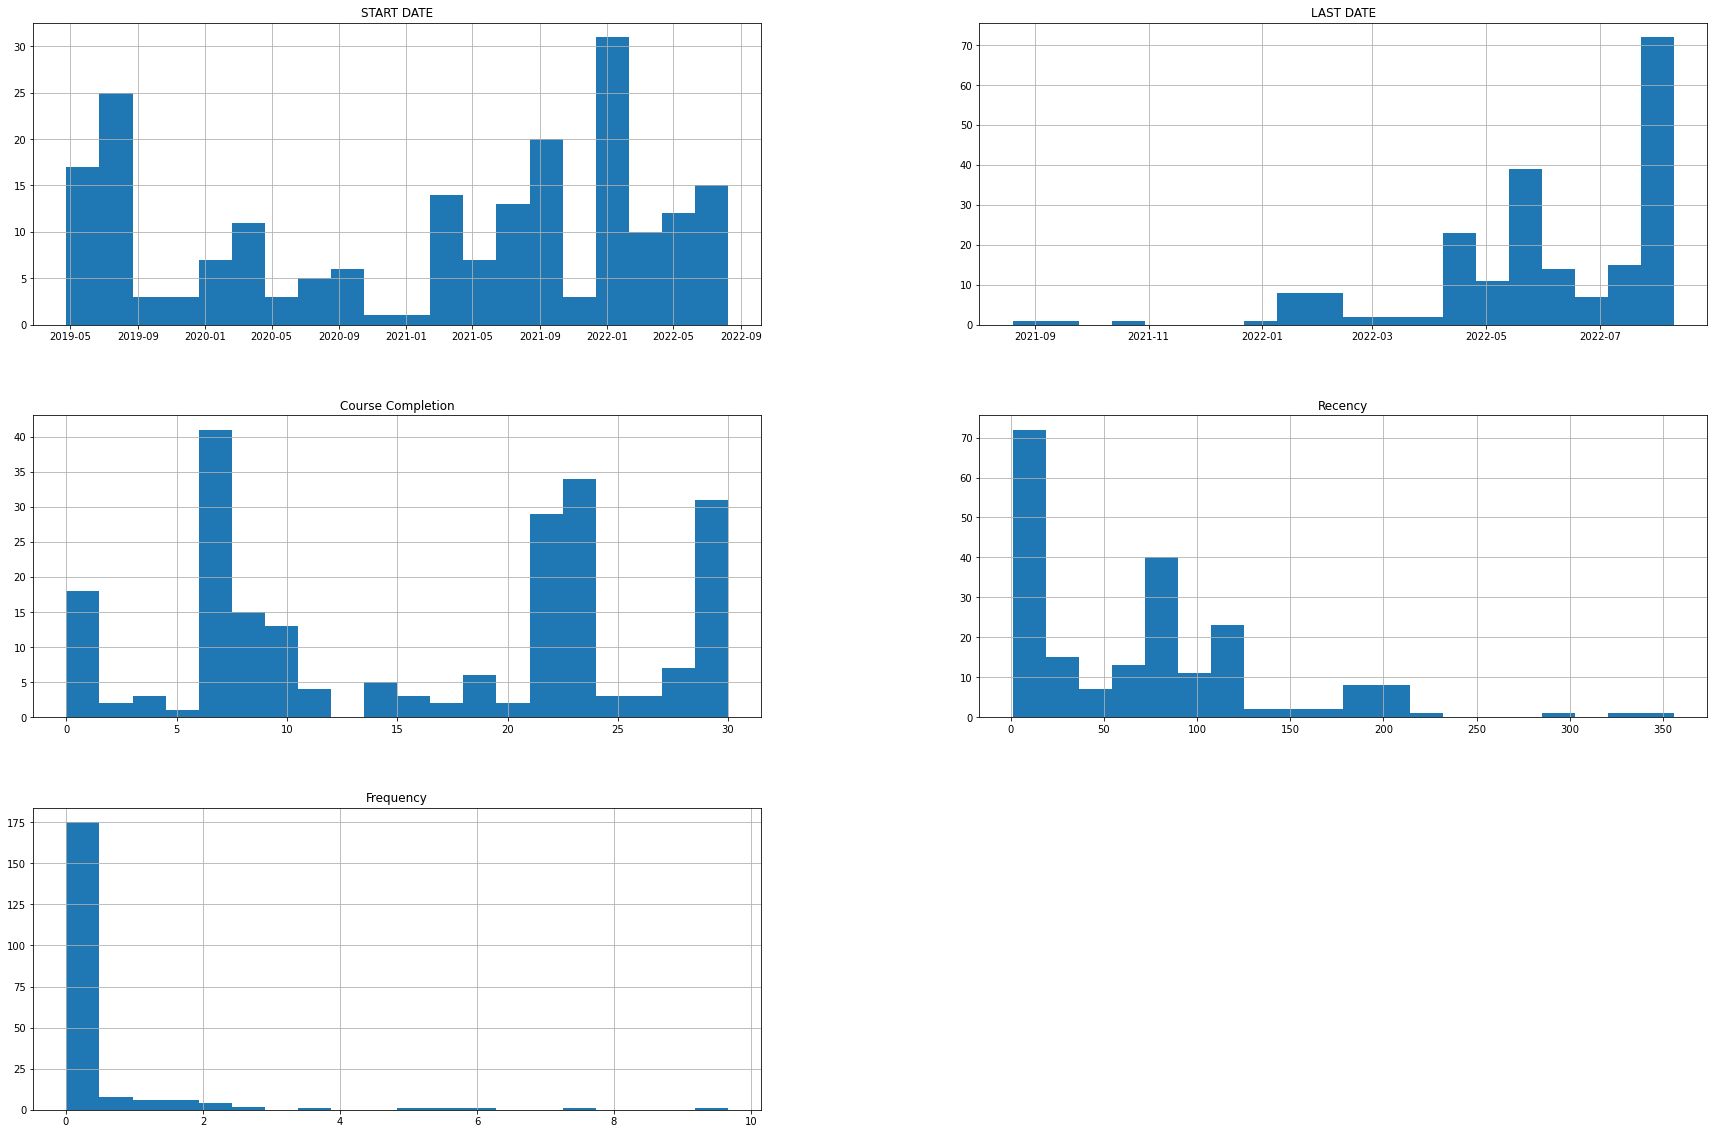

In [19]:
col_list = ['START DATE', 'LAST DATE', 'Course Completion', 'Recency', 'Frequency']
complement_df[col_list].hist(bins=20, figsize = (30,20))

In [20]:
class CleanData:
    def __init__(self, data):
        self.data = data

    @staticmethod
    def filter_extreme_3sigma(df, n=3):
        """3sigma去极值法

        Args:
            df (DataFrame): 输入数据
            n (int, optional): 极值标准差倍数. Defaults to 3.

        Returns:
            DataFrame: 去极值后的数据
        """
        mean = df.mean()
        std = df.std()
        max_range = mean + n * std
        min_range = mean - n * std
        return df.clip(min_range, max_range, axis=1)

    @staticmethod
    def filter_extreme_mad(df, n=5):
        """中位数去极值法

        Args:
            series (_type_): _description_
            n (_type_): _description_

        Returns:
            _type_: _description_
        """
        median = df.median()
        mad = df.mad()
        max_range = median + n * mad
        min_range = median - n * mad
        return df.clip(min_range, max_range, axis=1)

    @staticmethod
    def z_score(df):
        """Z-score转换

        Args:
            df (DataFrame): 输入数据

        Returns:
            DataFrame: Z-score转换后的数据
        """
        return (df - df.mean()) / df.std()

    @staticmethod
    def fill_nan(df):
        """均值法填充缺失值

        Args:
            df (DataFrame): 输入数据

        Returns:
            DataFrame: 填充均值后的数据
        """
        return df.fillna(df.mean())

    def process(self, n=3):
        # self.data = self.filter_extreme_3sigma(self.data, n)
        self.data = self.filter_extreme_mad(self.data, n)
        self.data = self.z_score(self.data)
        # self.data = self.fill_nan(self.data)
        return self.data

array([[<AxesSubplot:title={'center':'Course Completion'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'Frequency'}>, <AxesSubplot:>]],
      dtype=object)

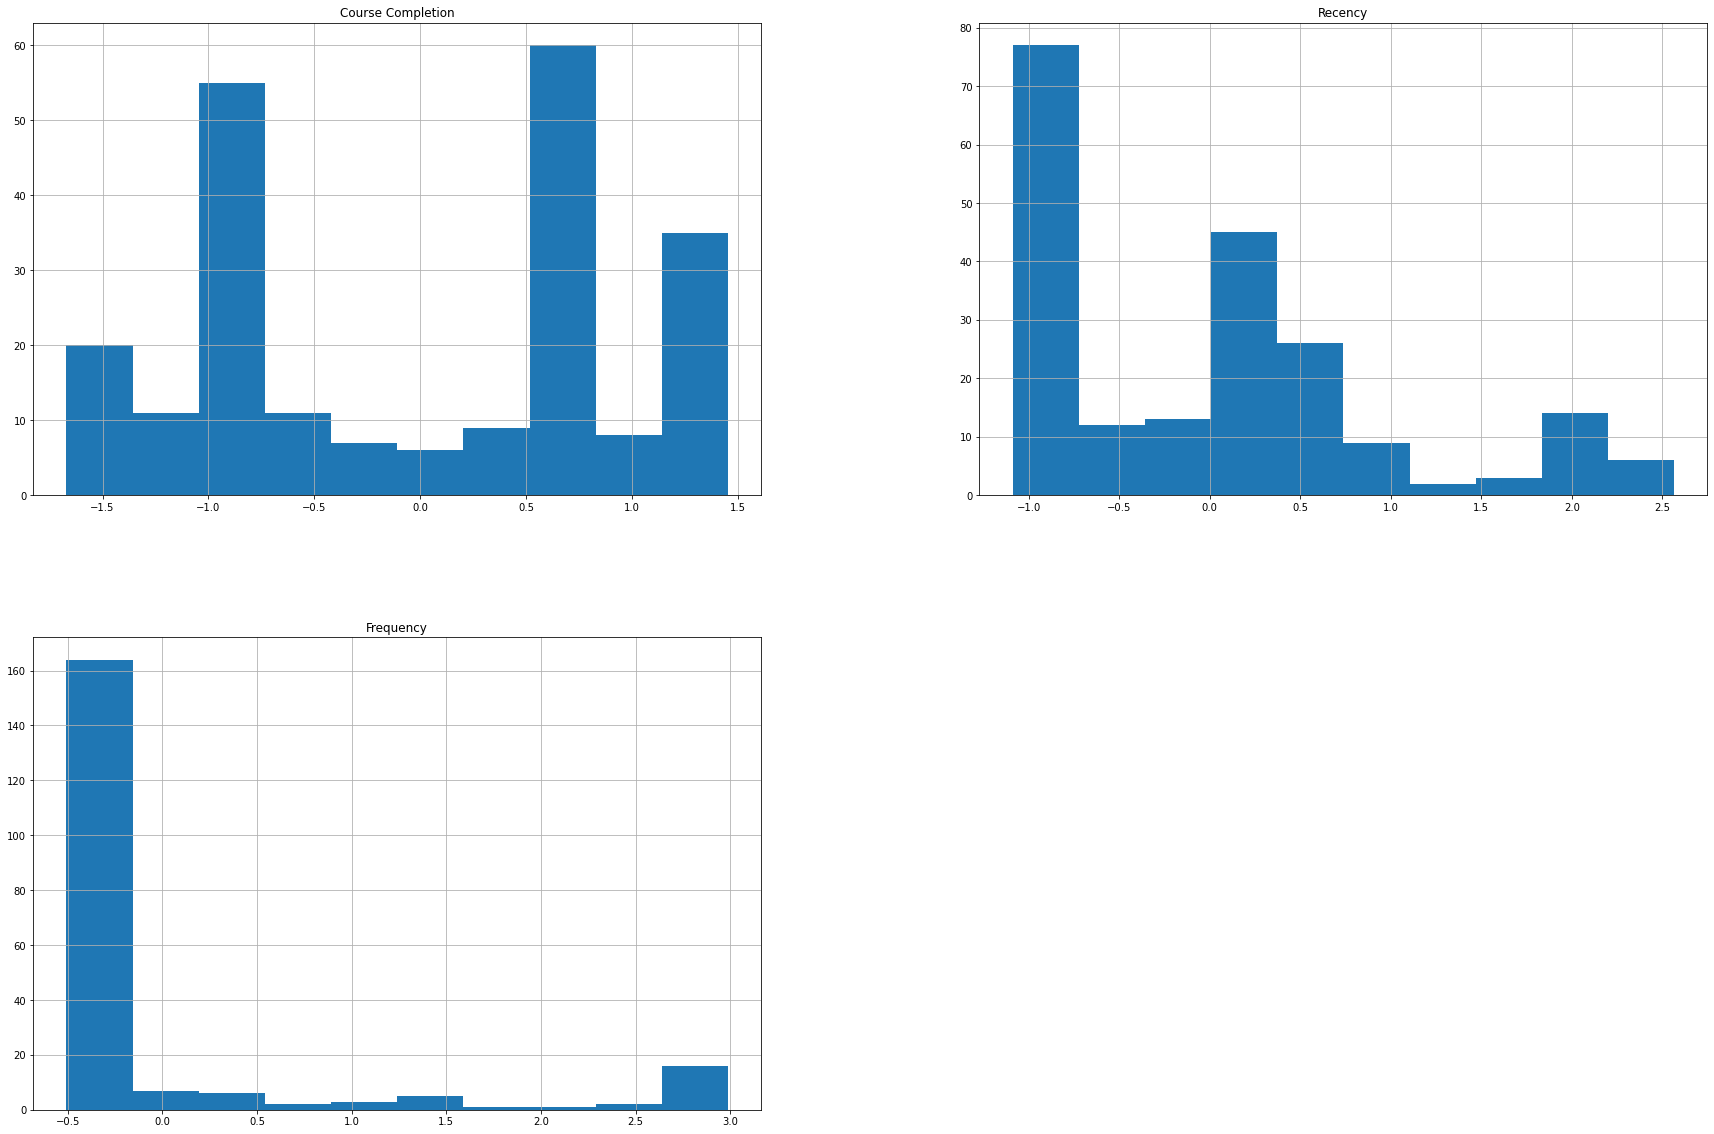

In [21]:
clean_complement_df = CleanData(complement_df[col_list[-3:]]).process(3)
clean_complement_df[col_list[-3:]].hist(bins=10, figsize = (30,20))

In [22]:
complement_df['Recency Rank'] = clean_complement_df['Recency'].rank(method='min', ascending=True, pct=True)
complement_df['Frequency Rank'] = clean_complement_df['Frequency'].rank(method='min', ascending=False, pct=True)
complement_df['Completion Rank'] = clean_complement_df['Course Completion'].rank(method='min', ascending=False, pct=True)
complement_df['Start Rank'] = complement_df['START DATE'].rank(method='min', ascending=True, pct=True)
complement_df['Rank'] = complement_df['Recency Rank'] + complement_df['Frequency Rank'] + complement_df['Completion Rank']
complement_df['Rank'] = complement_df['Rank'].rank(method='min', ascending=True, pct=True)

In [23]:
recency_median = complement_df['Recency'].median()
complement_df['Recency Binary'] = complement_df['Recency'].apply(lambda x: 1 if x < recency_median else 0)
frequency_median = complement_df['Frequency'].median()
complement_df['Frequency Binary'] = complement_df['Frequency'].apply(lambda x: 1 if x > frequency_median else 0)
completion_median = complement_df['Course Completion'].median()
complement_df['Completion Binary'] = complement_df['Frequency'].apply(lambda x: 1 if x > frequency_median else 0)

### 按Dealer维度统计Course Completion标准差
1. 按照MARKET, DEALER CODE, DEALER分组统计Course Completion标准差
2. 按照DEALER排序输出结果SD_CC_D_df

In [24]:
SD_CC_D = complement_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Course Completion'].std().round(2)
SD_CC_D.rename('SD_CC_D', inplace=True)
SD_CC_D_df = SD_CC_D.reset_index()
SD_CC_D_df.sort_values(inplace=True, by=['DEALER'])
SD_CC_D_df

MARKET DEALER CODE                         DEALER  SD_CC_D
38      INDIA     6IN6044                      Ahmedabad     3.20
42      INDIA     6IN6049                        Andheri     1.41
40      INDIA     6IN6045                      Bangalore     0.00
35      INDIA    6IN60381                        Calicut     0.00
41      INDIA     6IN6048                     Chandigarh     2.08
52      INDIA     6IN6072                        Chennai    11.52
53      INDIA     6IN6073                     Coimbatore    12.78
36      INDIA     6IN6043                       Gurugram     2.17
51      INDIA     6IN6071                      Hyderabad     0.00
49      INDIA     6IN6060                         Indore    14.85
55      INDIA     6IN6075                         Jaipur     0.00
34      INDIA     6IN6038                          Kochi     0.89
50      INDIA     6IN6061                        Kolkata     0.00
44      INDIA     6IN6054                        Lucknow     3.00
47      INDIA     6IN6058                       Ludhiana     0.00
43      INDIA   6IN6049S2                     Prabhadevi     0.58
45      INDIA     6IN6056                           Pune    11.18
48      INDIA     6IN6059                         Raipur    12.70
54      INDIA     6IN6074                         Rajkot      NaN
46      INDIA     6IN6057                  Scandia Delhi     1.76
39      INDIA    6IN60441                          Surat      NaN
37      INDIA    6IN60431                   Viking Delhi     0.58
29  AUSTRALIA     6AU5060            Volvo Cars Adelaide    11.12
22  AUSTRALIA     6AU3807             Volvo Cars Berwick      NaN
19  AUSTRALIA     6AU3187            Volvo Cars Brighton     2.56
23  AUSTRALIA     6AU4008      Volvo Cars Brisbane North     4.16
28  AUSTRALIA     6AU4875              Volvo Cars Cairns      NaN
11  AUSTRALIA     6AU2605            Volvo Cars Canberra     3.61
31  AUSTRALIA     6AU6107          Volvo Cars Cannington      NaN
7   AUSTRALIA     6AU2251       Volvo Cars Central Coast     0.71
14  AUSTRALIA     6AU2804        Volvo Cars Central West     4.95
16  AUSTRALIA     6AU3107           Volvo Cars Doncaster     6.46
15  AUSTRALIA     6AU3040            Volvo Cars Essendon    14.28
1   AUSTRALIA     6AU2040           Volvo Cars Five Dock    10.78
21  AUSTRALIA     6AU3222             Volvo Cars Geelong     7.27
25  AUSTRALIA     6AU4213          Volvo Cars Gold Coast     6.11
32  AUSTRALIA     6AU7004              Volvo Cars Hobart     2.63
33  AUSTRALIA     6AU7254          Volvo Cars Launceston     2.83
2   AUSTRALIA     6AU2068           Volvo Cars Lindfield     8.45
5   AUSTRALIA     6AU2173           Volvo Cars Liverpool    15.70
20  AUSTRALIA     6AU3206           Volvo Cars Melbourne     9.47
3   AUSTRALIA     6AU2088              Volvo Cars Mosman    11.15
8   AUSTRALIA     6AU2292           Volvo Cars Newcastle    14.01
4   AUSTRALIA     6AU2156          Volvo Cars Parramatta    10.92
13  AUSTRALIA     6AU2754             Volvo Cars Penrith     9.24
30  AUSTRALIA     6AU6017               Volvo Cars Perth     8.95
12  AUSTRALIA     6AU2652            Volvo Cars Riverina    16.07
0   AUSTRALIA     6AU2014     Volvo Cars Rushcutters Bay     6.22
17  AUSTRALIA     6AU3112         Volvo Cars South Yarra    10.73
10  AUSTRALIA     6AU2580  Volvo Cars Southern Highlands     3.00
24  AUSTRALIA     6AU4128          Volvo Cars Springwood     3.69
26  AUSTRALIA     6AU4556      Volvo Cars Sunshine Coast     4.95
6   AUSTRALIA     6AU2230          Volvo Cars Sutherland     4.95
9   AUSTRALIA     6AU2342            Volvo Cars Tamworth     7.97
27  AUSTRALIA     6AU4816          Volvo Cars Townsville    15.01
18  AUSTRALIA     6AU3170            Volvo Cars Waverley     9.21

In [25]:
# batch_plot_std(complement_df, 'Course Completion', 'Dealer')

In [26]:
# 按经销商维度统计课程完成数量标准差绘图
plot(SD_CC_D_df, 'SD_CC_D', 'STD of Course Completion by Dealer', by='DEALER', dir='STD')

### 按Market维度统计Course Completion数量
1. 按照MARKET分组统计Course Completion数量
2. 按照MARKET排序输出结果CC_M_COUNT_df

In [27]:
# 按MARKET维度统计课程完成数量
CC_M_COUNT = complement_df.groupby(['MARKET'])['Course Completion'].count()
CC_M_COUNT.rename('QTY', inplace=True)
CC_M_COUNT_df = CC_M_COUNT.reset_index()
CC_M_COUNT_df.sort_values('MARKET', inplace=True)
CC_M_COUNT_df

MARKET  QTY
0  AUSTRALIA  137
1      INDIA   85

In [28]:
plot(CC_M_COUNT_df, 'QTY', 'QTY of Course Completion by Market', by='MARKET', dir='QTY' )

### 按Market维度统计Course Completion标准差
1. 按照MARKET分组统计Course Completion标准差
2. 按照MARKET排序输出结果SD_CC_M_df

In [29]:
SD_CC_M = complement_df.groupby('MARKET')['Course Completion'].std().round(2)
SD_CC_M.rename('SD_CC_M', inplace=True)
SD_CC_M_df = SD_CC_M.reset_index() 
SD_CC_M_df

MARKET  SD_CC_M
0  AUSTRALIA     9.07
1      INDIA     7.10

In [30]:
# batch_plot_std(complement_df, 'Course Completion', 'Market')

In [31]:
# 按市场维度统计课程完成数量标准差绘图
plot(SD_CC_M_df, 'SD_CC_M', 'STD of Course Completion by Market', by='MARKET')

### 按Dealer维度统计Course Post-Test Score数量
1. 合并印度和澳洲市场assessment文件
2. 将列GRADE重命名为Course Post-Test Score
3. 去除全为空的行
4. 按DATE倒序排列数据
5. 同一个USER CODE只保留最近日期的成绩
6. 去除‘N’开头的DEALER CODE行
7. 为澳洲市场的DEALER CODE添加‘6AU’ (条件为原始的DEALER CODE的第二位为数字，否则保持原有DEALER CODE)
8. 按照MARKET, DEALER CODE, DEALER分组统计每个Dealer的Sales数量
9. 按照DEALER排序输出结果CR_D_COUNT_df

In [32]:
assessment_df = pd.concat([assessment_df_AU, assessment_df_IN], axis=0, ignore_index=True)
assessment_df.rename(columns={'GRADE':'Course Post-Test Score'}, inplace=True)
assessment_df.dropna(how='all', inplace=True)
assessment_df.sort_values(by='DATE', ascending=False, inplace=True)
assessment_df.drop_duplicates(subset=['DEALER CODE', 'USER CODE'], keep='first', inplace=True)

assessment_df['DEALER CODE'] = assessment_df['DEALER CODE'].astype(str)
assessment_df = assessment_df[~assessment_df['DEALER CODE'].str.startswith('N')]

for index, row in assessment_df.iterrows():
    if row['MARKET'] == 'AUSTRALIA':
        assessment_df.loc[index, 'DEALER CODE'] = '6AU' + row['DEALER CODE'] if row['DEALER CODE'][1].isdigit() else row['DEALER CODE']


# 按经销商维度统计课程测验分数标准差
CPT_D_COUNT = assessment_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Course Post-Test Score'].count()
CPT_D_COUNT.rename('QTY', inplace=True)
CPT_D_COUNT_df = CPT_D_COUNT.reset_index()
CPT_D_COUNT_df.sort_values('DEALER', inplace=True)
CPT_D_COUNT_df

MARKET DEALER CODE                         DEALER  QTY
27      INDIA     6IN6045                      Bangalore    2
29      INDIA     6IN6073                     Coimbatore    1
28      INDIA     6IN6067       Martial Motors  Hubballi    1
23  AUSTRALIA     6AU5060            Volvo Cars Adelaide    3
18  AUSTRALIA     6AU3807             Volvo Cars Berwick    3
16  AUSTRALIA     6AU3187            Volvo Cars Brighton   10
19  AUSTRALIA     6AU4008      Volvo Cars Brisbane North    7
9   AUSTRALIA     6AU2605            Volvo Cars Canberra    2
12  AUSTRALIA     6AU2804        Volvo Cars Central West    4
13  AUSTRALIA     6AU3107           Volvo Cars Doncaster   21
1   AUSTRALIA     6AU2040           Volvo Cars Five Dock   19
21  AUSTRALIA     6AU4213          Volvo Cars Gold Coast    5
25  AUSTRALIA     6AU7004              Volvo Cars Hobart    1
26  AUSTRALIA     6AU7254          Volvo Cars Launceston    3
2   AUSTRALIA     6AU2068           Volvo Cars Lindfield   13
17  AUSTRALIA     6AU3206           Volvo Cars Melbourne   11
3   AUSTRALIA     6AU2088              Volvo Cars Mosman    6
6   AUSTRALIA     6AU2292           Volvo Cars Newcastle    1
4   AUSTRALIA     6AU2156          Volvo Cars Parramatta   11
11  AUSTRALIA     6AU2754             Volvo Cars Penrith    1
24  AUSTRALIA     6AU6017               Volvo Cars Perth    3
10  AUSTRALIA     6AU2652            Volvo Cars Riverina    4
0   AUSTRALIA     6AU2014     Volvo Cars Rushcutters Bay    4
14  AUSTRALIA     6AU3112         Volvo Cars South Yarra   11
8   AUSTRALIA     6AU2580  Volvo Cars Southern Highlands    3
20  AUSTRALIA     6AU4128          Volvo Cars Springwood    1
22  AUSTRALIA     6AU4556      Volvo Cars Sunshine Coast    1
5   AUSTRALIA     6AU2230          Volvo Cars Sutherland    6
7   AUSTRALIA     6AU2342            Volvo Cars Tamworth    1
15  AUSTRALIA     6AU3170            Volvo Cars Waverley    6

In [33]:
plot(CPT_D_COUNT_df, 'QTY', 'QTY of Course Post-Test Score by Dealer', by='DEALER', dir='QTY')

### 按Dealer维度统计Course Post-Test Score标准差
1. 按照MARKET, DEALER CODE, DEALER分组统计Course Post-Test Score标准差
2. 按照DEALER排序输出结果SD_CPT_D_df

In [34]:
SD_CPT_D = assessment_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Course Post-Test Score'].std().round(2)
SD_CPT_D.rename('SD_CPT_D', inplace=True)
SD_CPT_D_df = SD_CPT_D.reset_index()
SD_CPT_D_df.sort_values(inplace=True, by=['DEALER'])
SD_CPT_D_df

MARKET DEALER CODE                         DEALER  SD_CPT_D
27      INDIA     6IN6045                      Bangalore      4.16
29      INDIA     6IN6073                     Coimbatore       NaN
28      INDIA     6IN6067       Martial Motors  Hubballi       NaN
23  AUSTRALIA     6AU5060            Volvo Cars Adelaide     32.40
18  AUSTRALIA     6AU3807             Volvo Cars Berwick      3.40
16  AUSTRALIA     6AU3187            Volvo Cars Brighton      3.04
19  AUSTRALIA     6AU4008      Volvo Cars Brisbane North     17.46
9   AUSTRALIA     6AU2605            Volvo Cars Canberra     24.96
12  AUSTRALIA     6AU2804        Volvo Cars Central West     27.38
13  AUSTRALIA     6AU3107           Volvo Cars Doncaster     20.20
1   AUSTRALIA     6AU2040           Volvo Cars Five Dock     10.71
21  AUSTRALIA     6AU4213          Volvo Cars Gold Coast      7.20
25  AUSTRALIA     6AU7004              Volvo Cars Hobart       NaN
26  AUSTRALIA     6AU7254          Volvo Cars Launceston     27.17
2   AUSTRALIA     6AU2068           Volvo Cars Lindfield     14.68
17  AUSTRALIA     6AU3206           Volvo Cars Melbourne      0.00
3   AUSTRALIA     6AU2088              Volvo Cars Mosman     29.68
6   AUSTRALIA     6AU2292           Volvo Cars Newcastle       NaN
4   AUSTRALIA     6AU2156          Volvo Cars Parramatta      2.38
11  AUSTRALIA     6AU2754             Volvo Cars Penrith       NaN
24  AUSTRALIA     6AU6017               Volvo Cars Perth      5.89
10  AUSTRALIA     6AU2652            Volvo Cars Riverina      0.00
0   AUSTRALIA     6AU2014     Volvo Cars Rushcutters Bay     10.19
14  AUSTRALIA     6AU3112         Volvo Cars South Yarra     25.64
8   AUSTRALIA     6AU2580  Volvo Cars Southern Highlands     49.33
20  AUSTRALIA     6AU4128          Volvo Cars Springwood       NaN
22  AUSTRALIA     6AU4556      Volvo Cars Sunshine Coast       NaN
5   AUSTRALIA     6AU2230          Volvo Cars Sutherland     25.41
7   AUSTRALIA     6AU2342            Volvo Cars Tamworth       NaN
15  AUSTRALIA     6AU3170            Volvo Cars Waverley     17.45

In [35]:
# 按经销商维度统计课程完成数量标准差绘图
plot(SD_CPT_D_df, 'SD_CPT_D', 'STD of Course Post-Test Score by Dealer')

In [36]:
# batch_plot_std(assessment_df, 'Course Post-Test Score', 'Dealer')

### 按Market维度统计Course Post-Test Score数量
1. 按照MARKET分组统计Course Post-Test Score数量
2. 按照DEALER排序输出结果CPT_M_COUNT_df

In [37]:
# 按市场维度统计课程测验分数标准差
CC_M_COUNT = assessment_df.groupby(['MARKET'])['Course Post-Test Score'].count()
CC_M_COUNT.rename('QTY', inplace=True)
CC_M_COUNT_df = CC_M_COUNT.reset_index()
CC_M_COUNT_df.sort_values('MARKET', inplace=True)
CC_M_COUNT_df

MARKET  QTY
0  AUSTRALIA  161
1      INDIA    4

### 按Market维度统计Course Post-Test Score标准差
1. 按照MARKET分组计算Course Post-Test Score标准差
2. 按照MARKET排序输出结果SD_CPT_M_df

In [38]:
SD_CPT_M = assessment_df.groupby('MARKET')['Course Post-Test Score'].std().round(2)
SD_CPT_M.rename('SD_CPT_M', inplace=True)
SD_CPT_M_df = SD_CPT_M.reset_index()
SD_CPT_M_df.sort_values('MARKET', inplace=True)
SD_CPT_M_df

MARKET  SD_CPT_M
0  AUSTRALIA     23.42
1      INDIA     12.13

In [39]:
# 按市场维度统计课程完成数量标准差绘图
plot(SD_CPT_M_df, 'SD_CPT_M', 'STD of Course Post-Test Score by Market', by='MARKET')

In [40]:
# batch_plot_std(assessment_df, 'Course Post-Test Score', 'Market')

### 按Dealer维度统计Sales Learning Programme Completion(%)标准差
1. SLPC(%) = Course Completion / ALL * 100%
2. SLPC(%)的数量可以直接参考Course Completion
3. 按照MARKET, DEALER CODE, DEALER分组计算SLPC(%)的标准差
4. 按照DEALER排序输出结果SD_SLPC_D_df

In [41]:
# 按经销商维度统计课程完成率标准差
complement_df['Sales Learning Programme Completion(%)'] = round(complement_df['Course Completion'] / complement_df['ALL'] * 100, 2)
SLPC_D_COUNT = complement_df.groupby(['DEALER CODE'])['Sales Learning Programme Completion(%)'].count()
SLPC_D_COUNT.rename('QTY', inplace=True)
SD_SLPC_D = complement_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Sales Learning Programme Completion(%)'].std().round(2)
SD_SLPC_D.rename('SD_SLPC_D', inplace=True)
SD_SLPC_D_df = SD_SLPC_D.reset_index()
SD_SLPC_D_df.sort_values(inplace=True, by=['DEALER'])
SD_SLPC_D_df

MARKET DEALER CODE                         DEALER  SD_SLPC_D
38      INDIA     6IN6044                      Ahmedabad      10.68
42      INDIA     6IN6049                        Andheri       4.72
40      INDIA     6IN6045                      Bangalore       0.00
35      INDIA    6IN60381                        Calicut       0.00
41      INDIA     6IN6048                     Chandigarh       6.94
52      INDIA     6IN6072                        Chennai      38.42
53      INDIA     6IN6073                     Coimbatore      42.60
36      INDIA     6IN6043                       Gurugram       7.23
51      INDIA     6IN6071                      Hyderabad       0.00
49      INDIA     6IN6060                         Indore      49.50
55      INDIA     6IN6075                         Jaipur       0.00
34      INDIA     6IN6038                          Kochi       2.98
50      INDIA     6IN6061                        Kolkata       0.00
44      INDIA     6IN6054                        Lucknow      10.00
47      INDIA     6IN6058                       Ludhiana       0.00
43      INDIA   6IN6049S2                     Prabhadevi       1.93
45      INDIA     6IN6056                           Pune      37.25
48      INDIA     6IN6059                         Raipur      42.34
54      INDIA     6IN6074                         Rajkot        NaN
46      INDIA     6IN6057                  Scandia Delhi       5.87
39      INDIA    6IN60441                          Surat        NaN
37      INDIA    6IN60431                   Viking Delhi       1.93
29  AUSTRALIA     6AU5060            Volvo Cars Adelaide      37.07
22  AUSTRALIA     6AU3807             Volvo Cars Berwick        NaN
19  AUSTRALIA     6AU3187            Volvo Cars Brighton       8.54
23  AUSTRALIA     6AU4008      Volvo Cars Brisbane North      13.88
28  AUSTRALIA     6AU4875              Volvo Cars Cairns        NaN
11  AUSTRALIA     6AU2605            Volvo Cars Canberra      12.02
31  AUSTRALIA     6AU6107          Volvo Cars Cannington        NaN
7   AUSTRALIA     6AU2251       Volvo Cars Central Coast       2.36
14  AUSTRALIA     6AU2804        Volvo Cars Central West      16.50
16  AUSTRALIA     6AU3107           Volvo Cars Doncaster      21.53
15  AUSTRALIA     6AU3040            Volvo Cars Essendon      47.61
1   AUSTRALIA     6AU2040           Volvo Cars Five Dock      35.95
21  AUSTRALIA     6AU3222             Volvo Cars Geelong      24.25
25  AUSTRALIA     6AU4213          Volvo Cars Gold Coast      20.37
32  AUSTRALIA     6AU7004              Volvo Cars Hobart       8.77
33  AUSTRALIA     6AU7254          Volvo Cars Launceston       9.43
2   AUSTRALIA     6AU2068           Volvo Cars Lindfield      28.15
5   AUSTRALIA     6AU2173           Volvo Cars Liverpool      52.32
20  AUSTRALIA     6AU3206           Volvo Cars Melbourne      31.56
3   AUSTRALIA     6AU2088              Volvo Cars Mosman      37.16
8   AUSTRALIA     6AU2292           Volvo Cars Newcastle      46.71
4   AUSTRALIA     6AU2156          Volvo Cars Parramatta      36.39
13  AUSTRALIA     6AU2754             Volvo Cars Penrith      30.80
30  AUSTRALIA     6AU6017               Volvo Cars Perth      29.84
12  AUSTRALIA     6AU2652            Volvo Cars Riverina      53.58
0   AUSTRALIA     6AU2014     Volvo Cars Rushcutters Bay      20.74
17  AUSTRALIA     6AU3112         Volvo Cars South Yarra      35.76
10  AUSTRALIA     6AU2580  Volvo Cars Southern Highlands      10.00
24  AUSTRALIA     6AU4128          Volvo Cars Springwood      12.28
26  AUSTRALIA     6AU4556      Volvo Cars Sunshine Coast      16.50
6   AUSTRALIA     6AU2230          Volvo Cars Sutherland      16.50
9   AUSTRALIA     6AU2342            Volvo Cars Tamworth      26.58
27  AUSTRALIA     6AU4816          Volvo Cars Townsville      50.04
18  AUSTRALIA     6AU3170            Volvo Cars Waverley      30.70

In [42]:
# 按经销商维度统计课程完成率标准差绘图
plot(SD_SLPC_D_df, 'SD_SLPC_D', 'STD of Sales Learning Programme Completion(%) by Dealer')

In [43]:
# batch_plot_std(complement_df, 'Sales Learning Programme Completion(%)', 'Dealer')

### 按Market维度统计Sales Learning Programme Completion(%)标准差
1. SLPC(%)的数量可以直接参考Course Completion
2. 按照MARKET分组计算SLPC(%)的标准差
3. 按照MARKET排序输出结果SD_SLPC_D_df

In [44]:
# 按市场维度统计课程完成率标准差
SLPC_M_COUNT = complement_df.groupby(['MARKET'])['Sales Learning Programme Completion(%)'].count()
SLPC_M_COUNT.rename('COUNT', inplace=True)
SD_SLPC_M = complement_df.groupby('MARKET')['Sales Learning Programme Completion(%)'].std().round(2)
SD_SLPC_M.rename('SD_SLPC_M', inplace=True)
SD_SLPC_M_df = SD_SLPC_M.reset_index()
SD_SLPC_M_df.sort_values('MARKET', inplace=True)
SD_SLPC_M_df

MARKET  SD_SLPC_M
0  AUSTRALIA      30.23
1      INDIA      23.67

In [45]:
# 按市场维度统计课程完成率标准差绘图
plot(SD_SLPC_M_df, 'SD_SLPC_M', 'STD of Sales Learning Programme Completion(%) by Market', by='MARKET')

In [46]:
# batch_plot_std(complement_df, 'Sales Learning Programme Completion(%)', 'Market')

# 处理Sales Cloud数据

## 处理Oppotunities

### 联表opportunity_df和user_info_df
1. 按opportunity_df.id和opportunity_ownerid_df.id内联得到中间表temp_df
2. 将temp_df中owerid列为空的行的id记录为opportunity_lost_df，即opportunity_ownerid_df相对opportunity_df缺少的id(仅作数据缺失记录)
3. 将opportunity_df.id去除opportunity_lost_df的id记为clean_opportunity_df(仅作数据缺失记录)
4. 将temp_df中owerid列为空的行舍去
5. 按temp_df.ownerid和user_info_df.Id内联得到带有sale信息的opportunity表————opportunity_user_info_df

In [47]:
# 获取opportunity_df的user_info
print(len(opportunity_df))
temp_df = pd.merge(opportunity_df, opportunityid_ownerid_df, left_on='id', right_on='id', how='left')
opportunity_lost_df = temp_df[pd.isnull(temp_df['ownerid'])]['id'].to_frame()
clean_opportunity_df = opportunity_df[~opportunity_df['id'].isin(opportunity_lost_df['id'])]
temp_df.dropna(subset=['ownerid'], inplace=True)
print(len(clean_opportunity_df))
print(len(temp_df))
print(len(pd.merge(user_info_df, temp_df, left_on='Id', right_on='ownerid', how='inner')))
opportunity_user_info_df = pd.merge(user_info_df, temp_df, left_on='Id', right_on='ownerid', how='inner')
opportunity_user_info_df.head()

54833
54150
54150
40550


Id           ContactId          Title  IsActive  \
0  0052w000004ieBAAAY  0032w00000DHcS7AAL  Business Head      True   
1  0052w000004ieBAAAY  0032w00000DHcS7AAL  Business Head      True   
2  0052w000004ieBAAAY  0032w00000DHcS7AAL  Business Head      True   
3  0052w000004ieBAAAY  0032w00000DHcS7AAL  Business Head      True   
4  0052w000004ieBAAAY  0032w00000DHcS7AAL  Business Head      True   

  FederationIdentifier                               Username  \
0             A-GANDHI  anil.gandhi@scandiavolvocars.com.apac   
1             A-GANDHI  anil.gandhi@scandiavolvocars.com.apac   
2             A-GANDHI  anil.gandhi@scandiavolvocars.com.apac   
3             A-GANDHI  anil.gandhi@scandiavolvocars.com.apac   
4             A-GANDHI  anil.gandhi@scandiavolvocars.com.apac   

                              Email VCCMarket__c attributes.type  \
0  anil.gandhi@scandiavolvocars.com           IN            User   
1  anil.gandhi@scandiavolvocars.com           IN            User   
2  anil.gandhi@scandiavolvocars.com           IN            User   
3  anil.gandhi@scandiavolvocars.com           IN            User   
4  anil.gandhi@scandiavolvocars.com           IN            User   

                                      attributes.url                  id  \
0  /services/data/v52.0/sobjects/User/0052w000004...  0062w00000DurMwAAJ   
1  /services/data/v52.0/sobjects/User/0052w000004...  0062w00000DWBwEAAX   
2  /services/data/v52.0/sobjects/User/0052w000004...  0062w00000D3IhjAAF   
3  /services/data/v52.0/sobjects/User/0052w000004...  0062w00000DV9DgAAL   
4  /services/data/v52.0/sobjects/User/0052w000004...  0062w00000COdmjAAD   

  partnerid__c        name__c  dedealergroupcode dealergroupname  \
0      6IN6057  Scandia Volvo                NaN             NaN   
1      6IN6057  Scandia Volvo                NaN             NaN   
2      6IN6057  Scandia Volvo                NaN             NaN   
3      6IN6057  Scandia Volvo                NaN             NaN   
4      6IN6057  Scandia Volvo                NaN             NaN   

                    createddate      leadtoopportunitytime__c  \
0  2022-07-07T14:29:32.000+0000  2022-07-07T14:30:18.000+0000   
1  2022-04-19T05:01:19.000+0000  2022-04-19T05:06:07.000+0000   
2  2022-03-04T11:59:00.000+0000  2022-03-04T12:00:21.000+0000   
3  2022-07-18T12:12:49.000+0000  2022-07-18T12:14:55.000+0000   
4  2022-01-24T11:51:08.000+0000  2022-01-24T11:56:00.000+0000   

   leadtoopportunityduration__c vccmarket__c             ownerid  
0                           0.0           IN  0052w000004ieBAAAY  
1                           0.0           IN  0052w000004ieBAAAY  
2                           0.0           IN  0052w000004ieBAAAY  
3                           0.0           IN  0052w000004ieBAAAY  
4                           0.0           IN  0052w000004ieBAAAY

In [48]:
opportunity_user_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40550 entries, 0 to 40549
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            40550 non-null  object 
 1   ContactId                     40550 non-null  object 
 2   Title                         26749 non-null  object 
 3   IsActive                      40550 non-null  bool   
 4   FederationIdentifier          39352 non-null  object 
 5   Username                      40550 non-null  object 
 6   Email                         40550 non-null  object 
 7   VCCMarket__c                  40550 non-null  object 
 8   attributes.type               40550 non-null  object 
 9   attributes.url                40550 non-null  object 
 10  id                            40550 non-null  object 
 11  partnerid__c                  40085 non-null  object 
 12  name__c                       40550 non-null  object 
 13  d

### 清洗opportunity_user_info_df
1. 取opportunity_user_info_df.IsActive状态为True且opportunity_user_info_df.FederationIdentifier为非空的行记为clean_opportunity_user_info_df
2. 按clean_opportunity_user_info_df.FederationIdentifier和completion_df.CDSID内联得到带有START DATE信息的表记为OP_UI_COMPLEMENT_df
3. 取OP_UI_COMPLEMENT_df中leadtoopportunitytime__c晚于开始培训日期一天后的记录作为opportunity的培训后记录记为OP_UI_AFTER_SD_df
4. 取OP_UI_COMPLEMENT_df中leadtoopportunitytime__c早于或等于开始培训日期的记录作为opportunity的培训前记录记为OP_UI_BEFORE_SD_df

In [49]:
clean_opportunity_user_info_df = opportunity_user_info_df[(opportunity_user_info_df['IsActive'] == True) & (
    ~pd.isna(opportunity_user_info_df['FederationIdentifier']))]

OP_UI_COMPLEMENT_df = clean_opportunity_user_info_df.merge(
    complement_df, left_on='FederationIdentifier', right_on='CDSID', how="inner")
OP_UI_COMPLEMENT_df['leadtoopportunitytime__c'] = pd.to_datetime(OP_UI_COMPLEMENT_df['leadtoopportunitytime__c'])
OP_UI_COMPLEMENT_df['leadtoopportunitytime__c'] = OP_UI_COMPLEMENT_df['leadtoopportunitytime__c'].dt.tz_localize(None)


In [50]:
OP_UI_AFTER_SD_df = OP_UI_COMPLEMENT_df[(OP_UI_COMPLEMENT_df['leadtoopportunitytime__c'] - OP_UI_COMPLEMENT_df['START DATE']).dt.days > 0]
OP_UI_AFTER_SD_df

Id           ContactId                 Title  IsActive  \
0      0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
1      0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
2      0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
3      0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
4      0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
...                   ...                 ...                   ...       ...   
31505  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   
31506  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   
31507  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   
31508  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   
31509  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   

      FederationIdentifier                                     Username  \
0                 K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
1                 K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
2                 K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
3                 K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
4                 K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
...                    ...                                          ...   
31505              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   
31506              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   
31507              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   
31508              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   
31509              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   

                                        Email VCCMarket__c attributes.type  \
0      kailash.kharbanda@scandiavolvocars.com           IN            User   
1      kailash.kharbanda@scandiavolvocars.com           IN            User   
2      kailash.kharbanda@scandiavolvocars.com           IN            User   
3      kailash.kharbanda@scandiavolvocars.com           IN            User   
4      kailash.kharbanda@scandiavolvocars.com           IN            User   
...                                       ...          ...             ...   
31505    steven.wong@volvocarsbrighton.com.au           AU            User   
31506    steven.wong@volvocarsbrighton.com.au           AU            User   
31507    steven.wong@volvocarsbrighton.com.au           AU            User   
31508    steven.wong@volvocarsbrighton.com.au           AU            User   
31509    steven.wong@volvocarsbrighton.com.au           AU            User   

                                          attributes.url  ... Frequency  \
0      /services/data/v52.0/sobjects/User/0052w000004...  ...  0.315789   
1      /services/data/v52.0/sobjects/User/0052w000004...  ...  0.315789   
2      /services/data/v52.0/sobjects/User/0052w000004...  ...  0.315789   
3      /services/data/v52.0/sobjects/User/0052w000004...  ...  0.315789   
4      /services/data/v52.0/sobjects/User/0052w000004...  ...  0.315789   
...                                                  ...  ...       ...   
31505  /services/data/v52.0/sobjects/User/0052w000008...  ...  0.056452   
31506  /services/data/v52.0/sobjects/User/0052w000008...  ...  0.056452   
31507  /services/data/v52.0/sobjects/User/0052w000008...  ...  0.056452   
31508  /services/data/v52.0/sobjects/User/0052w000008...  ...  0.056452   
31509  /services/data/v52.0/sobjects/User/0052w000008...  ...  0.056452   

      Recency Rank Frequency Rank  Completion Rank Start Rank      Rank  \
0         0.879227       0.183575         0.509009   0.811594  0.599034   
1         0.879227       0.183575         0.509009   0.811594  0.599034   
2         0.879227       0.183575         0.509009   0.811594  0.599034   
3         0

In [51]:
OP_UI_BEFORE_SD_df = OP_UI_COMPLEMENT_df[(OP_UI_COMPLEMENT_df['leadtoopportunitytime__c'] - OP_UI_COMPLEMENT_df['START DATE']).dt.days <= 0]
OP_UI_BEFORE_SD_df

Id           ContactId                 Title  IsActive  \
76     0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
77     0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
90     0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
91     0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
92     0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
...                   ...                 ...                   ...       ...   
31463  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   
31466  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   
31467  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   
31510  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   
31511  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   

      FederationIdentifier                                     Username  \
76                K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
77                K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
90                K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
91                K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
92                K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
...                    ...                                          ...   
31463              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   
31466              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   
31467              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   
31510              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   
31511              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   

                                        Email VCCMarket__c attributes.type  \
76     kailash.kharbanda@scandiavolvocars.com           IN            User   
77     kailash.kharbanda@scandiavolvocars.com           IN            User   
90     kailash.kharbanda@scandiavolvocars.com           IN            User   
91     kailash.kharbanda@scandiavolvocars.com           IN            User   
92     kailash.kharbanda@scandiavolvocars.com           IN            User   
...                                       ...          ...             ...   
31463    steven.wong@volvocarsbrighton.com.au           AU            User   
31466    steven.wong@volvocarsbrighton.com.au           AU            User   
31467    steven.wong@volvocarsbrighton.com.au           AU            User   
31510    steven.wong@volvocarsbrighton.com.au           AU            User   
31511    steven.wong@volvocarsbrighton.com.au           AU            User   

                                          attributes.url  ... Frequency  \
76     /services/data/v52.0/sobjects/User/0052w000004...  ...  0.315789   
77     /services/data/v52.0/sobjects/User/0052w000004...  ...  0.315789   
90     /services/data/v52.0/sobjects/User/0052w000004...  ...  0.315789   
91     /services/data/v52.0/sobjects/User/0052w000004...  ...  0.315789   
92     /services/data/v52.0/sobjects/User/0052w000004...  ...  0.315789   
...                                                  ...  ...       ...   
31463  /services/data/v52.0/sobjects/User/0052w000008...  ...  0.056452   
31466  /services/data/v52.0/sobjects/User/0052w000008...  ...  0.056452   
31467  /services/data/v52.0/sobjects/User/0052w000008...  ...  0.056452   
31510  /services/data/v52.0/sobjects/User/0052w000008...  ...  0.056452   
31511  /services/data/v52.0/sobjects/User/0052w000008...  ...  0.056452   

      Recency Rank Frequency Rank  Completion Rank Start Rank      Rank  \
76        0.879227       0.183575         0.509009   0.811594  0.599034   
77        0.879227       0.183575         0.509009   0.811594  0.599034   
90        0.879227       0.183575         0.509009   0.811594  0.599034   
91        0

### 按Sale维度统计Opportunities数量以及Daily Opportunities
1. 按照vccmarket__c, partnerid__c, name__c, FederationIdentifier分组统计每个Sale的Opportunity数量(记为Opportunities)、有效潜在客户最小时间(记为Min Opportunity Time)、培训开始日期(记为START DATE)、有效潜在客户最大时间(记为Max Opportunity Time)
2. 按照FederationIdentifier排序输出结果OP_AFTER_SD_SALE_COUNT_df(晚于培训开始日期的结果), OP_BEFORE_SD_SALE_COUNT_df(早于培训开始日期的结果)
3. 分别对OP_AFTER_SD_SALE_COUNT_df(晚于培训开始日期的结果), OP_BEFORE_SD_SALE_COUNT_df(早于培训开始日期的结果)求日均潜在客户数量记为(Daily Opportunities)
4. Daily Opportunities = Opportunities / (Max Opportunity Time - Min Opportunity Time + 1)
5. 取OP_AFTER_SD_SALE_COUNT_df中Max Opportunity Time晚于2022年8月1日且Opportunities > 30的数据为有效数据
6. 取OP_BEFORE_SD_SALE_COUNT_df中Opportunities > 30的数据为有效数据
7. 取OP_AFTER_SD_SALE_COUNT_df和OP_BEFORE_SD_SALE_COUNT_df的SALE交集，比较培训前后的日均潜在客户数量差值(记为Daily Opportunities Varies)

In [52]:
OP_AFTER_SD_SALE_COUNT_df = OP_UI_AFTER_SD_df.groupby(['vccmarket__c', 'partnerid__c', 'name__c', 'FederationIdentifier']).agg(
    {'id': 'count', 'leadtoopportunitytime__c': 'min', 'START DATE': 'min'}).reset_index()
OP_AFTER_SD_SALE_COUNT_df.rename(columns={'vccmarket__c': 'MARKET', 'partnerid__c': 'DEALER CODE',
                     'name__c': 'DEALER', 'id': 'Opportunities', 'leadtoopportunitytime__c': 'Min Opportunity Time'}, inplace=True)

OP_AFTER_SD_MAX_DATE_df = OP_UI_AFTER_SD_df.groupby(['vccmarket__c', 'partnerid__c', 'name__c', 'FederationIdentifier']).agg(
    {'leadtoopportunitytime__c': 'max'}).reset_index()
OP_AFTER_SD_MAX_DATE_df.rename(columns={'vccmarket__c': 'MARKET', 'partnerid__c': 'DEALER CODE',
                     'name__c': 'DEALER', 'id': 'Opportunities', 'leadtoopportunitytime__c': 'Max Opportunity Time'}, inplace=True)

OP_AFTER_SD_SALE_COUNT_df = pd.merge(OP_AFTER_SD_SALE_COUNT_df, OP_AFTER_SD_MAX_DATE_df)
OP_AFTER_SD_SALE_COUNT_df['Daily Opportunities'] = OP_AFTER_SD_SALE_COUNT_df['Opportunities'] / ((OP_AFTER_SD_SALE_COUNT_df['Max Opportunity Time'] - OP_AFTER_SD_SALE_COUNT_df['Min Opportunity Time']).dt.days + 1)
OP_AFTER_SD_SALE_COUNT_df.sort_values(by='FederationIdentifier', inplace=True)
OP_AFTER_SD_SALE_COUNT_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
96     IN     6IN6060               Central Volvo             A-ARORA2   
51     IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
32     AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
4      AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
80     IN     6IN6054                 Speed Volvo             A-KAPOOR   
..    ...         ...                         ...                  ...   
79     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
71     IN     6IN6045              Martial Motors                 V-MP   
36     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
28     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
72     IN     6IN6045              Martial Motors                  Y-A   

    Opportunities Min Opportunity Time START DATE Max Opportunity Time  \
96            212  2020-10-17 00:00:00 2019-08-06  2022-08-16 05:53:38   
51            101  2022-01-25 09:18:41 2022-01-18  2022-08-18 06:24:04   
32            137  2021-08-26 23:15:24 2021-08-25  2022-08-15 05:22:10   
4             382  2021-03-28 00:00:00 2020-03-12  2022-08-18 23:04:33   
80            109  2020-10-25 00:00:00 2019-06-20  2022-08-10 12:08:29   
..            ...                  ...        ...                  ...   
79            327  2021-03-13 11:30:40 2021-03-11  2022-08-26 06:59:14   
71            181  2022-01-31 06:37:31 2022-01-19  2022-08-19 10:50:20   
36            636  2021-02-01 06:34:03 2020-03-11  2022-08-18 04:42:49   
28            211  2021-12-22 23:29:34 2021-12-21  2022-08-18 03:39:37   
72            223  2022-01-24 07:06:46 2022-01-22  2022-08-19 14:21:26   

    Daily Opportunities  
96             0.316891  
51             0.492683  
32             0.387006  
4              0.750491  
80             0.166412  
..                  ...  
79             0.615819  
71             0.900498  
36             1.129663  
28             0.882845  
72             1.072115  

[114 rows x 9 columns]

array([[<AxesSubplot:title={'center':'Min Opportunity Time'}>,
        <AxesSubplot:title={'center':'Max Opportunity Time'}>],
       [<AxesSubplot:title={'center':'Opportunities'}>,
        <AxesSubplot:title={'center':'Daily Opportunities'}>]],
      dtype=object)

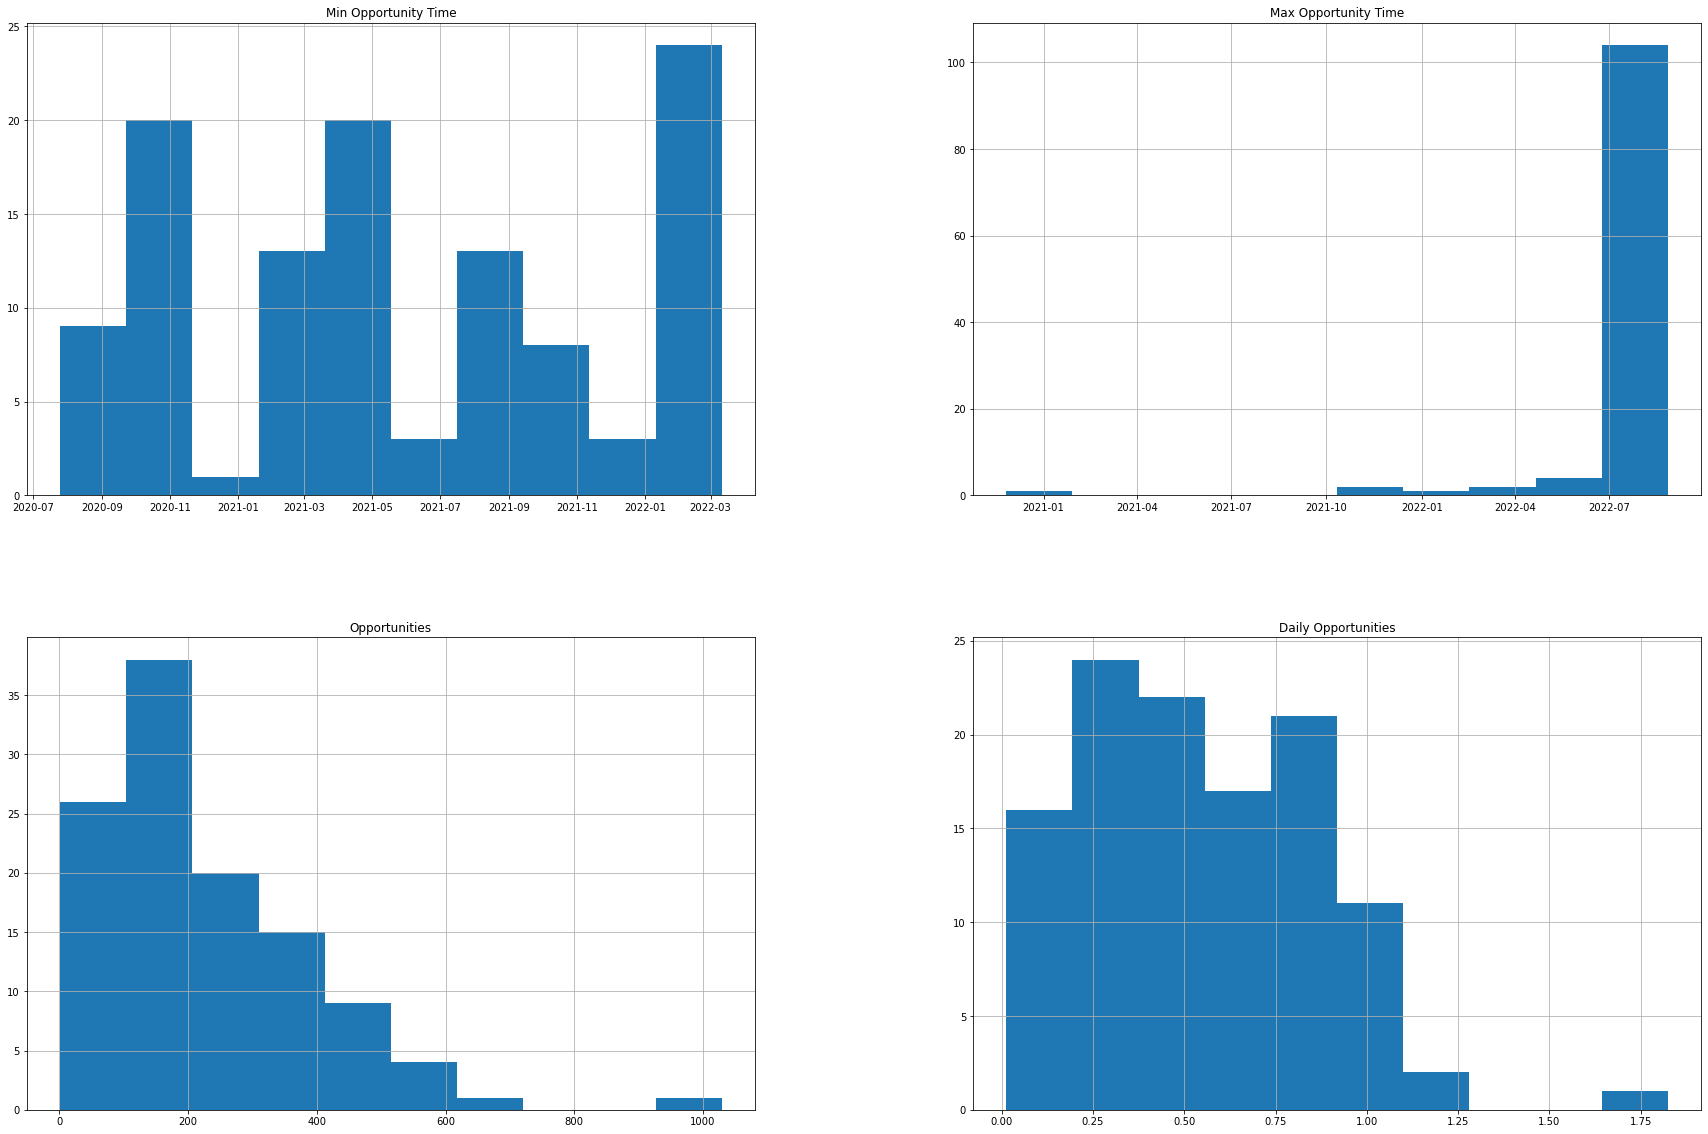

In [53]:
col_list = ['Min Opportunity Time', 'Max Opportunity Time', 'Opportunities', 'Daily Opportunities']
OP_AFTER_SD_SALE_COUNT_df[col_list].hist(bins=10, figsize = (30,20))

In [54]:
OP_AFTER_SD_SALE_COUNT_df = OP_AFTER_SD_SALE_COUNT_df[(OP_AFTER_SD_SALE_COUNT_df['Max Opportunity Time'] > '2022-08-01') &
                                                      (OP_AFTER_SD_SALE_COUNT_df['Opportunities'] > 30)]

In [55]:
OP_BEFORE_SD_SALE_COUNT_df = OP_UI_BEFORE_SD_df.groupby(['vccmarket__c', 'partnerid__c', 'name__c', 'FederationIdentifier']).agg(
    {'id': 'count', 'leadtoopportunitytime__c': 'min', 'START DATE': 'min'}).reset_index()
OP_BEFORE_SD_SALE_COUNT_df.rename(columns={'vccmarket__c': 'MARKET', 'partnerid__c': 'DEALER CODE',
                     'name__c': 'DEALER', 'id': 'Opportunities', 'leadtoopportunitytime__c': 'Min Opportunity Time'}, inplace=True)

OP_BEFORE_SD_MAX_DATE_df = OP_UI_BEFORE_SD_df.groupby(['vccmarket__c', 'partnerid__c', 'name__c', 'FederationIdentifier']).agg(
    {'leadtoopportunitytime__c': 'max'}).reset_index()
OP_BEFORE_SD_MAX_DATE_df.rename(columns={'vccmarket__c': 'MARKET', 'partnerid__c': 'DEALER CODE',
                     'name__c': 'DEALER', 'id': 'Opportunities', 'leadtoopportunitytime__c': 'Max Opportunity Time'}, inplace=True)

OP_BEFORE_SD_SALE_COUNT_df = pd.merge(OP_BEFORE_SD_SALE_COUNT_df, OP_BEFORE_SD_MAX_DATE_df)
OP_BEFORE_SD_SALE_COUNT_df['Before Course Daily Opportunities'] = OP_BEFORE_SD_SALE_COUNT_df['Opportunities'] / ((OP_BEFORE_SD_SALE_COUNT_df['Max Opportunity Time'] - OP_BEFORE_SD_SALE_COUNT_df['Min Opportunity Time']).dt.days + 1)
OP_BEFORE_SD_SALE_COUNT_df.sort_values(by='FederationIdentifier', inplace=True)
OP_BEFORE_SD_SALE_COUNT_df = OP_BEFORE_SD_SALE_COUNT_df[OP_BEFORE_SD_SALE_COUNT_df['Opportunities'] > 10]
OP_BEFORE_SD_SALE_COUNT_df

MARKET DEALER CODE                        DEALER FederationIdentifier  \
13     IN     6IN6043    Swede Auto Private Limited             A-BISHT1   
7      AU     6AU3222            Volvo Cars Geelong             A-BOYLE2   
38     IN     6IN6059    KNS Vinayak Auto Pvt. Ltd.             A-SHARM8   
10     IN     6IN6038           Kerala Volvo, Kochi                 A-VV   
40     IN     6IN6071                 Krishna Volvo             C-KUMAR1   
22     IN     6IN6045                Martial Motors                 D-AG   
28     IN     6IN6049          KIFS Motors, Andheri             D-CHADHA   
30     IN     6IN6054                   Speed Volvo             D-DWIVED   
23     IN     6IN6045                Martial Motors             D-SUNDER   
0      AU     6AU3107          Volvo Cars Doncaster               E-CHOW   
44     IN     6IN6072     Volvo Tamil nadu(Chennai)             G-RAGHUN   
49     IN     6IN6073  Volvo Tamil Nadu(Coimbatore)                H-SB1   
45     IN     6IN6072     Volvo Tamil nadu(Chennai)                H-SB1   
8      AU     6AU4213         Volvo Cars Gold Coast             J-FERGU3   
33     IN     6IN6056                    Flyga Auto             J-SHARMA   
20     IN    6IN60441               Autobots, Surat             K-AGHERA   
35     IN     6IN6057                 Scandia Volvo             K-KHARBA   
46     IN     6IN6072     Volvo Tamil nadu(Chennai)                 K-S1   
3      AU     6AU3112        Volvo Cars South Yarra             M-CHRAP1   
16     IN     6IN6044           Autobots, Ahmedabad             M-GAJJA1   
4      AU     6AU3112        Volvo Cars South Yarra             M-MOOR12   
47     IN     6IN6072     Volvo Tamil nadu(Chennai)                  M-S   
48     IN     6IN6072     Volvo Tamil nadu(Chennai)             N-KOTTE1   
37     IN     6IN6058        Krishna Auto, Ludhiana              N-VERMA   
17     IN     6IN6044           Autobots, Ahmedabad             P-CHAUDH   
34     IN     6IN6056                    Flyga Auto             P-SALOKH   
11     IN     6IN6038           Kerala Volvo, Kochi             R-ABRAHA   
21     IN    6IN60441               Autobots, Surat             R-CONTRA   
24     IN     6IN6045                Martial Motors                 R-DR   
36     IN     6IN6057                 Scandia Volvo             R-KUMAR6   
41     IN     6IN6071                 Krishna Volvo                  S-K   
42     IN     6IN6071                 Krishna Volvo             S-REDDYP   
43     IN     6IN6071                 Krishna Volvo             S-RIYAZA   
31     IN     6IN6054                   Speed Volvo             S-SHAMIM   
18     IN     6IN6044           Autobots, Ahmedabad             S-SHARMA   
32     IN     6IN6054                   Speed Volvo             T-BHATIA   
39     IN     6IN6059    KNS Vinayak Auto Pvt. Ltd.             T-SINGH2   
25     IN     6IN6045                Martial Motors                  U-L   
12     IN     6IN6038           Kerala Volvo, Kochi                  U-R   
14     IN     6IN6043    Swede Auto Private Limited             V-BARRY1   
19     IN     6IN6044           Autobots, Ahmedabad             V-DUDANI   
29     IN   6IN6049S2       KIFS Motors, Prabhadevi             V-KHATRI   
26     IN     6IN6045                Martial Motors                 V-MP   
6      AU     6AU3187           Volvo Cars Brighton              W-WONG5   
27     IN     6IN6045                Martial Motors                  Y-A   

    Opportunities Min Opportunity Time START DATE Max Opportunity Time  \
13             87  2020-11-16 00:00:00 2022-01-18  2022-01-13 06:52:29   
7              31  2021-04-16 04:57:00 2021-08-25  2021-08-18 00:00:00   
38             71  2020-10-15 00:00:00 2021-08-23  2021-08-09 12:26:28   
10             54  2020-08-19 00:00:00 2022-03-05  2022-03-02 07:04:00   
40            164  2020-10-15 00:00:00 2021-08-28  2021-08-20 11:56:18   
22            278  2020-10-19 00:00:00 2022-01-17  2022-01-17 

array([[<AxesSubplot:title={'center':'Min Opportunity Time'}>,
        <AxesSubplot:title={'center':'Max Opportunity Time'}>]],
      dtype=object)

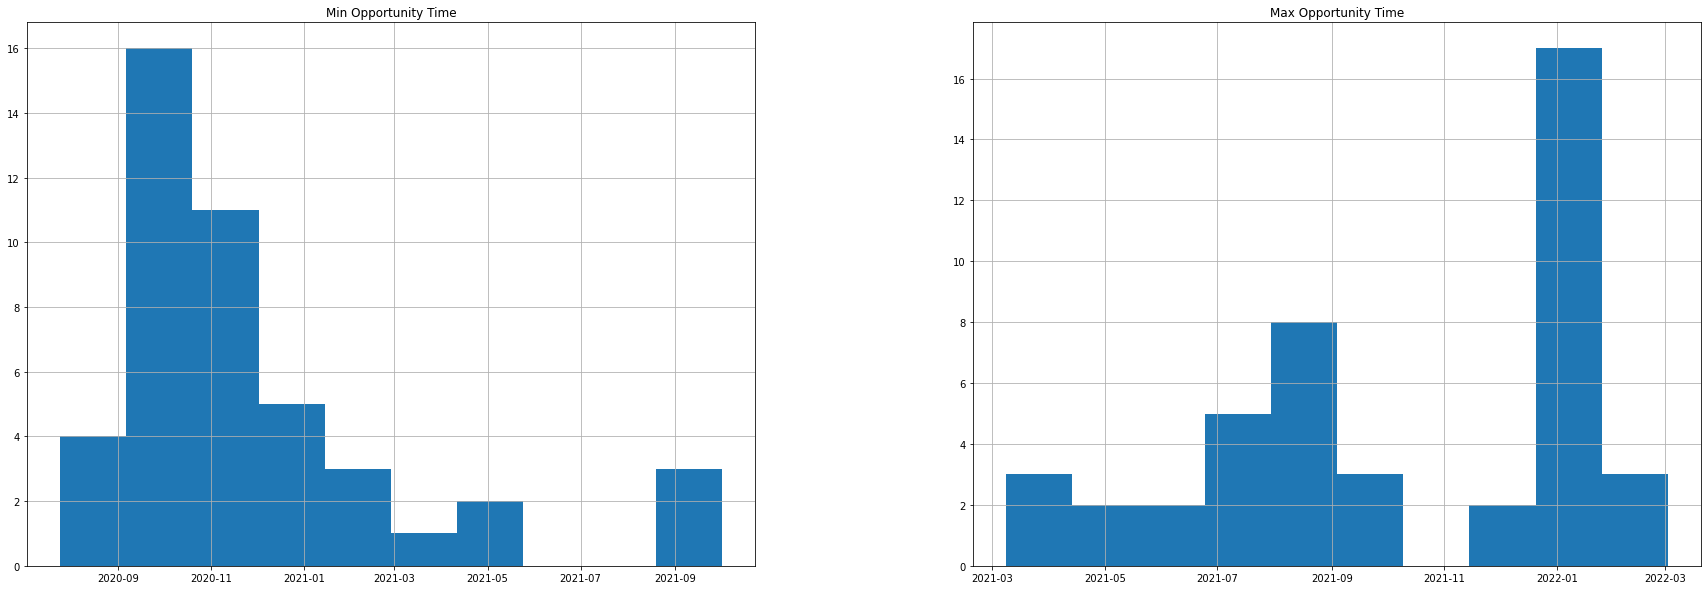

In [56]:
col_list = ['Min Opportunity Time', 'Max Opportunity Time']
OP_BEFORE_SD_SALE_COUNT_df[col_list].hist(bins=10, figsize = (30,10))

In [57]:
OP_BEFORE_SD_SALE_COUNT_df = OP_BEFORE_SD_SALE_COUNT_df[(OP_BEFORE_SD_SALE_COUNT_df['Opportunities'] > 30)]

In [58]:
OP_SD_SALE_COUNT_df = pd.merge(OP_AFTER_SD_SALE_COUNT_df, OP_BEFORE_SD_SALE_COUNT_df, on=['MARKET', 'DEALER CODE', 'DEALER', 'FederationIdentifier'])
OP_SD_SALE_COUNT_df['Daily Opportunities Varies'] = OP_SD_SALE_COUNT_df['Daily Opportunities'] - OP_SD_SALE_COUNT_df['Before Course Daily Opportunities']

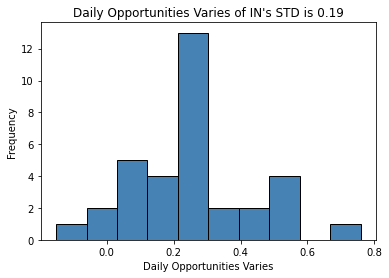

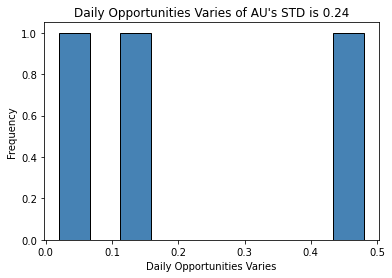

In [59]:
batch_plot_std(OP_SD_SALE_COUNT_df, 'Daily Opportunities Varies', by='Market' )

array([[<AxesSubplot:title={'center':'Daily Opportunities'}>,
        <AxesSubplot:title={'center':'Before Course Daily Opportunities'}>]],
      dtype=object)

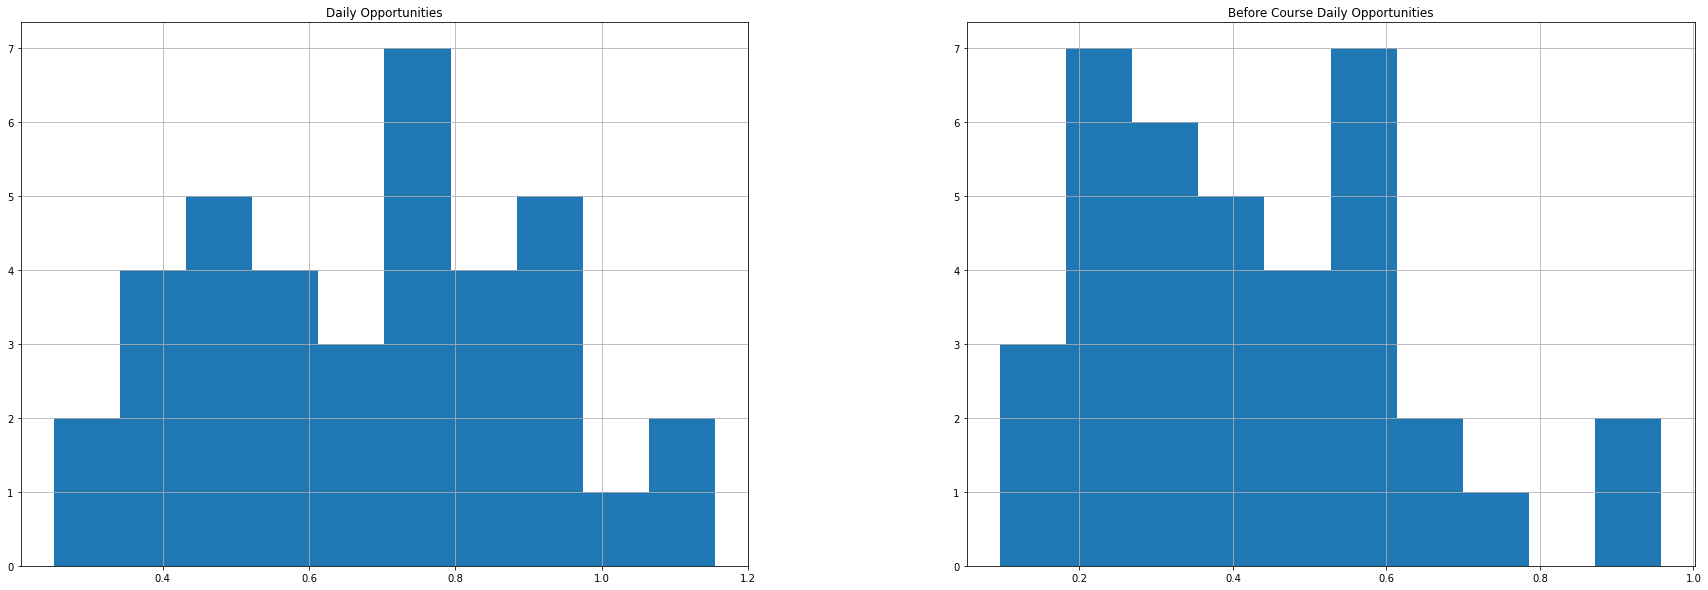

In [60]:
col_list = ['Daily Opportunities', 'Before Course Daily Opportunities']
OP_SD_SALE_COUNT_df[col_list].hist(bins=10, figsize = (30,10))

In [213]:
def plot_r(df: pd.DataFrame, file_name: str, col_1: str, col_2: str, title: str):
    """绘制相关性图片并保存

    Args:
        df (pd.DataFrame): 输入数据
        file_name (str): 保存文件名
        col_1 (str): 计算相关性列1
        col_2 (str): 计算相关性列2
        title (str): 标题
    """
    for market in df['MARKET'].unique():
        market_df = df[df['MARKET']==market].copy()
        fig = px.scatter(market_df, 
                        x=col_1,
                        y=col_2,
                        trendline='ols',
                        trendline_scope="overall",
                        trendline_color_override="blue",
                        color='DEALER',)
        results = px.get_trendline_results(fig)
        if results.empty:
            continue
        
        annotation = {
            'xref': 'paper',
            'yref': 'paper',
            'x': 0.9,
            'y': 0.9,
            'text': 'Regression Function:y=' + str(round(results.px_fit_results.iloc[0].params[1], 2)) + 'x+' + str(round(results.px_fit_results.iloc[0].params[0], 2)) + '\nR-squared: ' + str(round(results.px_fit_results.iloc[0].rsquared, 4)),
            'showarrow': False,
            'font': {'size': 10, 'color': 'blue'}
        }
        fig.add_annotation(annotation)

        annotation = {
            'xref': 'paper',
            'yref': 'paper',
            'x': 0.9,
            'y': 0.8,
            'text': 'Pearson Correlation Coefficient: ' + str(round(market_df[[col_1, col_2]].corr().iloc[0, 1], 4)),
            'showarrow': False,
            'font': {'size': 10, 'color': 'blue'}
        }
        fig.add_annotation(annotation)
        fig.update_layout(title=title + f'({market})',
                          title_font_size=20,
                          template='plotly_white')
        fig.write_image(rf'figure/correlation/{file_name}_{market}.svg')
        fig.write_image(rf'figure/correlation/{file_name}_{market}.png', width=1000, height=500, scale=3)
        fig.show()

### 计算After Course Daily Opportunities和Before Course Daily Opportunities的相关性
1. plot_r函数输出相关性图片并保存

In [62]:
plot_r(OP_SD_SALE_COUNT_df, file_name='After Course Daily Opportunities vs Before Course Daily Opportunities', col_1='Daily Opportunities', col_2='Before Course Daily Opportunities', title='After Course Daily Opportunities vs Before Course Daily Opportunities')

### 按Dealer维度统计Opportunities标准差
1. 按照MARKET, DEALER CODE, DEALER分组计算Opportunities的标准差
2. 按照DEALER排序输出结果SD_OP_D_df

In [63]:
SD_OP_D = OP_AFTER_SD_SALE_COUNT_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Opportunities'].std().round(2)
SD_OP_D.rename('SD_OP_D', inplace=True)
SD_OP_D_df = SD_OP_D.reset_index()
# SD_OP_D_df.rename(columns={'vccmarket__c':'MARKET', 'partnerid__c':'DEALER CODE', 'name__c':'DEALER'}, inplace=True)
SD_OP_D_df.sort_values('DEALER', inplace=True)
SD_OP_D_df

MARKET DEALER CODE                         DEALER  SD_OP_D
24     IN     6IN6044            Autobots, Ahmedabad    52.08
25     IN    6IN60441                Autobots, Surat      NaN
35     IN     6IN6060                  Central Volvo      NaN
31     IN     6IN6056                     Flyga Auto    10.61
28     IN     6IN6049           KIFS Motors, Andheri   106.77
29     IN   6IN6049S2        KIFS Motors, Prabhadevi    96.17
34     IN     6IN6059     KNS Vinayak Auto Pvt. Ltd.      NaN
21     IN    6IN60381          Kerala Volvo, Calicut      NaN
20     IN     6IN6038            Kerala Volvo, Kochi    88.49
27     IN     6IN6048       Krishna Auto, Chandigarh    25.58
33     IN     6IN6058         Krishna Auto, Ludhiana    41.01
37     IN     6IN6071                  Krishna Volvo    86.96
26     IN     6IN6045                 Martial Motors   122.55
40     IN     6IN6075                Rajasthan Volvo      NaN
36     IN     6IN6061                      SPL Volvo   112.87
32     IN     6IN6057                  Scandia Volvo   130.48
30     IN     6IN6054                    Speed Volvo    25.72
22     IN     6IN6043     Swede Auto Private Limited    43.39
23     IN    6IN60431                  Viking Motors    57.05
12     AU     6AU3187            Volvo Cars Brighton      NaN
15     AU     6AU4008      Volvo Cars Brisbane North   488.96
8      AU     6AU2605            Volvo Cars Canberra   281.43
5      AU     6AU2251       Volvo Cars Central Coast      NaN
10     AU     6AU3107           Volvo Cars Doncaster    17.69
14     AU     6AU3222             Volvo Cars Geelong      NaN
16     AU     6AU4213          Volvo Cars Gold Coast      NaN
18     AU     6AU7004              Volvo Cars Hobart      NaN
19     AU     6AU7254          Volvo Cars Launceston    49.50
1      AU     6AU2068           Volvo Cars Lindfield    31.11
4      AU     6AU2173           Volvo Cars Liverpool      NaN
13     AU     6AU3206           Volvo Cars Melbourne    65.48
2      AU     6AU2088              Volvo Cars Mosman      NaN
3      AU     6AU2156          Volvo Cars Parramatta   193.75
9      AU     6AU2754             Volvo Cars Penrith    71.04
17     AU     6AU6017               Volvo Cars Perth      NaN
0      AU     6AU2014     Volvo Cars Rushcutters Bay   284.26
11     AU     6AU3112         Volvo Cars South Yarra    48.68
7      AU     6AU2581  Volvo Cars Southern Highlands     7.78
6      AU     6AU2342            Volvo Cars Tamworth      NaN
39     IN     6IN6073   Volvo Tamil Nadu(Coimbatore)    72.83
38     IN     6IN6072      Volvo Tamil nadu(Chennai)   140.99

In [64]:
# 按经销商维度统计潜在客户数量标准差绘图
df = SD_OP_D_df
name = 'SD_OP_D'
title = 'STD of Opportunity by Dealer'
by = 'DEALER'
plot(df, name, title, by)

In [65]:
# batch_plot_std(OP_AFTER_SD_SALE_COUNT_df, 'Opportunities', 'Dealer')

### 按Market维度统计Opportunities标准差
1. 按照MARKET分组计算Opportunities的标准差
2. 按照MARKET排序输出结果SD_OP_M_df

In [66]:
SD_OP_M = OP_AFTER_SD_SALE_COUNT_df.groupby(['MARKET'])['Opportunities'].std().round(2)
SD_OP_M.rename('SD_OP_M', inplace=True)
SD_OP_M_df = SD_OP_M.reset_index()
# SD_OP_D_df.rename(columns={'vccmarket__c':'MARKET', 'partnerid__c':'DEALER CODE', 'name__c':'DEALER'}, inplace=True)
SD_OP_M_df.sort_values('MARKET', inplace=True)
SD_OP_M_df

MARKET  SD_OP_M
0     AU   209.37
1     IN   125.33

In [67]:
# 按市场维度统计潜在客户数量标准差绘图
df = SD_OP_M_df
name = 'SD_OP_M'
title = 'STD of Opportunity by Market'
by = 'MARKET'
plot(df, name, title, by)

In [68]:
# batch_plot_std(OP_AFTER_SD_SALE_COUNT_df, 'Opportunities', 'Market')

### 计算Opportunities和Course Rating的相关性
1. 按OP_AFTER_SD_SALE_COUNT_df.FederationIdentifier和course_rating_df.USER CODE内联得到CR_OP_df
2. 输出结果CR_OP_df
3. plot_r函数输出相关性图片并保存

In [69]:
CR_OP_df = OP_AFTER_SD_SALE_COUNT_df.merge(course_rating_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CR_OP_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CR_OP_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      IN     6IN6060               Central Volvo             A-ARORA2   
1      IN     6IN6054                 Speed Volvo             A-KAPOOR   
2      IN     6IN6048    Krishna Auto, Chandigarh             A-SHARM3   
3      IN     6IN6071               Krishna Volvo             C-KUMAR1   
4      IN     6IN6071               Krishna Volvo               E-PAUL   
5      IN     6IN6043  Swede Auto Private Limited             G-CHAWLA   
6      IN     6IN6072   Volvo Tamil nadu(Chennai)             G-RAGHUN   
7      IN     6IN6038         Kerala Volvo, Kochi             J-BRITTO   
8      IN     6IN6057               Scandia Volvo             M-KAUSHI   
9      IN     6IN6072   Volvo Tamil nadu(Chennai)                  M-S   
10     IN     6IN6058      Krishna Auto, Ludhiana              N-VERMA   
11     IN     6IN6043  Swede Auto Private Limited             P-CHOUDH   
12     IN     6IN6038         Kerala Volvo, Kochi             P-SREEDH   
13     IN     6IN6038         Kerala Volvo, Kochi             R-ABRAHA   
14     IN     6IN6071               Krishna Volvo                R-ALI   
15     IN     6IN6075             Rajasthan Volvo             S-BIDSER   
16     IN     6IN6061                   SPL Volvo               S-DAS4   
17     IN    6IN60431               Viking Motors             S-GUPTA6   
18     IN     6IN6071               Krishna Volvo             S-REDDYP   
19     IN     6IN6071               Krishna Volvo             S-RIYAZA   
20     IN     6IN6057               Scandia Volvo             S-SING11   
21     IN     6IN6071               Krishna Volvo             S-SINGH2   
22     IN     6IN6054                 Speed Volvo             T-BHATIA   
23     IN     6IN6038         Kerala Volvo, Kochi                  U-R   
24     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
25     IN     6IN6045              Martial Motors                 V-MP   

    Opportunities Min Opportunity Time START DATE Max Opportunity Time  \
0             212  2020-10-17 00:00:00 2019-08-06  2022-08-16 05:53:38   
1             109  2020-10-25 00:00:00 2019-06-20  2022-08-10 12:08:29   
2             178  2020-11-07 00:00:00 2019-07-16  2022-08-17 06:27:51   
3             266  2021-08-30 08:07:05 2021-08-28  2022-08-17 11:58:09   
4             354  2020-10-25 00:00:00 2019-06-20  2022-08-19 06:27:15   
5             179  2020-10-24 00:00:00 2019-05-22  2022-08-17 06:51:17   
6             352  2021-05-24 00:00:00 2021-05-21  2022-08-18 11:49:50   
7             330  2020-08-08 00:00:00 2019-08-01  2022-08-23 13:17:56   
8             487  2020-07-28 00:00:00 2019-08-02  2022-08-23 07:09:46   
9             149  2022-01-30 11:42:52 2022-01-26  2022-08-19 14:14:05   
10             51  2022-01-29 11:41:26 2022-01-19  2022-08-20 07:24:33   
11            127  2020-10-21 00:00:00 2019-08-12  2022-08-14 11:59:01   
12            272  2020-07-28 00:00:00 2019-10-19  2022-08-18 09:11:54   
13            174  2021-07-29 07:22:47 2021-07-22  2022-08-19 04:05:15   
14            394  2020-10-15 00:00:00 2019-06-20  2022-08-17 10:56:12   
15             60  2022-01-24 08:32:16 2022-01-19  2022-08-19 07:21:32   
16            412  2020-10-17 00:00:00 2019-08-02  2022-08-17 11:21:46   
17            261  2020-10-19 00:00:00 2020-02-11  2022-08-26 11:22:49   
18            401  2021-07-08 09:36:23 2021-07-06  2022-08-19 08:16:36   
19            221  2021-08-30 13:37:38 2021-08-28  2022-08-17 14:02:30   
20            449  2020-07-25 00:00:00 2019-05-17  2022-08-18 08:43:00   
21            448  2020-10-15 00:00:00 2019-06-20  2022-08-25 06:52:27   
22            108  2022-01-21 09:23:23 2022-01-19  2022-08-18 05:05:23   
23            195  2021-09-17 12:17:51 2021-09-08  2022-08-20 11:52:03   
24            327  2021-03-13 11:30:40 2021-03-11  2022-08-26 06:59:14   
25            181  2022-01-31 06:37:31 2022-01-19  2022-08-19 10:50:20   

    D

In [70]:
CR_OP_df.to_csv(r'Correlation\CR_OP_df.csv')

In [71]:
plot_r(CR_OP_df, 'Course Rating vs Opportunities', 'Course Rating', 'Opportunities', 'Course Rating vs Opportunities')

### 计算Opportunities和Course Completion的相关性
1. 按OP_AFTER_SD_SALE_COUNT_df.FederationIdentifier和complement_df.CDSID内联得到CC_OP_df
2. 输出结果CC_OP_df
3. plot_r函数输出相关性图片并保存

In [72]:
CC_OP_df = pd.merge(OP_AFTER_SD_SALE_COUNT_df, complement_df, left_on=['FederationIdentifier'], right_on=['CDSID'], how='inner')
# CC_OP_df = CC_OP_df[CC_OP_df['START DATE_x'] > '2021-01-01']
CC_OP_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CC_OP_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0       IN     6IN6060               Central Volvo             A-ARORA2   
1       IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2       AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3       AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
4       IN     6IN6054                 Speed Volvo             A-KAPOOR   
..     ...         ...                         ...                  ...   
96      IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
97      IN     6IN6045              Martial Motors                 V-MP   
98      AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
99      AU     6AU3187         Volvo Cars Brighton              W-WONG5   
100     IN     6IN6045              Martial Motors                  Y-A   

     Opportunities Min Opportunity Time START DATE_x Max Opportunity Time  \
0              212  2020-10-17 00:00:00   2019-08-06  2022-08-16 05:53:38   
1              101  2022-01-25 09:18:41   2022-01-18  2022-08-18 06:24:04   
2              137  2021-08-26 23:15:24   2021-08-25  2022-08-15 05:22:10   
3              382  2021-03-28 00:00:00   2020-03-12  2022-08-18 23:04:33   
4              109  2020-10-25 00:00:00   2019-06-20  2022-08-10 12:08:29   
..             ...                  ...          ...                  ...   
96             327  2021-03-13 11:30:40   2021-03-11  2022-08-26 06:59:14   
97             181  2022-01-31 06:37:31   2022-01-19  2022-08-19 10:50:20   
98             636  2021-02-01 06:34:03   2020-03-11  2022-08-18 04:42:49   
99             211  2021-12-22 23:29:34   2021-12-21  2022-08-18 03:39:37   
100            223  2022-01-24 07:06:46   2022-01-22  2022-08-19 14:21:26   

     Daily Opportunities   MARKET_y  ... Frequency Recency Rank  \
0               0.316891      INDIA  ...  0.020909     0.038647   
1               0.492683      INDIA  ...  0.117347     0.227053   
2               0.387006  AUSTRALIA  ...  0.095436     0.792271   
3               0.750491  AUSTRALIA  ...  0.008685     0.560386   
4               0.166412      INDIA  ...  0.020158     0.159420   
..                   ...        ...  ...       ...          ...   
96              0.615819      INDIA  ...  0.044487     0.038647   
97              0.900498      INDIA  ...  1.466667     0.908213   
98              1.129663  AUSTRALIA  ...  0.009206     0.333333   
99              0.882845  AUSTRALIA  ...  0.056452     0.777778   
100             1.072115      INDIA  ...  2.200000     0.932367   

    Frequency Rank  Completion Rank  Start Rank      Rank Recency Binary  \
0         0.681159         0.202703    0.178744  0.270531              1   
1         0.275362         0.202703    0.729469  0.173913              1   
2         0.347826         0.202703    0.589372  0.449275              0   
3         0.917874         0.711712    0.299517  0.864734              0   
4         0.714976         0.202703    0.062802  0.309179              1   
..             ...              ...         ...       ...            ...   
96        0.487923         0.202703    0.415459  0.198068              1   
97        0.086957         0.355856    0.748792  0.463768              0   
98        0.898551         0.644144    0.289855  0.719807              1   
99        0.458937         0.711712    0.676329  0.758454              0   
100       0.004831         0.355856    0.792271  0.420290              0   

     Frequency Binary  Completion Binary  \
0                   0                  0   
1                   1                  1   
2                   1                  1   
3                   0                  0   
4                   0                  0   
..                ...                ...   
96                  1                  1   
97                  1                  1   
98                  0                  0   
99                  

Text(0.5, 1.0, 'Correlation of Features')

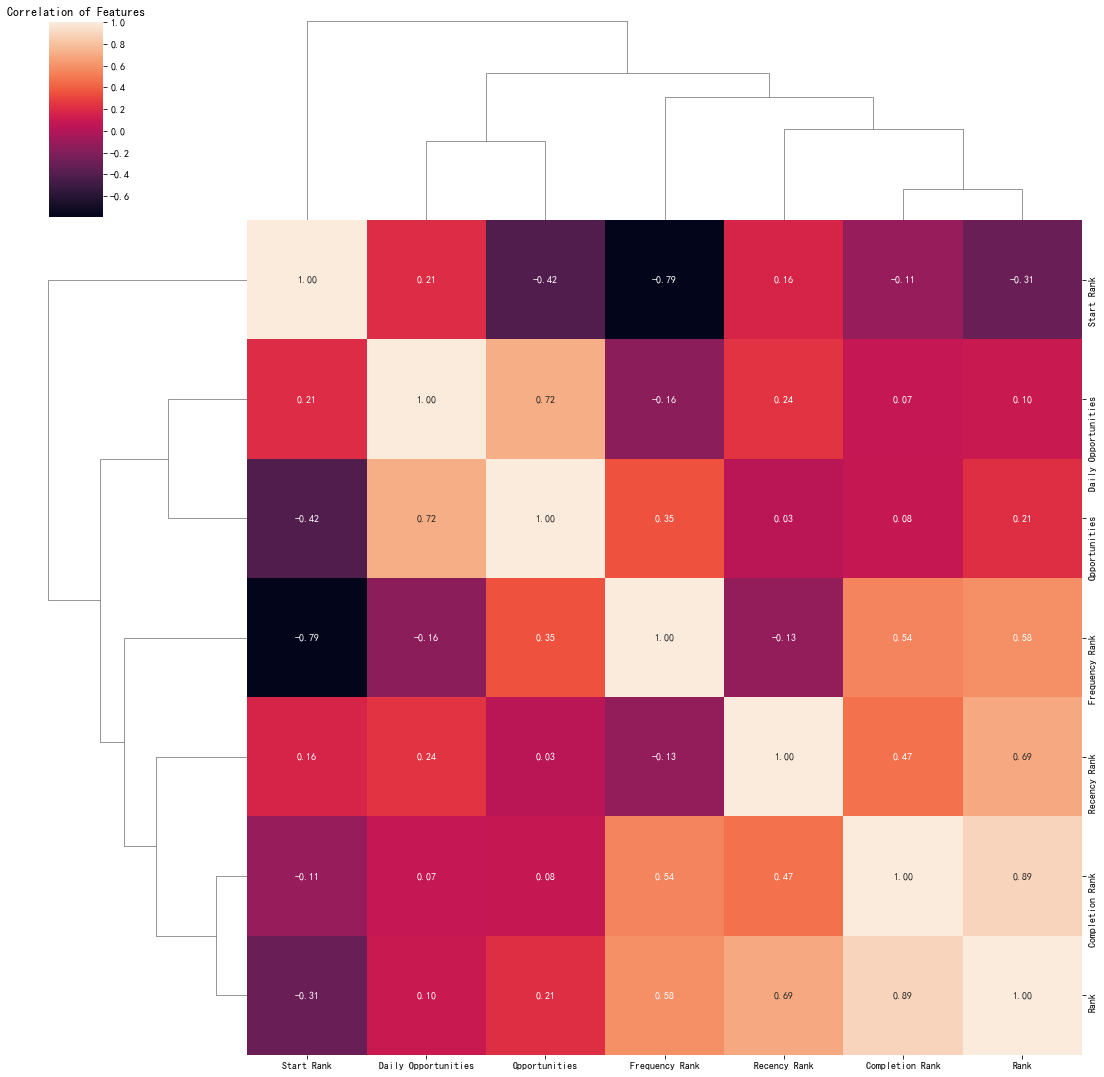

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']    # 正常显示中文标签
plt.rcParams['axes.unicode_minus']=False    # 正常显示负号

col_list = ['Recency Rank',	'Frequency Rank', 'Completion Rank', 'Start Rank', 'Rank', 'Daily Opportunities', 'Opportunities']
corr_matrix = CC_OP_df[col_list].corr()
sns.clustermap(corr_matrix, annot=True, fmt=".2f", figsize = (15,15));
plt.title("Correlation of Features")

21


Text(0.5, 1.0, 'Correlation of Features')

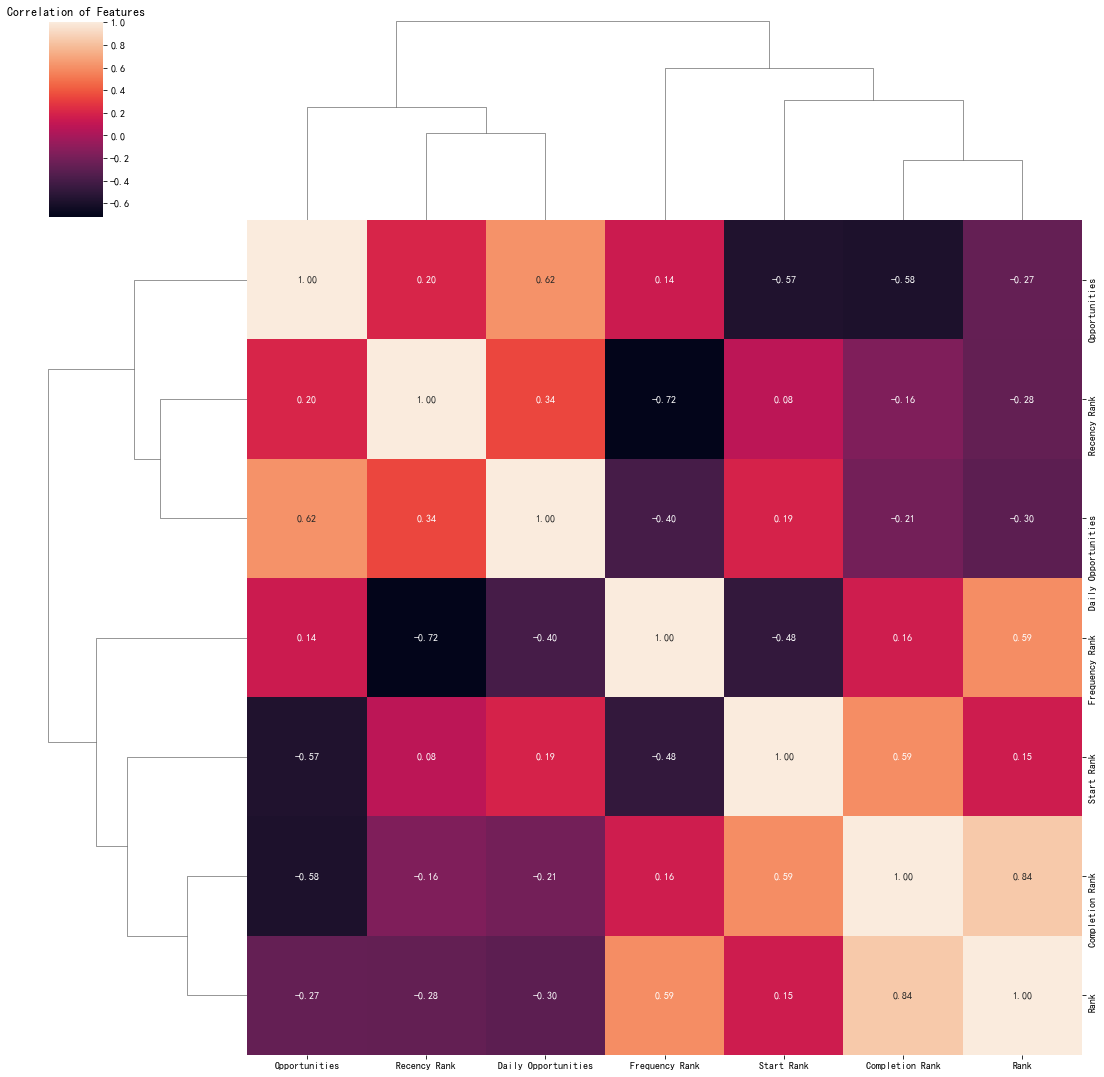

In [74]:
col_list = ['Recency Rank',	'Frequency Rank', 'Completion Rank', 'Start Rank', 'Rank', 'Daily Opportunities', 'Opportunities']
median_half_df = CC_OP_df[(CC_OP_df['Recency Binary'] == 0) & (CC_OP_df['Completion Binary'] == 1)]
print(len(median_half_df))
corr_matrix = median_half_df[col_list].corr()
sns.clustermap(corr_matrix, annot=True, fmt=".2f", figsize = (15,15));
plt.title("Correlation of Features")

In [75]:
CC_OP_df.to_csv(r'Correlation\CC_OP_df.csv')

In [76]:
plot_r(CC_OP_df, 'Frequency Rank vs Daily Opportunities', 'Frequency Rank', 'Daily Opportunities', 'Frequency Rank vs Daily Opportunities')

In [77]:
plot_r(CC_OP_df, 'Course Completion vs Opportunities', 'Course Completion', 'Opportunities', 'Course Completion vs Opportunities')

In [78]:
plot_r(CC_OP_df, 'Course Completion vs Daily Opportunities', 'Course Completion', 'Daily Opportunities', 'Course Completion vs Daily Opportunities')

### 计算Opportunities和Course Post-Test Score的相关性
1. 按OP_AFTER_SD_SALE_COUNT_df.FederationIdentifier和assessment_df.USER CODE内联得到CPT_OP_df
2. 输出结果CPT_OP_df
3. plot_r函数输出相关性图片并保存

In [79]:
CPT_OP_df = pd.merge(OP_AFTER_SD_SALE_COUNT_df, assessment_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CPT_OP_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CPT_OP_df.head()

MARKET DEALER CODE                     DEALER FederationIdentifier  \
0     AU     6AU2088          Volvo Cars Mosman             B-AMBRO3   
1     AU     6AU4008  Volvo Cars Brisbane North             B-GUNNI1   
2     AU     6AU3206       Volvo Cars Melbourne             D-DIMAR1   
3     AU     6AU3206       Volvo Cars Melbourne             D-TAYL12   
4     AU     6AU3107       Volvo Cars Doncaster              D-ZERBI   

   Opportunities Min Opportunity Time START DATE Max Opportunity Time  \
0            156  2021-04-21 06:46:56 2021-03-15  2022-08-09 01:58:04   
1           1029  2021-02-01 02:59:03 2019-08-09  2022-08-18 23:39:14   
2            485  2021-04-26 06:05:55 2019-07-19  2022-08-19 02:38:59   
3            356  2021-04-26 06:02:39 2019-07-04  2022-08-19 06:37:07   
4            211  2021-02-01 04:30:39 2020-02-10  2022-08-19 02:51:41   

   Daily Opportunities   MARKET_y  ...   LAST NAME FIRST NAME USER CODE  \
0             0.328421  AUSTRALIA  ...     Ambrose        Ben  B-AMBRO3   
1             1.824468  AUSTRALIA  ...      Gunnis       Bill  B-GUNNI1   
2             1.010417  AUSTRALIA  ...  Di Martino    Domenic  D-DIMAR1   
3             0.740125  AUSTRALIA  ...      Taylor     Daniel  D-TAYL12   
4             0.374113  AUSTRALIA  ...       Zerbi    Domenic   D-ZERBI   

     TYPE                                           QUIZ     TYPE.1  \
0  Course  VCC5044: Model year changes MY23 - assessment  POST_TEST   
1  Course  VCC5044: Model year changes MY23 - assessment  POST_TEST   
2  Course  VCC5044: Model year changes MY23 - assessment  POST_TEST   
3  Course  VCC5044: Model year changes MY23 - assessment  POST_TEST   
4  Course  VCC5044: Model year changes MY23 - assessment  POST_TEST   

  Course Post-Test Score                    STATUS                 DATE  \
0                  82.35                    PASSED  16/07/2022 04:34:06   
1                  70.59  KNOWLEDGE GAP IDENTIFIED  29/07/2022 06:47:50   
2                  82.35                    PASSED  25/07/2022 06:51:28   
3                  82.35                    PASSED  25/07/2022 06:53:50   
4                  82.35                    PASSED  26/04/2022 02:51:56   

  ELAPSED TIME  
0        138.0  
1        108.0  
2         35.0  
3         50.0  
4        267.0  

[5 rows x 24 columns]

In [80]:
CPT_OP_df.to_csv(r'Correlation\CPT_OP_df.csv')

In [81]:
plot_r(CPT_OP_df, 'Course Post-Test Score vs Opportunities', 'Course Post-Test Score', 'Opportunities', 'Course Post-Test Score vs Opportunities')

In [82]:
plot_r(CPT_OP_df, 'Course Post-Test Score vs Daily Opportunities', 'Course Post-Test Score', 'Daily Opportunities', 'Course Post-Test Score vs Daily Opportunities')

In [83]:
# def remove_zeros(df, col_1, col_2):
#     df_copy = df.copy()
#     no_zero_df = df_copy[(df_copy[col_1] > 0) & (df_copy[col_2] > 0)]
#     return no_zero_df

### 计算Opportunities和Sales Learning Programme Completion的相关性
1. 按OP_AFTER_SD_SALE_COUNT_df.FederationIdentifier和complement_df.CDSID内联得到SLPC_OP_df
2. 输出结果SLPC_OP_df
3. plot_r函数输出相关性图片并保存

In [84]:
SLPC_OP_df = pd.merge(OP_AFTER_SD_SALE_COUNT_df, complement_df, left_on=['FederationIdentifier'], right_on=['CDSID'], how='inner')
SLPC_OP_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
SLPC_OP_df.head()

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0     IN     6IN6060               Central Volvo             A-ARORA2   
1     IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2     AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3     AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
4     IN     6IN6054                 Speed Volvo             A-KAPOOR   

   Opportunities Min Opportunity Time START DATE_x Max Opportunity Time  \
0            212  2020-10-17 00:00:00   2019-08-06  2022-08-16 05:53:38   
1            101  2022-01-25 09:18:41   2022-01-18  2022-08-18 06:24:04   
2            137  2021-08-26 23:15:24   2021-08-25  2022-08-15 05:22:10   
3            382  2021-03-28 00:00:00   2020-03-12  2022-08-18 23:04:33   
4            109  2020-10-25 00:00:00   2019-06-20  2022-08-10 12:08:29   

   Daily Opportunities   MARKET_y  ... Frequency Recency Rank Frequency Rank  \
0             0.316891      INDIA  ...  0.020909     0.038647       0.681159   
1             0.492683      INDIA  ...  0.117347     0.227053       0.275362   
2             0.387006  AUSTRALIA  ...  0.095436     0.792271       0.347826   
3             0.750491  AUSTRALIA  ...  0.008685     0.560386       0.917874   
4             0.166412      INDIA  ...  0.020158     0.159420       0.714976   

   Completion Rank  Start Rank      Rank Recency Binary  Frequency Binary  \
0         0.202703    0.178744  0.270531              1                 0   
1         0.202703    0.729469  0.173913              1                 1   
2         0.202703    0.589372  0.449275              0                 1   
3         0.711712    0.299517  0.864734              0                 0   
4         0.202703    0.062802  0.309179              1                 0   

   Completion Binary  Sales Learning Programme Completion(%)  
0                  0                                   76.67  
1                  1                                   76.67  
2                  1                                   76.67  
3                  0                                   23.33  
4                  0                                   76.67  

[5 rows x 28 columns]

In [85]:
plot_r(SLPC_OP_df, 'Sales Learning Programme Completion(%) vs Opportunities', 'Sales Learning Programme Completion(%)', 'Opportunities', 'Sales Learning Programme Completion(%) vs Opportunities')

## 处理Test Drives

### 联表test_drive_df和user_info_df
1. 按test_drive_df.id和opportunity_ownerid_df.id内联得到中间表test_drive_temp_df
2. 将test_drive_temp_df中owerid列为空的行的id记录为test_drive_lost_df，即opportunity_ownerid_df相对test_drive_df缺少的id(仅作数据缺失记录)
3. 将test_drive_df.id去除test_drive_lost_df的id记为clean_test_drive_df(仅作数据缺失记录)
4. 将test_drive_temp_df中owerid列为空的行舍去
5. 按test_drive_temp_df.ownerid和user_info_df.Id内联得到带有sale信息的test_drive表————test_drive_user_info_df

In [86]:
# 按经销商维度统计试驾数量标准差
print(len(test_drive_df))
test_drive_temp_df = pd.merge(test_drive_df, opportunityid_ownerid_df, left_on='id', right_on='id', how='left')
test_drive_lost_df = test_drive_temp_df[pd.isnull(test_drive_temp_df['ownerid'])]['id'].to_frame()
clean_test_drive_df = test_drive_df[~test_drive_df['id'].isin(test_drive_lost_df['id'])]
test_drive_temp_df.dropna(subset=['ownerid'], inplace=True)
print(len(clean_test_drive_df))
print(len(test_drive_temp_df))
# user_info_test_drive_lost_df = pd.merge(user_info_df, test_drive_temp_df, left_on='Id', right_on='ownerid', how='left')
# user_info_test_drive_lost_df = user_info_test_drive_lost_df[pd.isnull(user_info_test_drive_lost_df['Id'])]['ownerid']
# user_info_test_drive_lost_df.to_csv('user_info_test_drive_lost_id.csv')
print(len(pd.merge(user_info_df, test_drive_temp_df, left_on='Id', right_on='ownerid', how='inner')))
test_drive_user_info_df = pd.merge(user_info_df, test_drive_temp_df, left_on='Id', right_on='ownerid', how='inner')
test_drive_user_info_df

25649
25344
25344
19549


Id           ContactId             Title  IsActive  \
0      0052w000004ieBAAAY  0032w00000DHcS7AAL     Business Head      True   
1      0052w000004ieBAAAY  0032w00000DHcS7AAL     Business Head      True   
2      0052w000004ieBAAAY  0032w00000DHcS7AAL     Business Head      True   
3      0052w000004ieBAAAY  0032w00000DHcS7AAL     Business Head      True   
4      0052w000004ieGfAAI  0032w00000DHcSkAAL     Sales Manager     False   
...                   ...                 ...               ...       ...   
19544  0052w000008BYujAAG  0032w00000gtGSCAA2  Sales Consultant      True   
19545  0052w000008BYujAAG  0032w00000gtGSCAA2  Sales Consultant      True   
19546  0052w000008BYujAAG  0032w00000gtGSCAA2  Sales Consultant      True   
19547  0052w000008BYujAAG  0032w00000gtGSCAA2  Sales Consultant      True   
19548  0052w000008BYujAAG  0032w00000gtGSCAA2  Sales Consultant      True   

      FederationIdentifier                                   Username  \
0                 A-GANDHI      anil.gandhi@scandiavolvocars.com.apac   
1                 A-GANDHI      anil.gandhi@scandiavolvocars.com.apac   
2                 A-GANDHI      anil.gandhi@scandiavolvocars.com.apac   
3                 A-GANDHI      anil.gandhi@scandiavolvocars.com.apac   
4                      NaN  jeetender.kumar@scandiavolvocars.com.apac   
...                    ...                                        ...   
19544              W-WONG5  steven.wong@volvocarsbrighton.com.au.apac   
19545              W-WONG5  steven.wong@volvocarsbrighton.com.au.apac   
19546              W-WONG5  steven.wong@volvocarsbrighton.com.au.apac   
19547              W-WONG5  steven.wong@volvocarsbrighton.com.au.apac   
19548              W-WONG5  steven.wong@volvocarsbrighton.com.au.apac   

                                      Email VCCMarket__c attributes.type  \
0          anil.gandhi@scandiavolvocars.com           IN            User   
1          anil.gandhi@scandiavolvocars.com           IN            User   
2          anil.gandhi@scandiavolvocars.com           IN            User   
3          anil.gandhi@scandiavolvocars.com           IN            User   
4      jeetender.kumar@scandiavolvocars.com           IN            User   
...                                     ...          ...             ...   
19544  steven.wong@volvocarsbrighton.com.au           AU            User   
19545  steven.wong@volvocarsbrighton.com.au           AU            User   
19546  steven.wong@volvocarsbrighton.com.au           AU            User   
19547  steven.wong@volvocarsbrighton.com.au           AU            User   
19548  steven.wong@volvocarsbrighton.com.au           AU            User   

                                          attributes.url  ...  \
0      /services/data/v52.0/sobjects/User/0052w000004...  ...   
1      /services/data/v52.0/sobjects/User/0052w000004...  ...   
2      /services/data/v52.0/sobjects/User/0052w000004...  ...   
3      /services/data/v52.0/sobjects/User/0052w000004...  ...   
4      /services/data/v52.0/sobjects/User/0052w000004...  ...   
...                                                  ...  ...   
19544  /services/data/v52.0/sobjects/User/0052w000008...  ...   
19545  /services/data/v52.0/sobjects/User/0052w000008...  ...   
19546  /services/data/v52.0/sobjects/User/0052w000008...  ...   
19547  /services/data/v52.0/sobjects/User/0052w000008...  ...   
19548  /services/data/v52.0/sobjects/User/0052w000008...  ...   

                        createddate      leadtoopportunitytime__c  \
0      2022-04-19T05:01:19.000+0000  2022-04-19T05:06:07.000+0000   
1      2022-07-18T12:12:49.000+0000  2022-07-18T12:14:55.000+0000   
2      2022-02-18T08:45:55.000+0000  2022-02-18T09:04:13.000+0000   
3      2022-01-24T11:51:08.000+0000  2022-01-24T11:56:00.000+0000   
4      2021-03-05T11:28:45.000+0000  2021-03-08T05:48:31.000+0000   
...                             ...                           ...   
19544  2022-01-27T00:42:01.000+0000  2022-01

In [87]:
test_drive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25649 entries, 0 to 25648
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25649 non-null  object 
 1   createddate                        25649 non-null  object 
 2   leadtoopportunitytime__c           25649 non-null  object 
 3   opportunitytotestdrivetime__c      25649 non-null  object 
 4   opportunitytotestdriveduration__c  25649 non-null  float64
 5   partnerid__c                       25331 non-null  object 
 6   name__c                            25649 non-null  object 
 7   dedealergroupcode                  0 non-null      float64
 8   dealergroupname                    8750 non-null   object 
 9   vccmarket__c                       25649 non-null  object 
dtypes: float64(2), object(8)
memory usage: 2.0+ MB


### 清洗test_drive_user_info_df
1. 取test_drive_user_info_df.IsActive状态为True且opportunity_user_info_df.FederationIdentifier为非空的行记为clean_test_drive_user_info_df
2. 按clean_test_drive_user_info_df.FederationIdentifier和completion_df.CDSID内联得到带有START DATE信息的表记为TD_UI_SD_df
3. 取TD_UI_SD_df中leadtoopportunitytime__c晚于开始培训日期一天后的记录作为test drive的有效记录

In [88]:
clean_test_drive_user_info_df = test_drive_user_info_df[(test_drive_user_info_df['IsActive'] == True) & (~pd.isna(test_drive_user_info_df['FederationIdentifier']))]
TD_UI_COMPLEMENT_df = clean_test_drive_user_info_df.merge(
    complement_df, left_on='FederationIdentifier', right_on='CDSID', how="inner")
TD_UI_COMPLEMENT_df['leadtoopportunitytime__c'] = pd.to_datetime(TD_UI_COMPLEMENT_df['leadtoopportunitytime__c'])
TD_UI_COMPLEMENT_df['leadtoopportunitytime__c'] = TD_UI_COMPLEMENT_df['leadtoopportunitytime__c'].dt.tz_localize(None)
TD_UI_COMPLEMENT_df['opportunitytotestdrivetime__c'] = pd.to_datetime(TD_UI_COMPLEMENT_df['opportunitytotestdrivetime__c'])
TD_UI_COMPLEMENT_df['opportunitytotestdrivetime__c'] = TD_UI_COMPLEMENT_df['opportunitytotestdrivetime__c'].dt.tz_localize(None)
TD_UI_SD_df = TD_UI_COMPLEMENT_df[(TD_UI_COMPLEMENT_df['leadtoopportunitytime__c'] - TD_UI_COMPLEMENT_df['START DATE']).dt.days > 0]
TD_UI_SD_df


Id           ContactId                 Title  IsActive  \
0      0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
1      0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
2      0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
3      0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
4      0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
...                   ...                 ...                   ...       ...   
16106  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   
16107  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   
16108  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   
16109  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   
16111  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   

      FederationIdentifier                                     Username  \
0                 K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
1                 K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
2                 K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
3                 K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
4                 K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
...                    ...                                          ...   
16106              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   
16107              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   
16108              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   
16109              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   
16111              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   

                                        Email VCCMarket__c attributes.type  \
0      kailash.kharbanda@scandiavolvocars.com           IN            User   
1      kailash.kharbanda@scandiavolvocars.com           IN            User   
2      kailash.kharbanda@scandiavolvocars.com           IN            User   
3      kailash.kharbanda@scandiavolvocars.com           IN            User   
4      kailash.kharbanda@scandiavolvocars.com           IN            User   
...                                       ...          ...             ...   
16106    steven.wong@volvocarsbrighton.com.au           AU            User   
16107    steven.wong@volvocarsbrighton.com.au           AU            User   
16108    steven.wong@volvocarsbrighton.com.au           AU            User   
16109    steven.wong@volvocarsbrighton.com.au           AU            User   
16111    steven.wong@volvocarsbrighton.com.au           AU            User   

                                          attributes.url  ... Frequency  \
0      /services/data/v52.0/sobjects/User/0052w000004...  ...  0.315789   
1      /services/data/v52.0/sobjects/User/0052w000004...  ...  0.315789   
2      /services/data/v52.0/sobjects/User/0052w000004...  ...  0.315789   
3      /services/data/v52.0/sobjects/User/0052w000004...  ...  0.315789   
4      /services/data/v52.0/sobjects/User/0052w000004...  ...  0.315789   
...                                                  ...  ...       ...   
16106  /services/data/v52.0/sobjects/User/0052w000008...  ...  0.056452   
16107  /services/data/v52.0/sobjects/User/0052w000008...  ...  0.056452   
16108  /services/data/v52.0/sobjects/User/0052w000008...  ...  0.056452   
16109  /services/data/v52.0/sobjects/User/0052w000008...  ...  0.056452   
16111  /services/data/v52.0/sobjects/User/0052w000008...  ...  0.056452   

      Recency Rank Frequency Rank Completion Rank  Start Rank      Rank  \
0         0.879227       0.183575        0.509009    0.811594  0.599034   
1         0.879227       0.183575        0.509009    0.811594  0.599034   
2         0.879227       0.183575        0.509009    0.811594  0.599034   
3         0

In [89]:
TD_UI_BEFORE_SD_df = TD_UI_COMPLEMENT_df[(TD_UI_COMPLEMENT_df['leadtoopportunitytime__c'] - TD_UI_COMPLEMENT_df['START DATE']).dt.days <= 0]
TD_UI_BEFORE_SD_df

Id           ContactId                 Title  IsActive  \
123    0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
124    0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
125    0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
126    0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
127    0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
...                   ...                 ...                   ...       ...   
15996  0052w000008BYgIAAW  0032w00000gt5EOAAY      Sales Consultant      True   
15997  0052w000008BYgIAAW  0032w00000gt5EOAAY      Sales Consultant      True   
16088  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   
16110  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   
16112  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   

      FederationIdentifier                                     Username  \
123               K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
124               K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
125               K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
126               K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
127               K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
...                    ...                                          ...   
15996              S-LI107              sli@volvocarshobart.com.au.apac   
15997              S-LI107              sli@volvocarshobart.com.au.apac   
16088              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   
16110              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   
16112              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   

                                        Email VCCMarket__c attributes.type  \
123    kailash.kharbanda@scandiavolvocars.com           IN            User   
124    kailash.kharbanda@scandiavolvocars.com           IN            User   
125    kailash.kharbanda@scandiavolvocars.com           IN            User   
126    kailash.kharbanda@scandiavolvocars.com           IN            User   
127    kailash.kharbanda@scandiavolvocars.com           IN            User   
...                                       ...          ...             ...   
15996              sli@volvocarshobart.com.au           AU            User   
15997              sli@volvocarshobart.com.au           AU            User   
16088    steven.wong@volvocarsbrighton.com.au           AU            User   
16110    steven.wong@volvocarsbrighton.com.au           AU            User   
16112    steven.wong@volvocarsbrighton.com.au           AU            User   

                                          attributes.url  ... Frequency  \
123    /services/data/v52.0/sobjects/User/0052w000004...  ...  0.315789   
124    /services/data/v52.0/sobjects/User/0052w000004...  ...  0.315789   
125    /services/data/v52.0/sobjects/User/0052w000004...  ...  0.315789   
126    /services/data/v52.0/sobjects/User/0052w000004...  ...  0.315789   
127    /services/data/v52.0/sobjects/User/0052w000004...  ...  0.315789   
...                                                  ...  ...       ...   
15996  /services/data/v52.0/sobjects/User/0052w000008...  ...  0.054545   
15997  /services/data/v52.0/sobjects/User/0052w000008...  ...  0.054545   
16088  /services/data/v52.0/sobjects/User/0052w000008...  ...  0.056452   
16110  /services/data/v52.0/sobjects/User/0052w000008...  ...  0.056452   
16112  /services/data/v52.0/sobjects/User/0052w000008...  ...  0.056452   

      Recency Rank Frequency Rank Completion Rank  Start Rank      Rank  \
123       0.879227       0.183575        0.509009    0.811594  0.599034   
124       0.879227       0.183575        0.509009    0.811594  0.599034   
125       0.879227       0.183575        0.509009    0.811594  0.599034   
126       0

### 按Sale维度统计Test Drives数量以及Daily Test Drives
1. 按照vccmarket__c, partnerid__c, name__c, FederationIdentifier分组统计每个Sale的Test Drives数量(记为Test Drives)、有效潜在客户最小时间(记为Min Opportunity Time)、培训开始日期(记为START DATE)、最大试驾日期(记为Max Test Drive Time)
2. 按照FederationIdentifier排序输出结果TD_AFTER_SD_SALE_COUNT_df(晚于培训开始日期的结果), TD_BEFORE_SD_SALE_COUNT_df(早于培训开始日期的结果)
3. 分别对TD_AFTER_SD_SALE_COUNT_df(晚于培训开始日期的结果), TD_BEFORE_SD_SALE_COUNT_df(早于培训开始日期的结果)求日均试驾数量记为(Daily Test Drives)
4. Daily Test Drives = Test Drives / (Max Test Drive Time - Min Opportunity Time + 1)
5. 取TD_AFTER_SD_SALE_COUNT_df中Max Opportunity Time晚于2022年8月1日且Opportunities > 30的数据为有效数据
6. 取TD_BEFORE_SD_SALE_COUNT_df中Opportunities > 30的数据为有效数据
7. 取TD_AFTER_SD_SALE_COUNT_df和OP_BEFORE_SD_SALE_COUNT_df的SALE交集，比较培训前后的日均潜在客户数量差值(记为Daily Opportunities Varies)

In [90]:
TD_AFTER_SD_SALE_COUNT_df = TD_UI_SD_df.groupby(['vccmarket__c', 'partnerid__c', 'name__c', 'FederationIdentifier']).agg(
    {'id': 'count', 'leadtoopportunitytime__c': 'min', 'START DATE': 'min', 'opportunitytotestdrivetime__c': 'max'}).reset_index()
TD_AFTER_SD_SALE_COUNT_df.rename(columns={'vccmarket__c': 'MARKET', 'partnerid__c': 'DEALER CODE',
                     'name__c': 'DEALER', 'id': 'Test Drives', 
                     'leadtoopportunitytime__c': 'Min Opportunity Time',
                     'opportunitytotestdrivetime__c': 'Max Test Drive Time'}, inplace=True)

TD_AFTER_SD_SALE_COUNT_df.sort_values(by='FederationIdentifier', inplace=True)
TD_AFTER_SD_SALE_COUNT_df['Daily Test Drives'] = TD_AFTER_SD_SALE_COUNT_df['Test Drives'] / ((TD_AFTER_SD_SALE_COUNT_df['Max Test Drive Time'] - TD_AFTER_SD_SALE_COUNT_df['Min Opportunity Time']).dt.days + 1)
TD_AFTER_SD_SALE_COUNT_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
93     IN     6IN6060               Central Volvo             A-ARORA2   
49     IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
30     AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3      AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
77     IN     6IN6054                 Speed Volvo             A-KAPOOR   
..    ...         ...                         ...                  ...   
76     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
68     IN     6IN6045              Martial Motors                 V-MP   
34     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
26     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
69     IN     6IN6045              Martial Motors                  Y-A   

    Test Drives Min Opportunity Time START DATE Max Test Drive Time  \
93          133  2020-11-23 00:00:00 2019-08-06 2022-08-10 08:28:18   
49           76  2022-01-25 09:18:41 2022-01-18 2022-08-18 06:24:07   
30           31  2021-09-14 01:28:10 2021-08-25 2022-06-14 00:50:56   
3           130  2021-10-23 00:56:04 2020-03-12 2022-08-18 23:04:35   
77           90  2020-12-12 09:35:52 2019-06-20 2022-08-25 08:10:02   
..          ...                  ...        ...                 ...   
76          315  2021-03-13 11:30:40 2021-03-11 2022-08-26 06:59:44   
68          164  2022-02-03 08:57:04 2022-01-19 2022-08-22 12:04:14   
34          188  2021-02-05 07:10:14 2020-03-11 2022-08-13 06:54:57   
26          112  2021-12-22 23:29:34 2021-12-21 2022-08-18 03:39:42   
69          180  2022-01-31 06:50:11 2022-01-22 2022-08-23 03:35:53   

    Daily Test Drives  
93           0.212460  
49           0.370732  
30           0.113553  
3            0.433333  
77           0.144928  
..                ...  
76           0.593220  
68           0.815920  
34           0.339350  
26           0.468619  
69           0.882353  

[111 rows x 9 columns]

array([[<AxesSubplot:title={'center':'Min Opportunity Time'}>,
        <AxesSubplot:title={'center':'Max Test Drive Time'}>],
       [<AxesSubplot:title={'center':'Test Drives'}>,
        <AxesSubplot:title={'center':'Daily Test Drives'}>]], dtype=object)

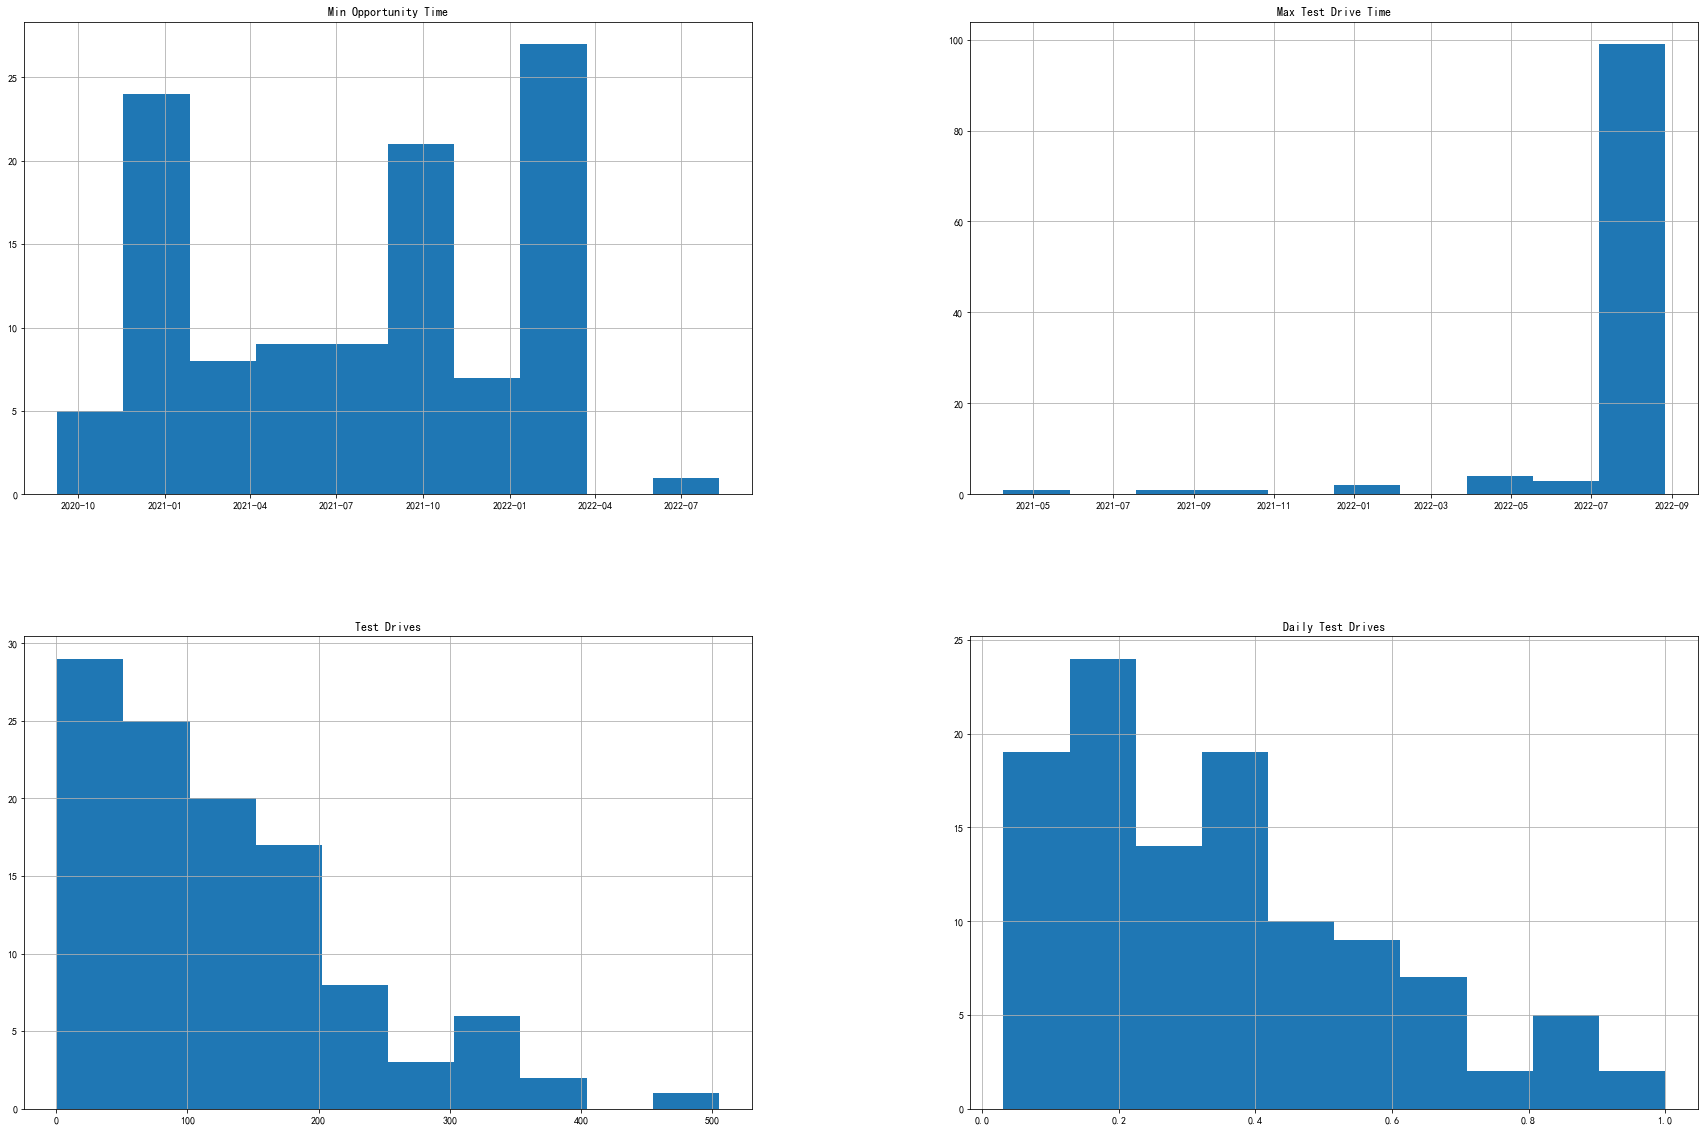

In [91]:
col_list = ['Min Opportunity Time', 'Max Test Drive Time', 'Test Drives', 'Daily Test Drives']
TD_AFTER_SD_SALE_COUNT_df[col_list].hist(bins=10, figsize = (30,20))

In [92]:
TD_AFTER_SD_SALE_COUNT_df = TD_AFTER_SD_SALE_COUNT_df[(TD_AFTER_SD_SALE_COUNT_df['Max Test Drive Time'] > '2022-07-01') &
                                                      (TD_AFTER_SD_SALE_COUNT_df['Test Drives'] > 10)]

In [93]:
TD_BEFORE_SD_SALE_COUNT_df = TD_UI_BEFORE_SD_df.groupby(['vccmarket__c', 'partnerid__c', 'name__c', 'FederationIdentifier']).agg(
    {'id': 'count', 'leadtoopportunitytime__c': 'min', 'START DATE': 'min'}).reset_index()
TD_BEFORE_SD_SALE_COUNT_df.rename(columns={'vccmarket__c': 'MARKET', 'partnerid__c': 'DEALER CODE',
                     'name__c': 'DEALER', 'id': 'Test Drives', 'leadtoopportunitytime__c': 'Min Opportunity Time'}, inplace=True)

TD_MAX_DATE_df = TD_UI_BEFORE_SD_df.groupby(['vccmarket__c', 'partnerid__c', 'name__c', 'FederationIdentifier']).agg(
    {'leadtoopportunitytime__c': 'max'}).reset_index()
TD_MAX_DATE_df.rename(columns={'vccmarket__c': 'MARKET', 'partnerid__c': 'DEALER CODE',
                     'name__c': 'DEALER', 'id': 'Test Drives', 'leadtoopportunitytime__c': 'Max Test Drive Time'}, inplace=True)

TD_BEFORE_SD_SALE_COUNT_df = pd.merge(TD_BEFORE_SD_SALE_COUNT_df, TD_MAX_DATE_df)
TD_BEFORE_SD_SALE_COUNT_df['Before Course Daily Test Drives'] = TD_BEFORE_SD_SALE_COUNT_df['Test Drives'] / ((TD_BEFORE_SD_SALE_COUNT_df['Max Test Drive Time'] - TD_BEFORE_SD_SALE_COUNT_df['Min Opportunity Time']).dt.days + 1)
TD_BEFORE_SD_SALE_COUNT_df.sort_values(by='FederationIdentifier', inplace=True)
TD_BEFORE_SD_SALE_COUNT_df

MARKET DEALER CODE                        DEALER FederationIdentifier  \
11     IN     6IN6043    Swede Auto Private Limited             A-BISHT1   
5      AU     6AU3222            Volvo Cars Geelong             A-BOYLE2   
36     IN     6IN6059    KNS Vinayak Auto Pvt. Ltd.             A-SHARM8   
8      IN     6IN6038           Kerala Volvo, Kochi                 A-VV   
2      AU     6AU3112        Volvo Cars South Yarra               B-DEAN   
38     IN     6IN6071                 Krishna Volvo             C-KUMAR1   
20     IN     6IN6045                Martial Motors                 D-AG   
26     IN     6IN6049          KIFS Motors, Andheri             D-CHADHA   
28     IN     6IN6054                   Speed Volvo             D-DWIVED   
21     IN     6IN6045                Martial Motors             D-SUNDER   
0      AU     6AU3107          Volvo Cars Doncaster               E-CHOW   
42     IN     6IN6072     Volvo Tamil nadu(Chennai)             G-RAGHUN   
47     IN     6IN6073  Volvo Tamil Nadu(Coimbatore)                H-SB1   
43     IN     6IN6072     Volvo Tamil nadu(Chennai)                H-SB1   
6      AU     6AU4213         Volvo Cars Gold Coast             J-FERGU3   
31     IN     6IN6056                    Flyga Auto             J-SHARMA   
13     IN     6IN6044           Autobots, Ahmedabad             K-AGHERA   
18     IN    6IN60441               Autobots, Surat             K-AGHERA   
33     IN     6IN6057                 Scandia Volvo             K-KHARBA   
44     IN     6IN6072     Volvo Tamil nadu(Chennai)                 K-S1   
14     IN     6IN6044           Autobots, Ahmedabad             M-GAJJA1   
3      AU     6AU3112        Volvo Cars South Yarra             M-MOOR12   
45     IN     6IN6072     Volvo Tamil nadu(Chennai)                  M-S   
46     IN     6IN6072     Volvo Tamil nadu(Chennai)             N-KOTTE1   
35     IN     6IN6058        Krishna Auto, Ludhiana              N-VERMA   
1      AU     6AU3107          Volvo Cars Doncaster              O-SMITH   
15     IN     6IN6044           Autobots, Ahmedabad             P-CHAUDH   
32     IN     6IN6056                    Flyga Auto             P-SALOKH   
9      IN     6IN6038           Kerala Volvo, Kochi             R-ABRAHA   
19     IN    6IN60441               Autobots, Surat             R-CONTRA   
22     IN     6IN6045                Martial Motors                 R-DR   
34     IN     6IN6057                 Scandia Volvo             R-KUMAR6   
48     IN     6IN6075               Rajasthan Volvo             S-BIDSER   
39     IN     6IN6071                 Krishna Volvo                  S-K   
7      AU     6AU7004             Volvo Cars Hobart              S-LI107   
40     IN     6IN6071                 Krishna Volvo             S-REDDYP   
41     IN     6IN6071                 Krishna Volvo             S-RIYAZA   
29     IN     6IN6054                   Speed Volvo             S-SHAMIM   
16     IN     6IN6044           Autobots, Ahmedabad             S-SHARMA   
30     IN     6IN6054                   Speed Volvo             T-BHATIA   
37     IN     6IN6059    KNS Vinayak Auto Pvt. Ltd.             T-SINGH2   
23     IN     6IN6045                Martial Motors                  U-L   
10     IN     6IN6038           Kerala Volvo, Kochi                  U-R   
12     IN     6IN6043    Swede Auto Private Limited             V-BARRY1   
17     IN     6IN6044           Autobots, Ahmedabad             V-DUDANI   
27     IN   6IN6049S2       KIFS Motors, Prabhadevi             V-KHATRI   
24     IN     6IN6045                Martial Motors                 V-MP   
4      AU     6AU3187           Volvo Cars Brighton              W-WONG5   
25     IN     6IN6045                Martial Motors                  Y-A   

    Test Drives Min Opportunity Time START DATE Max Test Drive Time  \
11           50  2021-01-09 11:05:40 2022-01-18 2022-01-13 06:52:29   
5             1  2021-05-09 23:08:05 2021-08-25 2021-05-09 2

array([[<AxesSubplot:title={'center':'Min Opportunity Time'}>,
        <AxesSubplot:title={'center':'Max Test Drive Time'}>],
       [<AxesSubplot:title={'center':'Test Drives'}>,
        <AxesSubplot:title={'center':'Before Course Daily Test Drives'}>]],
      dtype=object)

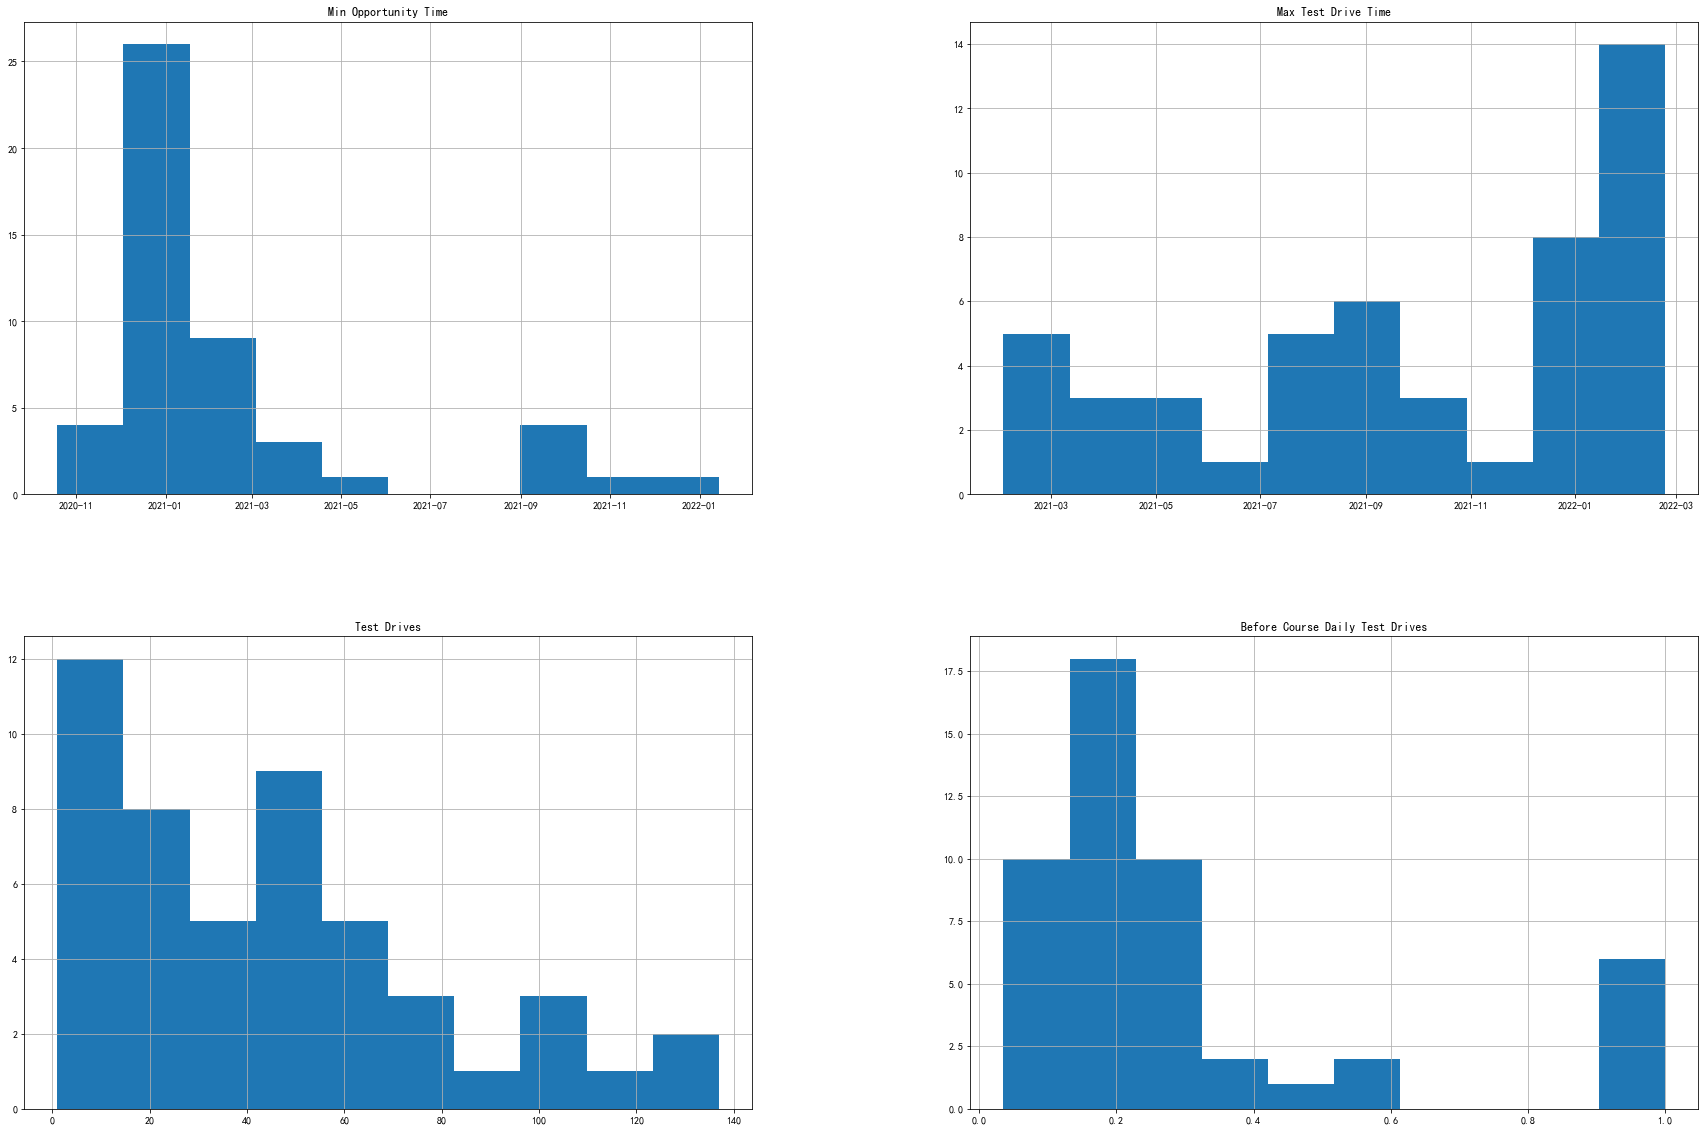

In [94]:
col_list = ['Min Opportunity Time', 'Max Test Drive Time', 'Test Drives', 'Before Course Daily Test Drives']
TD_BEFORE_SD_SALE_COUNT_df[col_list].hist(bins=10, figsize = (30,20))

In [95]:
TD_BEFORE_SD_SALE_COUNT_df = TD_BEFORE_SD_SALE_COUNT_df[(TD_BEFORE_SD_SALE_COUNT_df['Test Drives'] > 10)]

In [96]:
TD_SD_SALE_COUNT_df = pd.merge(TD_AFTER_SD_SALE_COUNT_df, TD_BEFORE_SD_SALE_COUNT_df, on=['MARKET', 'DEALER CODE', 'DEALER', 'FederationIdentifier'])
TD_SD_SALE_COUNT_df['Daily Test Drives Varies'] = (TD_SD_SALE_COUNT_df['Daily Test Drives'] - TD_SD_SALE_COUNT_df['Before Course Daily Test Drives'])

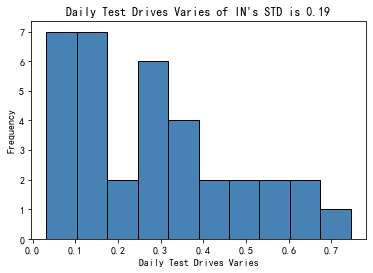

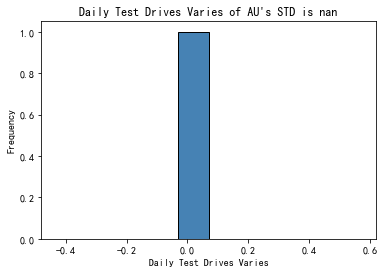

In [97]:
batch_plot_std(TD_SD_SALE_COUNT_df, 'Daily Test Drives Varies', 'Market' )

### 计算After Course Daily Test Drives和Before Course Daily Test Drives的相关性
1. plot_r函数输出相关性图片并保存

In [98]:
plot_r(TD_SD_SALE_COUNT_df, file_name='After Course Daily Test Drives vs Before Course Daily Test Drives', col_1='Daily Test Drives', col_2='Before Course Daily Test Drives', title='After Course Daily Test Drives vs Before Course Daily Test Drives')

### 按Dealer维度统计Test Drives标准差
1. 按照MARKET, DEALER CODE, DEALER分组计算Test Drives的标准差
2. 按照DEALER排序输出结果SD_TD_D_df

In [99]:
SD_TD_D = TD_AFTER_SD_SALE_COUNT_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Test Drives'].std().round(2)
SD_TD_D.rename('SD_TD_D', inplace=True)
SD_TD_D_df = SD_TD_D.reset_index()
# SD_OP_D_df.rename(columns={'vccmarket__c':'MARKET', 'partnerid__c':'DEALER CODE', 'name__c':'DEALER'}, inplace=True)
SD_TD_D_df.sort_values('DEALER', inplace=True)
SD_TD_D_df

MARKET DEALER CODE                         DEALER  SD_TD_D
23     IN     6IN6044            Autobots, Ahmedabad    22.34
24     IN    6IN60441                Autobots, Surat      NaN
34     IN     6IN6060                  Central Volvo      NaN
30     IN     6IN6056                     Flyga Auto    29.70
27     IN     6IN6049           KIFS Motors, Andheri   118.79
28     IN   6IN6049S2        KIFS Motors, Prabhadevi    48.79
33     IN     6IN6059     KNS Vinayak Auto Pvt. Ltd.    35.36
20     IN    6IN60381          Kerala Volvo, Calicut      NaN
19     IN     6IN6038            Kerala Volvo, Kochi    42.26
26     IN     6IN6048       Krishna Auto, Chandigarh    11.00
32     IN     6IN6058         Krishna Auto, Ludhiana    18.38
36     IN     6IN6071                  Krishna Volvo    78.30
25     IN     6IN6045                 Martial Motors    53.61
39     IN     6IN6075                Rajasthan Volvo      NaN
35     IN     6IN6061                      SPL Volvo    85.33
31     IN     6IN6057                  Scandia Volvo    78.44
29     IN     6IN6054                    Speed Volvo    22.22
21     IN     6IN6043     Swede Auto Private Limited    23.08
22     IN    6IN60431                  Viking Motors    28.18
12     AU     6AU3187            Volvo Cars Brighton      NaN
14     AU     6AU4008      Volvo Cars Brisbane North   118.79
8      AU     6AU2605            Volvo Cars Canberra      NaN
5      AU     6AU2251       Volvo Cars Central Coast      NaN
10     AU     6AU3107           Volvo Cars Doncaster    22.74
15     AU     6AU4213          Volvo Cars Gold Coast      NaN
17     AU     6AU7004              Volvo Cars Hobart      NaN
18     AU     6AU7254          Volvo Cars Launceston    12.73
1      AU     6AU2068           Volvo Cars Lindfield    43.13
4      AU     6AU2173           Volvo Cars Liverpool      NaN
13     AU     6AU3206           Volvo Cars Melbourne    15.13
2      AU     6AU2088              Volvo Cars Mosman      NaN
3      AU     6AU2156          Volvo Cars Parramatta     3.54
9      AU     6AU2754             Volvo Cars Penrith     9.90
16     AU     6AU6017               Volvo Cars Perth      NaN
0      AU     6AU2014     Volvo Cars Rushcutters Bay    41.01
11     AU     6AU3112         Volvo Cars South Yarra    30.75
7      AU     6AU2581  Volvo Cars Southern Highlands     7.07
6      AU     6AU2342            Volvo Cars Tamworth      NaN
38     IN     6IN6073   Volvo Tamil Nadu(Coimbatore)    79.20
37     IN     6IN6072      Volvo Tamil nadu(Chennai)    57.40

In [100]:
# batch_plot_std(TD_AFTER_SD_SALE_COUNT_df, 'Test Drives', 'Dealer')

### 按Market维度统计Test Drives标准差
1. 按照MARKET分组计算Test Drives的标准差
2. 按照MARKET排序输出结果SD_TD_M_df

In [101]:
SD_TD_M = TD_AFTER_SD_SALE_COUNT_df.groupby(['MARKET'])['Test Drives'].std().round(2)
SD_TD_M.rename('SD_TD_M', inplace=True)
SD_TD_M_df = SD_TD_M.reset_index()
SD_TD_M_df.sort_values('MARKET', inplace=True)
SD_TD_M_df

MARKET  SD_TD_M
0     AU    77.15
1     IN    91.43

### 计算Test Drives和Course Rating的相关性
1. 按TD_AFTER_SD_SALE_COUNT_df.FederationIdentifier和course_rating_df.USER CODE内联得到CR_TD_df
2. 输出结果CR_TD_df
3. plot_r函数输出相关性图片并保存

In [102]:
CR_TD_df = TD_AFTER_SD_SALE_COUNT_df.merge(course_rating_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CR_TD_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CR_TD_df.head()

MARKET DEALER CODE                    DEALER FederationIdentifier  \
0     IN     6IN6060             Central Volvo             A-ARORA2   
1     IN     6IN6054               Speed Volvo             A-KAPOOR   
2     IN     6IN6048  Krishna Auto, Chandigarh             A-SHARM3   
3     IN     6IN6071             Krishna Volvo             C-KUMAR1   
4     IN     6IN6071             Krishna Volvo               E-PAUL   

   Test Drives Min Opportunity Time START DATE Max Test Drive Time  \
0          133  2020-11-23 00:00:00 2019-08-06 2022-08-10 08:28:18   
1           90  2020-12-12 09:35:52 2019-06-20 2022-08-25 08:10:02   
2          139  2021-01-15 04:53:55 2019-07-16 2022-08-17 06:28:17   
3          180  2021-08-30 08:07:05 2021-08-28 2022-08-19 11:37:51   
4          198  2020-12-21 04:30:48 2019-06-20 2022-08-19 11:46:28   

   Daily Test Drives MARKET_y  ...      LAST NAME FIRST NAME USER CODE  \
0           0.212460    INDIA  ...          Arora   Abhishek  A-ARORA2   
1           0.144928    INDIA  ...          Kapur      Arpan  A-KAPOOR   
2           0.239655    INDIA  ...         Sharma     Ankush  A-SHARM3   
3           0.507042    INDIA  ...  Pradeep Kumar     Chanda  C-KUMAR1   
4           0.326194    INDIA  ...           Paul   Emmanuel    E-PAUL   

      CODE          TITLE   CODE.1                         TRAINING  \
0  RTT0001  Course Rating  RTT0001  VCC5040: MY23 Introduction Film   
1  RTT0001  Course Rating  RTT0001  VCC5040: MY23 Introduction Film   
2  RTT0001  Course Rating  RTT0001  VCC5040: MY23 Introduction Film   
3  RTT0001  Course Rating  RTT0001  VCC5040: MY23 Introduction Film   
4  RTT0001  Course Rating  RTT0001  VCC5040: MY23 Introduction Film   

  Course Rating    STATUS                 DATE  
0          5.00  FINISHED  09/08/2022 09:29:52  
1          9.33  FINISHED  03/08/2022 05:17:41  
2          9.00  FINISHED  02/08/2022 09:33:49  
3         10.00  FINISHED  03/08/2022 10:40:25  
4         10.00  FINISHED  09/08/2022 12:49:57  

[5 rows x 24 columns]

In [103]:
CR_TD_df.to_csv(r'Correlation\CR_TD_df.csv')

In [104]:
plot_r(CR_TD_df, 'Course Rating vs Test Drives', 'Course Rating', 'Test Drives', 'Course Rating vs Test Drives')

### 计算Test Drives和Course Completion的相关性
1. 按TD_AFTER_SD_SALE_COUNT_df.FederationIdentifier和complement_df.CDSID内联得到CC_TD_df
2. 输出结果CC_TD_df
3. plot_r函数输出相关性图片并保存

In [105]:
CC_TD_df = TD_AFTER_SD_SALE_COUNT_df.merge(complement_df, left_on=['FederationIdentifier'], right_on=['CDSID'], how='inner')
CC_TD_df.dropna(subset=['Course Completion', 'Test Drives'], inplace=True, how='any')
CC_TD_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CC_TD_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      IN     6IN6060               Central Volvo             A-ARORA2   
1      IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2      AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
3      IN     6IN6054                 Speed Volvo             A-KAPOOR   
4      IN     6IN6061                   SPL Volvo               A-SAHA   
..    ...         ...                         ...                  ...   
94     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
95     IN     6IN6045              Martial Motors                 V-MP   
96     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
97     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
98     IN     6IN6045              Martial Motors                  Y-A   

    Test Drives Min Opportunity Time START DATE_x Max Test Drive Time  \
0           133  2020-11-23 00:00:00   2019-08-06 2022-08-10 08:28:18   
1            76  2022-01-25 09:18:41   2022-01-18 2022-08-18 06:24:07   
2           130  2021-10-23 00:56:04   2020-03-12 2022-08-18 23:04:35   
3            90  2020-12-12 09:35:52   2019-06-20 2022-08-25 08:10:02   
4           228  2020-12-16 06:10:17   2019-07-01 2022-08-05 10:40:53   
..          ...                  ...          ...                 ...   
94          315  2021-03-13 11:30:40   2021-03-11 2022-08-26 06:59:44   
95          164  2022-02-03 08:57:04   2022-01-19 2022-08-22 12:04:14   
96          188  2021-02-05 07:10:14   2020-03-11 2022-08-13 06:54:57   
97          112  2021-12-22 23:29:34   2021-12-21 2022-08-18 03:39:42   
98          180  2022-01-31 06:50:11   2022-01-22 2022-08-23 03:35:53   

    Daily Test Drives   MARKET_y  ... Frequency Recency Rank Frequency Rank  \
0            0.212460      INDIA  ...  0.020909     0.038647       0.681159   
1            0.370732      INDIA  ...  0.117347     0.227053       0.275362   
2            0.433333  AUSTRALIA  ...  0.008685     0.560386       0.917874   
3            0.144928      INDIA  ...  0.020158     0.159420       0.714976   
4            0.381271      INDIA  ...  0.020390     0.227053       0.705314   
..                ...        ...  ...       ...          ...            ...   
94           0.593220      INDIA  ...  0.044487     0.038647       0.487923   
95           0.815920      INDIA  ...  1.466667     0.908213       0.086957   
96           0.339350  AUSTRALIA  ...  0.009206     0.333333       0.898551   
97           0.468619  AUSTRALIA  ...  0.056452     0.777778       0.458937   
98           0.882353      INDIA  ...  2.200000     0.932367       0.004831   

    Completion Rank  Start Rank      Rank Recency Binary  Frequency Binary  \
0          0.202703    0.178744  0.270531              1                 0   
1          0.202703    0.729469  0.173913              1                 1   
2          0.711712    0.299517  0.864734              0                 0   
3          0.202703    0.062802  0.309179              1                 0   
4          0.202703    0.091787  0.357488              1                 0   
..              ...         ...       ...            ...               ...   
94         0.202703    0.415459  0.198068              1                 1   
95         0.355856    0.748792  0.463768              0                 1   
96         0.644144    0.289855  0.719807              1                 0   
97         0.711712    0.676329  0.758454              0                 1   
98         0.355856    0.792271  0.420290              0                 1   

    Completion Binary  Sales Learning Programme Completion(%)  
0                   0                                   76.67  
1                   1                                   76.67  
2                   0                                   23.33  
3                   0                                   76.67  
4                   0          

Text(0.5, 1.0, 'Correlation of Features')

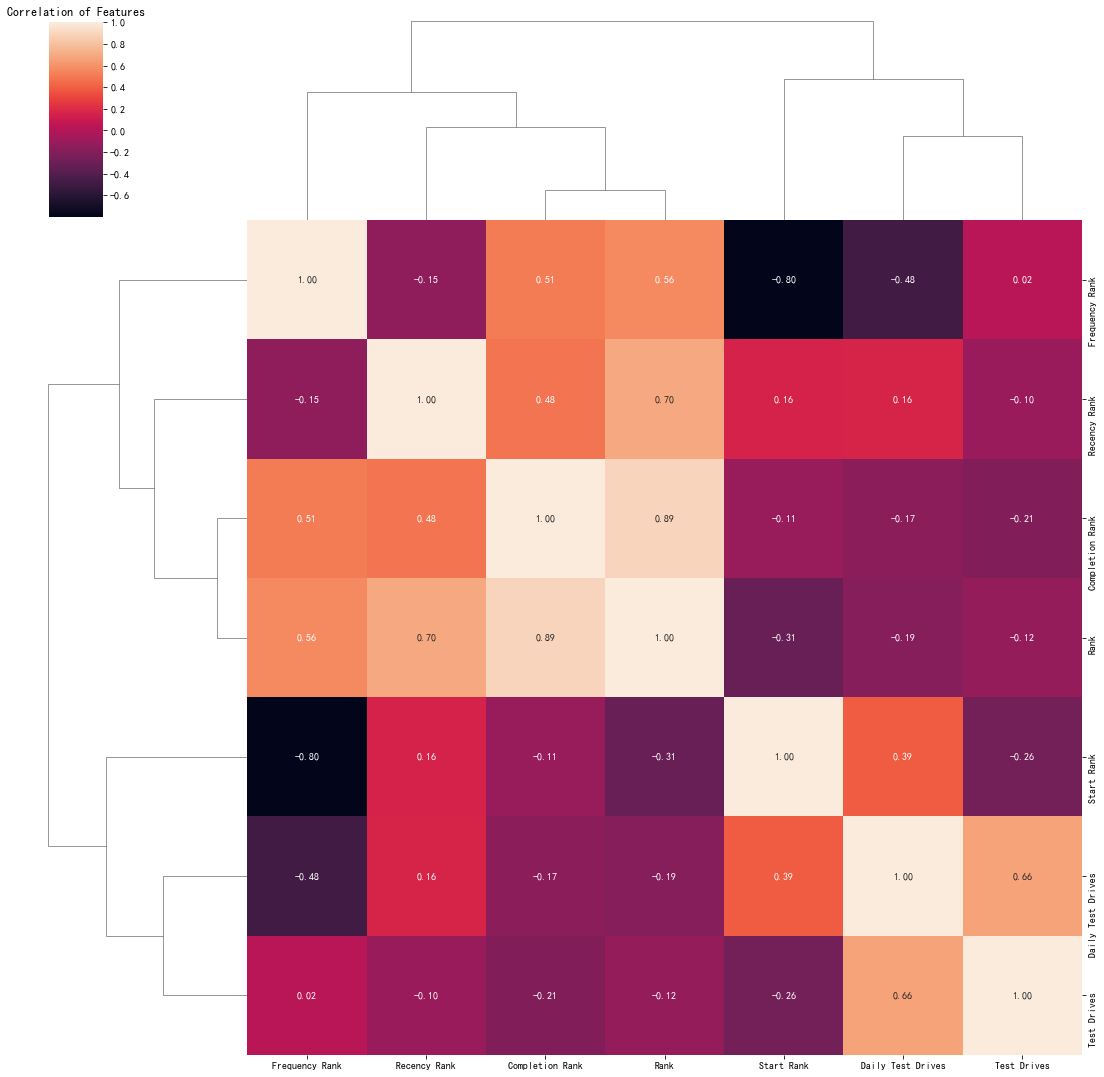

In [106]:
col_list = ['Recency Rank',	'Frequency Rank', 'Completion Rank', 'Start Rank', 'Rank', 'Daily Test Drives', 'Test Drives']
corr_matrix = CC_TD_df[col_list].corr()
sns.clustermap(corr_matrix, annot=True, fmt=".2f", figsize = (15,15));
plt.title("Correlation of Features")

In [107]:
CC_TD_df.to_csv(r'Correlation\CC_TD_df.csv')

In [108]:
plot_r(CC_TD_df, 'Frequency Rank vs Daily Test Drives', 'Frequency Rank', 'Daily Test Drives', 'Frequency Rank vs Daily Test Drives')

In [109]:
plot_r(CC_TD_df, 'Course Completion vs Daily Test Drives', 'Rank', 'Daily Test Drives', 'Course Completion vs Daily Test Drives')

In [110]:
plot_r(CC_TD_df, 'Course Completion vs Test Drives', 'Course Completion', 'Test Drives', 'Course Completion vs Test Drives')

In [111]:
plot_r(CC_TD_df, 'Course Completion vs Daily Test Drives', 'Course Completion', 'Daily Test Drives', 'Course Completion vs Daily Test Drives')

### 计算Test Drives和Course Post-Test Score的相关性
1. 按TD_AFTER_SD_SALE_COUNT_df.FederationIdentifier和assessment_df.USER CODE内联得到CPT_TD_df
2. 输出结果CPT_TD_df
3. plot_r函数输出相关性图片并保存

In [112]:
CPT_TD_df = TD_AFTER_SD_SALE_COUNT_df.merge(assessment_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CPT_TD_df.dropna(subset=['Course Post-Test Score', 'Test Drives'], inplace=True, how='any')
CPT_TD_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CPT_TD_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      AU     6AU2088           Volvo Cars Mosman             B-AMBRO3   
1      AU     6AU4008   Volvo Cars Brisbane North             B-GUNNI1   
2      AU     6AU3206        Volvo Cars Melbourne             D-DIMAR1   
3      AU     6AU3206        Volvo Cars Melbourne             D-TAYL12   
4      AU     6AU3107        Volvo Cars Doncaster              D-ZERBI   
5      AU     6AU3107        Volvo Cars Doncaster               E-CHOW   
6      AU     6AU2014  Volvo Cars Rushcutters Bay              F-MILLS   
7      AU     6AU3112      Volvo Cars South Yarra             J-DAWSO1   
8      AU     6AU4213       Volvo Cars Gold Coast             J-FERGU3   
9      AU     6AU2014  Volvo Cars Rushcutters Bay               J-MA36   
10     AU     6AU7254       Volvo Cars Launceston             J-PEARC2   
11     AU     6AU2156       Volvo Cars Parramatta             L-LARKI1   
12     AU     6AU3112      Volvo Cars South Yarra             M-CHRAP1   
13     AU     6AU7254       Volvo Cars Launceston              M-DEAN1   
14     AU     6AU3112      Volvo Cars South Yarra             M-MOOR12   
15     AU     6AU3107        Volvo Cars Doncaster              O-SMITH   
16     AU     6AU3206        Volvo Cars Melbourne             S-AGRAWA   
17     AU     6AU2605         Volvo Cars Canberra             S-COLLI2   
18     AU     6AU2068        Volvo Cars Lindfield             T-BEAUMO   
19     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
20     AU     6AU3187         Volvo Cars Brighton              W-WONG5   

    Test Drives Min Opportunity Time START DATE Max Test Drive Time  \
0            23  2021-11-22 00:00:36 2021-03-15 2022-07-02 05:43:10   
1           356  2021-02-02 01:59:54 2019-08-09 2022-08-26 03:19:03   
2            87  2021-08-12 03:48:52 2019-07-19 2022-08-15 02:40:31   
3            58  2021-11-20 04:50:42 2019-07-04 2022-08-07 23:48:03   
4            72  2021-09-17 07:45:34 2020-02-10 2022-08-19 02:52:01   
5            28  2022-02-21 04:33:51 2021-07-26 2022-07-23 07:54:53   
6           124  2021-10-22 22:00:44 2020-08-22 2022-08-16 04:59:31   
7            49  2021-04-07 02:01:15 2020-01-28 2022-08-15 00:25:02   
8            52  2021-09-10 01:33:14 2021-08-26 2022-07-27 00:21:00   
9            66  2022-01-08 05:27:01 2020-03-21 2022-08-20 01:28:36   
10           51  2021-10-21 06:14:12 2021-06-28 2022-08-15 02:33:00   
11           55  2022-01-12 01:07:30 2020-03-12 2022-08-15 06:53:24   
12           55  2022-03-21 04:27:59 2021-07-16 2022-08-12 02:02:05   
13           33  2021-04-08 07:16:16 2020-10-15 2022-08-02 06:45:57   
14          105  2021-11-11 05:32:52 2021-07-28 2022-08-15 05:39:13   
15           60  2021-09-10 05:57:21 2021-03-12 2022-08-12 04:53:42   
16           80  2021-12-01 23:29:28 2019-07-08 2022-08-18 03:43:25   
17          209  2021-07-20 01:18:04 2020-09-29 2022-08-19 07:07:57   
18           69  2021-10-05 07:47:26 2020-12-17 2022-08-20 05:02:28   
19          188  2021-02-05 07:10:14 2020-03-11 2022-08-13 06:54:57   
20          112  2021-12-22 23:29:34 2021-12-21 2022-08-18 03:39:42   

    Daily Test Drives   MARKET_y  ...   LAST NAME FIRST NAME USER CODE  \
0            0.103139  AUSTRALIA  ...     Ambrose        Ben  B-AMBRO3   
1            0.623468  AUSTRALIA  ...      Gunnis       Bill  B-GUNNI1   
2            0.236413  AUSTRALIA  ...  Di Martino    Domenic  D-DIMAR1   
3            0.222222  AUSTRALIA  ...      Taylor     Daniel  D-TAYL12   
4            0.214286  AUSTRALIA  ...       Zerbi    Domenic   D-ZERBI   
5            0.183007  AUSTRALIA  ...        Chow    Elfleda    E-CHOW   
6            0.416107  AUSTRALIA  ...       Mills     Fraser   F-MILLS   
7            0.098990  AUSTRALIA  ...      Dawson     justin  J-DAWSO1   
8            0.162500  AUSTRALIA  ...    Ferguson   Jonathan  J-FERGU3   
9            0.294643  AUSTRALIA  ...          Ma    Johnson    J-MA36 

In [113]:
CPT_TD_df.to_csv(r'Correlation\CPT_TD_df.csv')

In [114]:
plot_r(CPT_TD_df, 'Course Post-Test Score vs Test Drives', 'Course Post-Test Score', 'Test Drives', 'Course Post-Test Score vs Test Drives')

### 计算Test Drives和Sales Learning Programme Completion的相关性
1. 按TD_AFTER_SD_SALE_COUNT_df.FederationIdentifier和complement_df.CDSID内联得到SLPC_TD_df
2. 输出结果SLPC_TD_df
3. plot_r函数输出相关性图片并保存

In [115]:
SLPC_TD_df = TD_AFTER_SD_SALE_COUNT_df.merge(complement_df, left_on=['FederationIdentifier'], right_on=['CDSID'], how='inner')
SLPC_TD_df.dropna(subset=['Sales Learning Programme Completion(%)', 'Test Drives'], inplace=True, how='any')
SLPC_TD_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
SLPC_TD_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      IN     6IN6060               Central Volvo             A-ARORA2   
1      IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2      AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
3      IN     6IN6054                 Speed Volvo             A-KAPOOR   
4      IN     6IN6061                   SPL Volvo               A-SAHA   
..    ...         ...                         ...                  ...   
94     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
95     IN     6IN6045              Martial Motors                 V-MP   
96     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
97     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
98     IN     6IN6045              Martial Motors                  Y-A   

    Test Drives Min Opportunity Time START DATE_x Max Test Drive Time  \
0           133  2020-11-23 00:00:00   2019-08-06 2022-08-10 08:28:18   
1            76  2022-01-25 09:18:41   2022-01-18 2022-08-18 06:24:07   
2           130  2021-10-23 00:56:04   2020-03-12 2022-08-18 23:04:35   
3            90  2020-12-12 09:35:52   2019-06-20 2022-08-25 08:10:02   
4           228  2020-12-16 06:10:17   2019-07-01 2022-08-05 10:40:53   
..          ...                  ...          ...                 ...   
94          315  2021-03-13 11:30:40   2021-03-11 2022-08-26 06:59:44   
95          164  2022-02-03 08:57:04   2022-01-19 2022-08-22 12:04:14   
96          188  2021-02-05 07:10:14   2020-03-11 2022-08-13 06:54:57   
97          112  2021-12-22 23:29:34   2021-12-21 2022-08-18 03:39:42   
98          180  2022-01-31 06:50:11   2022-01-22 2022-08-23 03:35:53   

    Daily Test Drives   MARKET_y  ... Frequency Recency Rank Frequency Rank  \
0            0.212460      INDIA  ...  0.020909     0.038647       0.681159   
1            0.370732      INDIA  ...  0.117347     0.227053       0.275362   
2            0.433333  AUSTRALIA  ...  0.008685     0.560386       0.917874   
3            0.144928      INDIA  ...  0.020158     0.159420       0.714976   
4            0.381271      INDIA  ...  0.020390     0.227053       0.705314   
..                ...        ...  ...       ...          ...            ...   
94           0.593220      INDIA  ...  0.044487     0.038647       0.487923   
95           0.815920      INDIA  ...  1.466667     0.908213       0.086957   
96           0.339350  AUSTRALIA  ...  0.009206     0.333333       0.898551   
97           0.468619  AUSTRALIA  ...  0.056452     0.777778       0.458937   
98           0.882353      INDIA  ...  2.200000     0.932367       0.004831   

    Completion Rank  Start Rank      Rank Recency Binary  Frequency Binary  \
0          0.202703    0.178744  0.270531              1                 0   
1          0.202703    0.729469  0.173913              1                 1   
2          0.711712    0.299517  0.864734              0                 0   
3          0.202703    0.062802  0.309179              1                 0   
4          0.202703    0.091787  0.357488              1                 0   
..              ...         ...       ...            ...               ...   
94         0.202703    0.415459  0.198068              1                 1   
95         0.355856    0.748792  0.463768              0                 1   
96         0.644144    0.289855  0.719807              1                 0   
97         0.711712    0.676329  0.758454              0                 1   
98         0.355856    0.792271  0.420290              0                 1   

    Completion Binary  Sales Learning Programme Completion(%)  
0                   0                                   76.67  
1                   1                                   76.67  
2                   0                                   23.33  
3                   0                                   76.67  
4                   0          

In [116]:
plot_r(SLPC_TD_df, 'Sales Learning Programme Completion(%) vs Test Drives', 'Sales Learning Programme Completion(%)', 'Test Drives', 'Sales Learning Programme Completion(%) vs Test Drives')

## 处理Retail Orders

### 联表order_df和user_info_df
1. 按order_df.opportunity__c和opportunity_ownerid_df.id内联得到中间表order_temp_df
2. 将order_temp_df中owerid列为空的行的id记录为order_lost_df，即opportunity_ownerid_df相对order_df缺少的opportunity__c(仅作数据缺失记录)
3. 将order_df.opportunity__c去除order_lost_df的opportunity__c记为clean_order_df(仅作数据缺失记录)
4. 将order_temp_df中owerid列为空的行舍去
5. 按order_temp_df.ownerid和user_info_df.Id内联得到带有sale信息的order表————order_user_info_df

In [117]:
# 按经销商维度统计订单数量标准差
print(len(order_df))
order_temp_df = pd.merge(order_df.rename(columns={'id': 'order_id'}), opportunityid_ownerid_df.rename(columns={'id': 'opportunity_id'}), left_on='opportunity__c', right_on='opportunity_id', how='left')
order_lost_df = order_temp_df[pd.isnull(order_temp_df['ownerid'])]['opportunity__c'].to_frame()
clean_order_df = order_df[~order_df['opportunity__c'].isin(order_lost_df['opportunity__c'])]
order_temp_df.dropna(subset=['ownerid'], inplace=True)
print(len(clean_order_df))
print(len(order_temp_df))
# user_info_order_lost_df = pd.merge(user_info_df, order_temp_df, left_on='Id', right_on='ownerid', how='left')
# user_info_order_lost_df = user_info_order_lost_df[pd.isnull(user_info_order_lost_df['Id'])]['ownerid']
# user_info_order_lost_df.to_csv('user_info_order_lost_id.csv')
print(len(pd.merge(user_info_df, order_temp_df, left_on='Id', right_on='ownerid', how='inner')))
order_user_info_df = pd.merge(user_info_df, order_temp_df, left_on='Id', right_on='ownerid', how='inner')
order_user_info_df

13517
13344
13344
9017


Id           ContactId             Title  IsActive  \
0     0052w000004iai2AAA  0032w00000DHbaeAAD               NaN      True   
1     0052w000004ieBAAAY  0032w00000DHcS7AAL     Business Head      True   
2     0052w000004ieGfAAI  0032w00000DHcSkAAL     Sales Manager     False   
3     0052w000004ieGfAAI  0032w00000DHcSkAAL     Sales Manager     False   
4     0052w000004ieGfAAI  0032w00000DHcSkAAL     Sales Manager     False   
...                  ...                 ...               ...       ...   
9012  0052w000008BYujAAG  0032w00000gtGSCAA2  Sales Consultant      True   
9013  0052w000008BYujAAG  0032w00000gtGSCAA2  Sales Consultant      True   
9014  0052w000008BYujAAG  0032w00000gtGSCAA2  Sales Consultant      True   
9015  0052w000008BYujAAG  0032w00000gtGSCAA2  Sales Consultant      True   
9016  0052w000008BYujAAG  0032w00000gtGSCAA2  Sales Consultant      True   

     FederationIdentifier                                   Username  \
0                     NaN         consultant@volvocars.com.apac.demo   
1                A-GANDHI      anil.gandhi@scandiavolvocars.com.apac   
2                     NaN  jeetender.kumar@scandiavolvocars.com.apac   
3                     NaN  jeetender.kumar@scandiavolvocars.com.apac   
4                     NaN  jeetender.kumar@scandiavolvocars.com.apac   
...                   ...                                        ...   
9012              W-WONG5  steven.wong@volvocarsbrighton.com.au.apac   
9013              W-WONG5  steven.wong@volvocarsbrighton.com.au.apac   
9014              W-WONG5  steven.wong@volvocarsbrighton.com.au.apac   
9015              W-WONG5  steven.wong@volvocarsbrighton.com.au.apac   
9016              W-WONG5  steven.wong@volvocarsbrighton.com.au.apac   

                                     Email VCCMarket__c attributes.type  \
0                    lu.jing@volvocars.com           IN            User   
1         anil.gandhi@scandiavolvocars.com           IN            User   
2     jeetender.kumar@scandiavolvocars.com           IN            User   
3     jeetender.kumar@scandiavolvocars.com           IN            User   
4     jeetender.kumar@scandiavolvocars.com           IN            User   
...                                    ...          ...             ...   
9012  steven.wong@volvocarsbrighton.com.au           AU            User   
9013  steven.wong@volvocarsbrighton.com.au           AU            User   
9014  steven.wong@volvocarsbrighton.com.au           AU            User   
9015  steven.wong@volvocarsbrighton.com.au           AU            User   
9016  steven.wong@volvocarsbrighton.com.au           AU            User   

                                         attributes.url  ...  \
0     /services/data/v52.0/sobjects/User/0052w000004...  ...   
1     /services/data/v52.0/sobjects/User/0052w000004...  ...   
2     /services/data/v52.0/sobjects/User/0052w000004...  ...   
3     /services/data/v52.0/sobjects/User/0052w000004...  ...   
4     /services/data/v52.0/sobjects/User/0052w000004...  ...   
...                                                 ...  ...   
9012  /services/data/v52.0/sobjects/User/0052w000008...  ...   
9013  /services/data/v52.0/sobjects/User/0052w000008...  ...   
9014  /services/data/v52.0/sobjects/User/0052w000008...  ...   
9015  /services/data/v52.0/sobjects/User/0052w000008...  ...   
9016  /services/data/v52.0/sobjects/User/0052w000008...  ...   

     dmscancellationdate__c      opportunity__c ordersubmitteddate__c  \
0                       NaN  0062w0000090nxDAAQ            2022-03-09   
1                       NaN  0062w00000CQQi5AAH            2022-02-18   
2                       NaN  0062w000005rFt4AAE            2020-10-19   
3                       NaN  0062w000005rk95AAA            2020-12-29   
4                       NaN  0062w000008zMMPAA2            2021-02-05   
...                     ...                 ...                   ...   
9012                    NaN  0062w00000EtM79AAF            2022

### 联表opportunity_df和order_user_info_df
1. 按opportunity_df.id和order_user_info_df.opportunity__c内联得到OP_OR_UI_df
2. 将OP_OR_UI_df中status__c为非Cancelled的行作为有效记录
3. 将OP_OR_UI_df按照ordersubmitteddate__c倒序排列数据
4. 同一组[order_id, opportunity_id]只取最近的一条记录


In [118]:
OP_OR_UI_df = pd.merge(opportunity_df, order_user_info_df, left_on='id',
                       right_on='opportunity__c', how='inner')  # 潜在客户-订单关联表
OP_OR_UI_df = OP_OR_UI_df[OP_OR_UI_df['status__c'] != 'Cancelled']

OP_OR_UI_df.sort_values('ordersubmitteddate__c', ascending=False)
OP_OR_UI_df.drop_duplicates(['order_id', 'opportunity_id'], keep='first', inplace=True)

OP_OR_UI_df


id partnerid__c_x                   name__c_x  \
0     0062w00000DtvyoAAB       6IN60381       Kerala Volvo, Calicut   
1     0062w00000DsoBLAAZ       6IN60381       Kerala Volvo, Calicut   
2     0062w00000DWLRpAAP       6IN60381       Kerala Volvo, Calicut   
3     0062w00000D5PRfAAN       6IN60381       Kerala Volvo, Calicut   
4     0062w00000D3JnJAAV       6IN60381       Kerala Volvo, Calicut   
...                  ...            ...                         ...   
8936  0062w0000090lmFAAQ        6AU2014  Volvo Cars Rushcutters Bay   
8937  0062w0000090lbWAAQ        6AU2014  Volvo Cars Rushcutters Bay   
8938  0062w0000090iasAAA        6AU2014  Volvo Cars Rushcutters Bay   
8939  0062w0000090VNkAAM        6AU2014  Volvo Cars Rushcutters Bay   
8941  0062w0000090VMhAAM        6AU2014  Volvo Cars Rushcutters Bay   

      dedealergroupcode_x dealergroupname_x                   createddate  \
0                     NaN            Kerala  2022-06-28T06:55:49.000+0000   
1                     NaN            Kerala  2022-06-16T07:50:43.000+0000   
2                     NaN            Kerala  2022-04-20T17:53:58.000+0000   
3                     NaN            Kerala  2022-03-29T17:14:21.000+0000   
4                     NaN            Kerala  2022-03-05T03:37:53.000+0000   
...                   ...               ...                           ...   
8936                  NaN               NaN  2021-07-12T05:40:55.000+0000   
8937                  NaN               NaN  2021-07-12T00:07:52.000+0000   
8938                  NaN               NaN  2021-07-05T00:53:09.000+0000   
8939                  NaN               NaN  2021-06-13T06:26:22.000+0000   
8941                  NaN               NaN  2021-06-13T06:15:40.000+0000   

          leadtoopportunitytime__c  leadtoopportunityduration__c  \
0     2022-06-30T03:43:00.000+0000                          45.0   
1     2022-06-16T07:51:26.000+0000                           0.0   
2     2022-04-29T10:58:07.000+0000                         209.0   
3     2022-03-29T17:18:04.000+0000                           0.0   
4     2022-03-08T09:56:04.000+0000                          78.0   
...                            ...                           ...   
8936  2021-07-12T05:44:55.000+0000                           0.0   
8937  2021-07-12T00:44:08.000+0000                           1.0   
8938  2021-07-05T00:53:23.000+0000                           0.0   
8939  2021-06-13T06:29:39.000+0000                           0.0   
8941  2021-06-13T06:17:18.000+0000                           0.0   

     vccmarket__c_x                  Id  ... dmscancellationdate__c  \
0                IN  0052w000004iecfAAA  ...                    NaN   
1                IN  0052w000004iecfAAA  ...                    NaN   
2                IN  0052w000004iecfAAA  ...                    NaN   
3                IN  0052w000004iecfAAA  ...                    NaN   
4                IN  0052w000004iecfAAA  ...                    NaN   
...             ...                 ...  ...                    ...   
8936             AU  0052w000006ZjwCAAS  ...                    NaN   
8937             AU  0052w000006ZjwCAAS  ...                    NaN   
8938             AU  0052w000006ZjwCAAS  ...                    NaN   
8939             AU  0052w000006ZjwCAAS  ...                    NaN   
8941             AU  0052w000006ZjwCAAS  ...                    NaN   

          opportunity__c  ordersubmitteddate__c    status__c partnerid__c_y  \
0     0062w00000DtvyoAAB             2022-07-07  In Progress       6IN60381   
1     0062w00000DsoBLAAZ             2022-06-26    Submitted       6IN60381   
2     0062w00000DWLRpAAP             2022-04-29  In Progress       6IN60381   
3     0062w00000D5PRfAAN             2022-03-31    Completed       6IN60381   
4     0062w00000D3JnJAAV             2022-03-12  In Progress       6IN60381   
...                  ...                    ...          ...            ...   
8936  0062w0000090lmF

### 清洗OP_OR_UI_df
1. 取OP_OR_UI_df.IsActive状态为True且order_user_info_df.FederationIdentifier为非空的行记为clean_OP_OR_UI_df
2. 按clean_OP_OR_UI_df.FederationIdentifier和completion_df.CDSID内联得到带有START DATE信息的表记为OP_OR_UI_COMPLEMENT_df
3. 取OP_OR_UI_COMPLEMENT_df中leadtoopportunitytime__c晚于开始培训日期一天后的记录作为opportunity的有效记录记为OP_OR_UI_AFTER_SD_df
4. 取OP_OR_UI_COMPLEMENT_df中leadtoopportunitytime__c早于或等于开始培训日期一天后的记录作为opportunity的有效记录记为OP_OR_UI_BEFORE_SD_df

In [119]:
clean_OP_OR_UI_df = OP_OR_UI_df[(OP_OR_UI_df['IsActive'] == True) & (~pd.isna(OP_OR_UI_df['FederationIdentifier']))]
OP_OR_UI_COMPLEMENT_df = clean_OP_OR_UI_df.merge(
    complement_df, left_on='FederationIdentifier', right_on='CDSID', how="inner")
OP_OR_UI_COMPLEMENT_df['leadtoopportunitytime__c'] = pd.to_datetime(OP_OR_UI_COMPLEMENT_df['leadtoopportunitytime__c'])
OP_OR_UI_COMPLEMENT_df['leadtoopportunitytime__c'] = OP_OR_UI_COMPLEMENT_df['leadtoopportunitytime__c'].dt.tz_localize(None)
OP_OR_UI_COMPLEMENT_df['ordersubmitteddate__c'] = pd.to_datetime(OP_OR_UI_COMPLEMENT_df['ordersubmitteddate__c'])
OP_OR_UI_COMPLEMENT_df['ordersubmitteddate__c'] = OP_OR_UI_COMPLEMENT_df['ordersubmitteddate__c'].dt.tz_localize(None)

OP_OR_UI_AFTER_SD_df = OP_OR_UI_COMPLEMENT_df[(OP_OR_UI_COMPLEMENT_df['leadtoopportunitytime__c'] - OP_OR_UI_COMPLEMENT_df['START DATE']).dt.days > 0].copy()
OP_OR_UI_AFTER_SD_df.rename(columns={'vccmarket__c_x': 'vccmarket__c', 'partnerid__c_x': 'partnerid__c', 'name__c_x': 'name__c'}, inplace=True)
OP_OR_UI_AFTER_SD_df

id partnerid__c                     name__c  \
0     0062w00000DtvyoAAB     6IN60381       Kerala Volvo, Calicut   
1     0062w00000DsoBLAAZ     6IN60381       Kerala Volvo, Calicut   
2     0062w00000DWLRpAAP     6IN60381       Kerala Volvo, Calicut   
3     0062w00000D5PRfAAN     6IN60381       Kerala Volvo, Calicut   
4     0062w00000D3JnJAAV     6IN60381       Kerala Volvo, Calicut   
...                  ...          ...                         ...   
6834  0062w00000D2xwsAAB      6AU2014  Volvo Cars Rushcutters Bay   
6835  0062w00000CQc5UAAT      6AU2014  Volvo Cars Rushcutters Bay   
6836  0062w00000CO1kPAAT      6AU2014  Volvo Cars Rushcutters Bay   
6837  0062w00000CO1fnAAD      6AU2014  Volvo Cars Rushcutters Bay   
6838  0062w00000CNSkEAAX      6AU2014  Volvo Cars Rushcutters Bay   

      dedealergroupcode_x dealergroupname_x                   createddate  \
0                     NaN            Kerala  2022-06-28T06:55:49.000+0000   
1                     NaN            Kerala  2022-06-16T07:50:43.000+0000   
2                     NaN            Kerala  2022-04-20T17:53:58.000+0000   
3                     NaN            Kerala  2022-03-29T17:14:21.000+0000   
4                     NaN            Kerala  2022-03-05T03:37:53.000+0000   
...                   ...               ...                           ...   
6834                  NaN               NaN  2022-02-28T03:30:31.000+0000   
6835                  NaN               NaN  2022-02-21T03:06:07.000+0000   
6836                  NaN               NaN  2022-01-16T03:05:38.000+0000   
6837                  NaN               NaN  2022-01-16T01:53:54.000+0000   
6838                  NaN               NaN  2022-01-08T05:25:20.000+0000   

     leadtoopportunitytime__c  leadtoopportunityduration__c vccmarket__c  \
0         2022-06-30 03:43:00                          45.0           IN   
1         2022-06-16 07:51:26                           0.0           IN   
2         2022-04-29 10:58:07                         209.0           IN   
3         2022-03-29 17:18:04                           0.0           IN   
4         2022-03-08 09:56:04                          78.0           IN   
...                       ...                           ...          ...   
6834      2022-02-28 03:32:50                           0.0           AU   
6835      2022-02-21 03:10:33                           0.0           AU   
6836      2022-01-16 03:34:51                           0.0           AU   
6837      2022-01-16 01:54:52                           0.0           AU   
6838      2022-01-08 05:27:01                           0.0           AU   

                      Id  ... Frequency Recency Rank  Frequency Rank  \
0     0052w000004iecfAAA  ...  0.026217     0.381643        0.574879   
1     0052w000004iecfAAA  ...  0.026217     0.381643        0.574879   
2     0052w000004iecfAAA  ...  0.026217     0.381643        0.574879   
3     0052w000004iecfAAA  ...  0.026217     0.381643        0.574879   
4     0052w000004iecfAAA  ...  0.026217     0.381643        0.574879   
...                  ...  ...       ...          ...             ...   
6834  0052w000006ZjwEAAS  ...  0.012920     0.719807        0.840580   
6835  0052w000006ZjwEAAS  ...  0.012920     0.719807        0.840580   
6836  0052w000006ZjwEAAS  ...  0.012920     0.719807        0.840580   
6837  0052w000006ZjwEAAS  ...  0.012920     0.719807        0.840580   
6838  0052w000006ZjwEAAS  ...  0.012920     0.719807        0.840580   

     Completion Rank Start Rank      Rank Recency Binary Frequency Binary  \
0           0.144144   0.193237  0.333333              1                0   
1           0.144144   0.193237  0.333333              1                0   
2           0.144144   0.193237  0.333333              1                0   
3           0.144144   0.193237  0.333333              1                0   
4           0.144144   0.193237  0.333333              1                0   
...              ...        

In [120]:
OP_OR_UI_BEFORE_SD_df = OP_OR_UI_COMPLEMENT_df[(OP_OR_UI_COMPLEMENT_df['leadtoopportunitytime__c'] - OP_OR_UI_COMPLEMENT_df['START DATE']).dt.days <= 0].copy()
OP_OR_UI_BEFORE_SD_df.rename(columns={'vccmarket__c_x': 'vccmarket__c', 'partnerid__c_x': 'partnerid__c', 'name__c_x': 'name__c'}, inplace=True)
OP_OR_UI_BEFORE_SD_df

id partnerid__c            name__c  dedealergroupcode_x  \
31    0062w00000CNHjEAAX     6IN60441    Autobots, Surat                  NaN   
32    0062w00000BgG9tAAF     6IN60441    Autobots, Surat                  NaN   
33    0062w00000Btd2OAAR     6IN60441    Autobots, Surat                  NaN   
34    0062w00000BesOzAAJ     6IN60441    Autobots, Surat                  NaN   
35    0062w00000B6bMZAAZ     6IN60441    Autobots, Surat                  NaN   
...                  ...          ...                ...                  ...   
6091  0062w00000CPLEFAA5      6AU7004  Volvo Cars Hobart                  NaN   
6107  0062w00000CQFGyAAP      6AU7004  Volvo Cars Hobart                  NaN   
6108  0062w00000CNtx0AAD      6AU7004  Volvo Cars Hobart                  NaN   
6109  0062w00000CNtx0AAD      6AU7004  Volvo Cars Hobart                  NaN   
6113  0062w00000CQ5foAAD      6AU7004  Volvo Cars Hobart                  NaN   

     dealergroupname_x                   createddate leadtoopportunitytime__c  \
31            Autobots  2022-01-05T07:10:47.000+0000      2022-01-05 07:15:38   
32            Autobots  2021-11-10T06:09:26.000+0000      2021-11-10 06:11:24   
33            Autobots  2021-11-15T05:48:50.000+0000      2021-11-15 05:55:03   
34            Autobots  2021-10-26T06:22:28.000+0000      2021-10-26 06:24:21   
35            Autobots  2021-10-06T07:49:13.000+0000      2021-10-06 07:52:49   
...                ...                           ...                      ...   
6091               NaN  2022-02-05T02:57:37.000+0000      2022-02-05 03:46:59   
6107               NaN  2022-02-16T06:25:16.000+0000      2022-02-16 06:26:11   
6108               NaN  2022-01-14T05:21:09.000+0000      2022-01-14 05:24:19   
6109               NaN  2022-01-14T05:21:09.000+0000      2022-01-14 05:24:19   
6113               NaN  2022-02-15T01:56:43.000+0000      2022-02-15 03:55:28   

      leadtoopportunityduration__c vccmarket__c                  Id  ...  \
31                             0.0           IN  0052w000006XNTjAAO  ...   
32                             0.0           IN  0052w000006XNTjAAO  ...   
33                             0.0           IN  0052w000006XNTjAAO  ...   
34                             0.0           IN  0052w000006XNTjAAO  ...   
35                             0.0           IN  0052w000006XNTjAAO  ...   
...                            ...          ...                 ...  ...   
6091                           1.0           AU  0052w000008BYgIAAW  ...   
6107                           0.0           AU  0052w000008BYgIAAW  ...   
6108                           0.0           AU  0052w000008BYgIAAW  ...   
6109                           0.0           AU  0052w000008BYgIAAW  ...   
6113                           2.0           AU  0052w000008BYgIAAW  ...   

     Frequency Recency Rank  Frequency Rank Completion Rank Start Rank  \
31    0.111650     0.004831        0.318841        0.202703   0.690821   
32    0.111650     0.004831        0.318841        0.202703   0.690821   
33    0.111650     0.004831        0.318841        0.202703   0.690821   
34    0.111650     0.004831        0.318841        0.202703   0.690821   
35    0.111650     0.004831        0.318841        0.202703   0.690821   
...        ...          ...             ...             ...        ...   
6091  0.054545     0.768116        0.463768        0.900901   0.845411   
6107  0.054545     0.768116        0.463768        0.900901   0.845411   
6108  0.054545     0.768116        0.463768        0.900901   0.845411   
6109  0.054545     0.768116        0.463768        0.900901   0.845411   
6113  0.054545     0.768116        0.463768        0.900901   0.845411   

          Rank Recency Binary Frequency Binary Completion Binary  \
31    0.077295              1                1                 1   
32    0.077295              1                1                 1   
33    0.077295              1                1                 1   
34

### 按Sale维度统计Retail Orders数量以及Daily Orders
1. 按照vccmarket__c, partnerid__c, name__c, FederationIdentifier分组统计每个Sale的Retail Orders数量(记为Retail Orders)、有效订单最小时间(记为Min Opportunity Time)、培训开始日期(记为START DATE)
2. 按照FederationIdentifier排序输出结果OR_AFTER_SD_SALE_COUNT_df(晚于培训开始日期的结果), TD_BEFORE_SD_SALE_COUNT_df(早于培训开始日期的结果)
3. 分别对OR_AFTER_SD_SALE_COUNT_df(晚于培训开始日期的结果), OR_BEFORE_SD_SALE_COUNT_df(早于培训开始日期的结果)求日均订单数量记为(Daily Orders)
4. Daily Orders = Retail Orders / (Max Order Time - Min Opportunity Time + 1)
5. 取OR_AFTER_SD_SALE_COUNT_df中Max Order Time晚于2022年8月1日且Retail Orders > 30的数据为有效数据
6. 取OR_BEFORE_SD_SALE_COUNT_df中Retail Orders > 30的数据为有效数据
7. 取OR_AFTER_SD_SALE_COUNT_df和OR_BEFORE_SD_SALE_COUNT_df的SALE交集，比较培训前后的日均订单数量差值(记为Daily Orders Varies)

In [121]:
OR_AFTER_SD_SALE_COUNT_df = OP_OR_UI_AFTER_SD_df.groupby(['vccmarket__c', 'partnerid__c', 'name__c', 'FederationIdentifier']).agg(
    {'order_id': 'count', 'leadtoopportunitytime__c': 'min', 'START DATE': 'min', 'ordersubmitteddate__c': 'max'}).reset_index()
OR_AFTER_SD_SALE_COUNT_df.rename(columns={'vccmarket__c': 'MARKET', 'partnerid__c': 'DEALER CODE',
                     'name__c': 'DEALER', 'order_id': 'Retail Orders', 
                     'leadtoopportunitytime__c': 'Min Opportunity Time',
                     'ordersubmitteddate__c': 'Max Order Time'}, inplace=True)
OR_AFTER_SD_SALE_COUNT_df.sort_values(by='FederationIdentifier', inplace=True)
OR_AFTER_SD_SALE_COUNT_df['Daily Orders'] = OR_AFTER_SD_SALE_COUNT_df['Retail Orders'] / ((OR_AFTER_SD_SALE_COUNT_df['Max Order Time'] - OR_AFTER_SD_SALE_COUNT_df['Min Opportunity Time']).dt.days + 1)
OR_AFTER_SD_SALE_COUNT_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
94     IN     6IN6060               Central Volvo             A-ARORA2   
50     IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
31     AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3      AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
78     IN     6IN6054                 Speed Volvo             A-KAPOOR   
..    ...         ...                         ...                  ...   
77     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
69     IN     6IN6045              Martial Motors                 V-MP   
35     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
27     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
70     IN     6IN6045              Martial Motors                  Y-A   

    Retail Orders Min Opportunity Time START DATE Max Order Time  Daily Orders  
94             24  2020-10-26 00:00:00 2019-08-06     2022-07-29      0.037383  
50             11  2022-02-11 08:33:08 2022-01-18     2022-08-25      0.056410  
31             61  2021-09-21 03:34:51 2021-08-25     2022-08-15      0.185976  
3             150  2021-04-27 22:47:34 2020-03-12     2022-08-20      0.312500  
78             23  2021-01-29 10:24:12 2019-06-20     2022-08-02      0.041818  
..            ...                  ...        ...            ...           ...  
77             41  2021-03-13 11:30:40 2021-03-11     2022-08-14      0.078998  
69              9  2022-02-18 08:31:31 2022-01-19     2022-07-25      0.057325  
35            174  2021-02-02 07:35:27 2020-03-11     2022-08-13      0.312388  
27            119  2021-12-22 23:29:34 2021-12-21     2022-08-18      0.497908  
70             19  2022-01-31 06:50:11 2022-01-22     2022-08-24      0.092683  

[112 rows x 9 columns]

array([[<AxesSubplot:title={'center':'Min Opportunity Time'}>,
        <AxesSubplot:title={'center':'Max Order Time'}>],
       [<AxesSubplot:title={'center':'Retail Orders'}>,
        <AxesSubplot:title={'center':'Daily Orders'}>]], dtype=object)

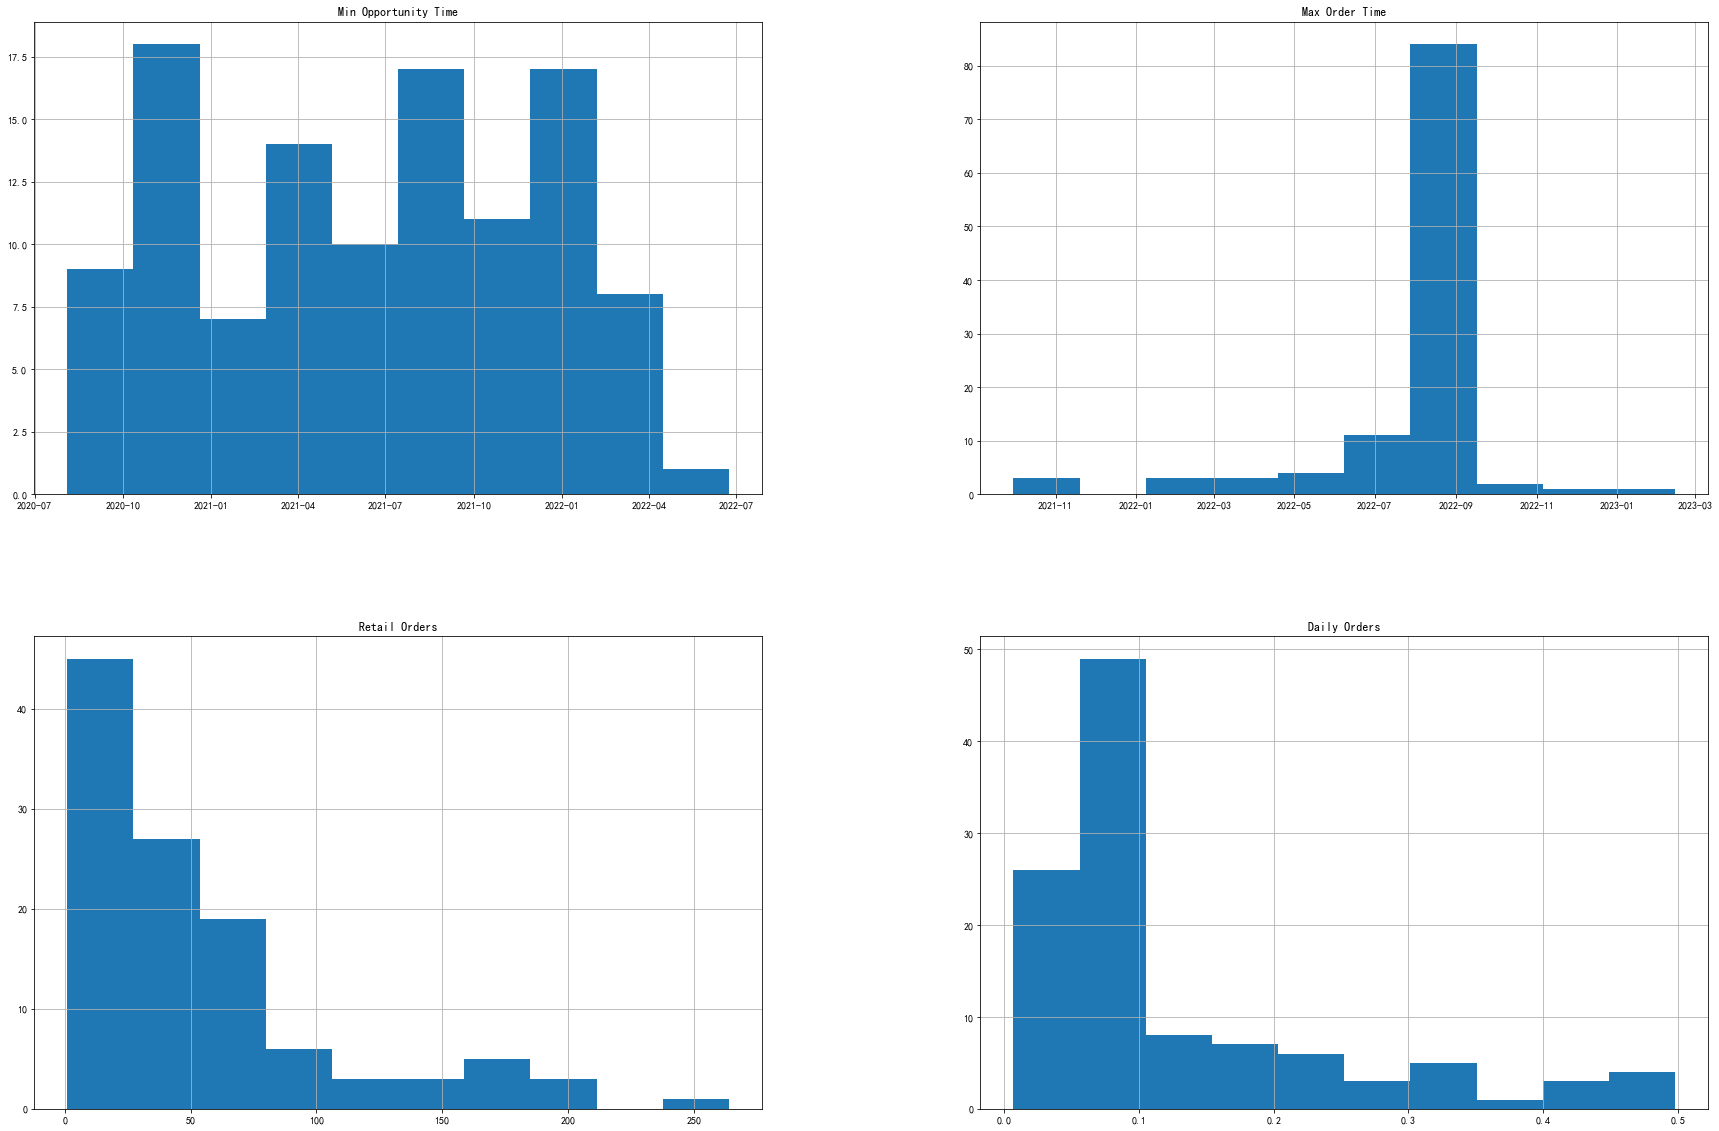

In [122]:
col_list = ['Min Opportunity Time', 'Max Order Time', 'Retail Orders', 'Daily Orders']
OR_AFTER_SD_SALE_COUNT_df[col_list].hist(bins=10, figsize = (30,20))

In [123]:
OR_AFTER_SD_SALE_COUNT_df = OR_AFTER_SD_SALE_COUNT_df[(OR_AFTER_SD_SALE_COUNT_df['Max Order Time'] > '2022-07-01') &
                                                      (OR_AFTER_SD_SALE_COUNT_df['Retail Orders'] > 10)]

In [124]:
OR_BEFORE_SD_SALE_COUNT_df = OP_OR_UI_BEFORE_SD_df.groupby(['vccmarket__c', 'partnerid__c', 'name__c', 'FederationIdentifier']).agg(
    {'order_id': 'count', 'leadtoopportunitytime__c': 'min', 'START DATE': 'min', 'ordersubmitteddate__c': 'max'}).reset_index()
OR_BEFORE_SD_SALE_COUNT_df.rename(columns={'vccmarket__c': 'MARKET', 'partnerid__c': 'DEALER CODE',
                     'name__c': 'DEALER', 'order_id': 'Retail Orders', 
                     'leadtoopportunitytime__c': 'Min Opportunity Time',
                     'ordersubmitteddate__c': 'Max Order Time'}, inplace=True)
OR_BEFORE_SD_SALE_COUNT_df.sort_values(by='FederationIdentifier', inplace=True)
OR_BEFORE_SD_SALE_COUNT_df['Before Course Daily Orders'] = OR_BEFORE_SD_SALE_COUNT_df['Retail Orders'] / ((OR_BEFORE_SD_SALE_COUNT_df['Max Order Time'] - OR_BEFORE_SD_SALE_COUNT_df['Min Opportunity Time']).dt.days + 1)
OR_BEFORE_SD_SALE_COUNT_df

MARKET DEALER CODE                        DEALER FederationIdentifier  \
11     IN     6IN6043    Swede Auto Private Limited             A-BISHT1   
5      AU     6AU3222            Volvo Cars Geelong             A-BOYLE2   
35     IN     6IN6059    KNS Vinayak Auto Pvt. Ltd.             A-SHARM8   
8      IN     6IN6038           Kerala Volvo, Kochi                 A-VV   
37     IN     6IN6071                 Krishna Volvo             C-KUMAR1   
19     IN     6IN6045                Martial Motors                 D-AG   
25     IN     6IN6049          KIFS Motors, Andheri             D-CHADHA   
27     IN     6IN6054                   Speed Volvo             D-DWIVED   
20     IN     6IN6045                Martial Motors             D-SUNDER   
0      AU     6AU3107          Volvo Cars Doncaster               E-CHOW   
41     IN     6IN6072     Volvo Tamil nadu(Chennai)             G-RAGHUN   
42     IN     6IN6072     Volvo Tamil nadu(Chennai)                H-SB1   
46     IN     6IN6073  Volvo Tamil Nadu(Coimbatore)                H-SB1   
6      AU     6AU4213         Volvo Cars Gold Coast             J-FERGU3   
30     IN     6IN6056                    Flyga Auto             J-SHARMA   
17     IN    6IN60441               Autobots, Surat             K-AGHERA   
32     IN     6IN6057                 Scandia Volvo             K-KHARBA   
43     IN     6IN6072     Volvo Tamil nadu(Chennai)                 K-S1   
1      AU     6AU3112        Volvo Cars South Yarra             M-CHRAP1   
13     IN     6IN6044           Autobots, Ahmedabad             M-GAJJA1   
2      AU     6AU3112        Volvo Cars South Yarra             M-MOOR12   
44     IN     6IN6072     Volvo Tamil nadu(Chennai)                  M-S   
45     IN     6IN6072     Volvo Tamil nadu(Chennai)             N-KOTTE1   
34     IN     6IN6058        Krishna Auto, Ludhiana              N-VERMA   
14     IN     6IN6044           Autobots, Ahmedabad             P-CHAUDH   
31     IN     6IN6056                    Flyga Auto             P-SALOKH   
9      IN     6IN6038           Kerala Volvo, Kochi             R-ABRAHA   
18     IN    6IN60441               Autobots, Surat             R-CONTRA   
21     IN     6IN6045                Martial Motors                 R-DR   
33     IN     6IN6057                 Scandia Volvo             R-KUMAR6   
3      AU     6AU3170           Volvo Cars Waverley             S-AITKEN   
47     IN     6IN6075               Rajasthan Volvo             S-BIDSER   
38     IN     6IN6071                 Krishna Volvo                  S-K   
7      AU     6AU7004             Volvo Cars Hobart              S-LI107   
39     IN     6IN6071                 Krishna Volvo             S-REDDYP   
40     IN     6IN6071                 Krishna Volvo             S-RIYAZA   
28     IN     6IN6054                   Speed Volvo             S-SHAMIM   
15     IN     6IN6044           Autobots, Ahmedabad             S-SHARMA   
29     IN     6IN6054                   Speed Volvo             T-BHATIA   
36     IN     6IN6059    KNS Vinayak Auto Pvt. Ltd.             T-SINGH2   
22     IN     6IN6045                Martial Motors                  U-L   
10     IN     6IN6038           Kerala Volvo, Kochi                  U-R   
12     IN     6IN6043    Swede Auto Private Limited             V-BARRY1   
16     IN     6IN6044           Autobots, Ahmedabad             V-DUDANI   
26     IN   6IN6049S2       KIFS Motors, Prabhadevi             V-KHATRI   
23     IN     6IN6045                Martial Motors                 V-MP   
4      AU     6AU3187           Volvo Cars Brighton              W-WONG5   
24     IN     6IN6045                Martial Motors                  Y-A   

    Retail Orders Min Opportunity Time START DATE Max Order Time  \
11             21  2020-11-30 00:00:00 2022-01-18     2022-04-12   
5               1  2021-07-30 23:06:06 2021-08-25     2021-07-31   
35             18  2020-10-31 00:00:00 2021-08-23     2022-07-29   
8     

array([[<AxesSubplot:title={'center':'Min Opportunity Time'}>,
        <AxesSubplot:title={'center':'Max Order Time'}>],
       [<AxesSubplot:title={'center':'Retail Orders'}>,
        <AxesSubplot:title={'center':'Before Course Daily Orders'}>]],
      dtype=object)

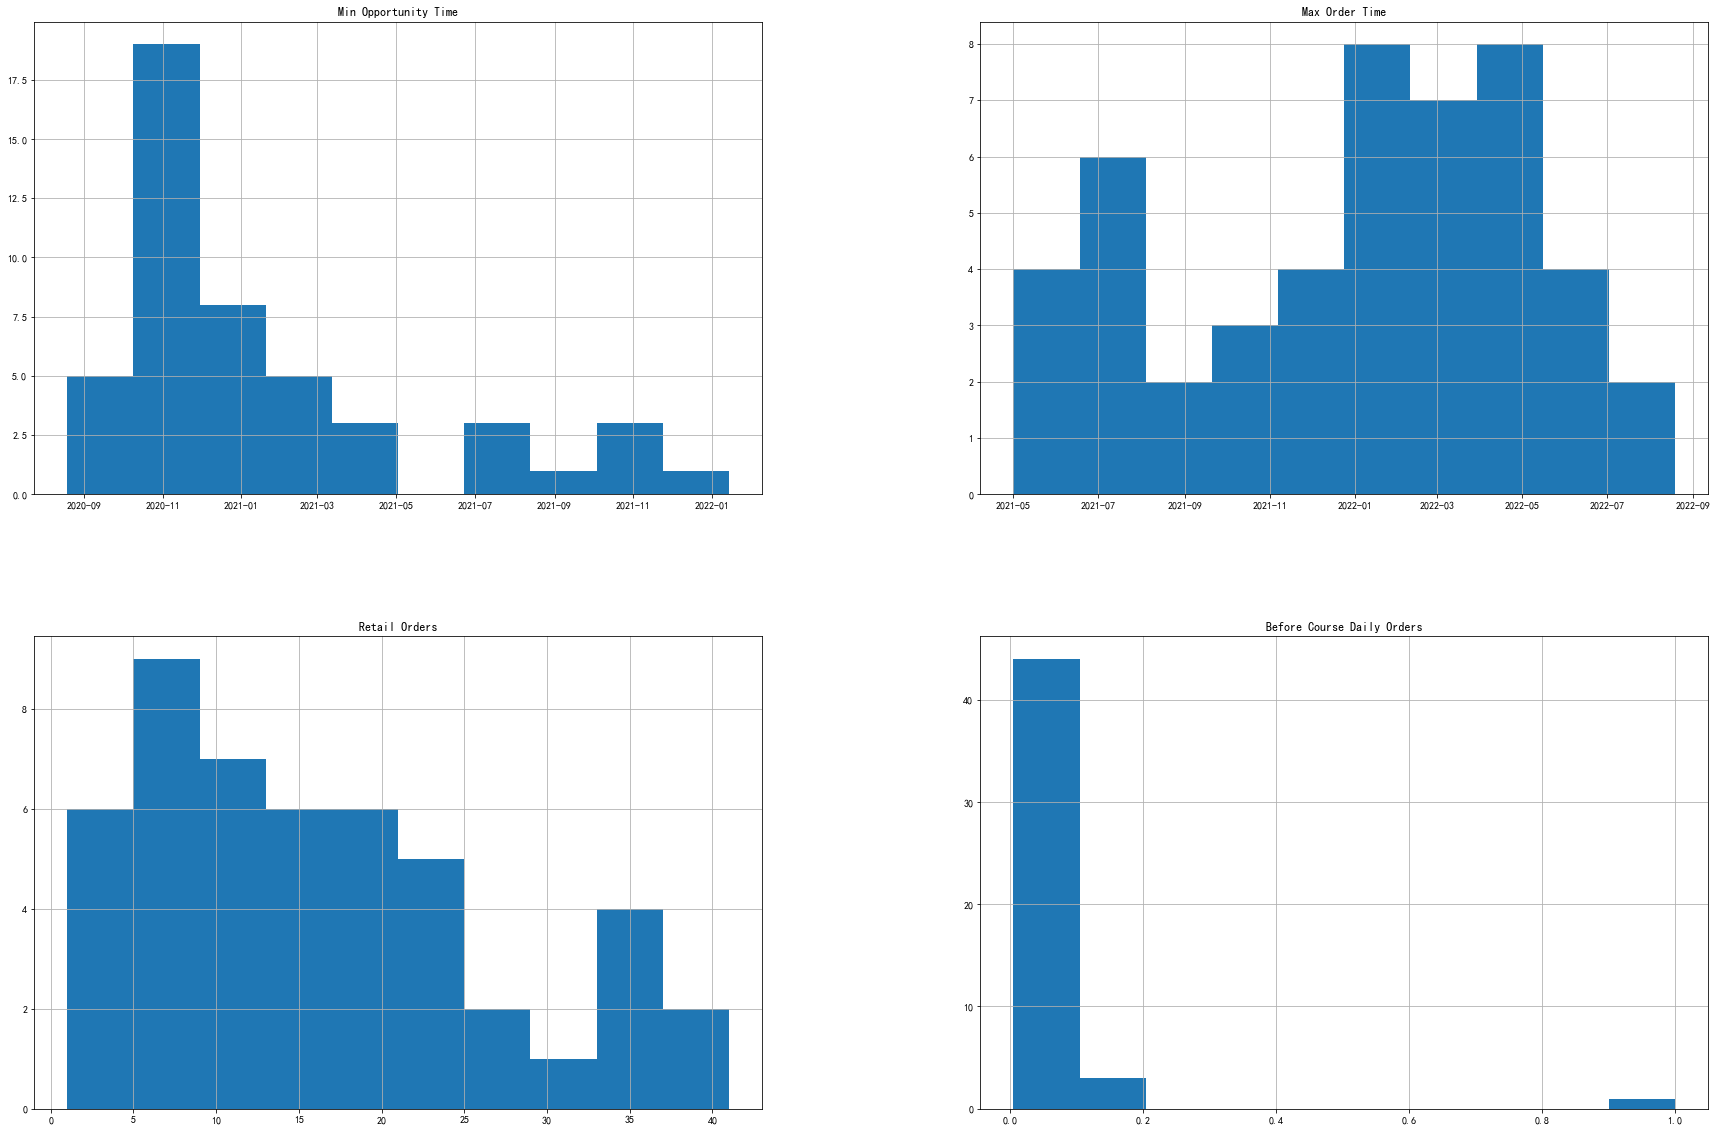

In [125]:
col_list = ['Min Opportunity Time', 'Max Order Time', 'Retail Orders', 'Before Course Daily Orders']
OR_BEFORE_SD_SALE_COUNT_df[col_list].hist(bins=10, figsize = (30,20))

In [126]:
OR_BEFORE_SD_SALE_COUNT_df = OR_BEFORE_SD_SALE_COUNT_df[(OR_BEFORE_SD_SALE_COUNT_df['Retail Orders'] > 5)]

In [127]:
OR_SD_SALE_COUNT_df = pd.merge(OR_AFTER_SD_SALE_COUNT_df, OR_BEFORE_SD_SALE_COUNT_df, on=['MARKET', 'DEALER CODE', 'DEALER', 'FederationIdentifier'])
OR_SD_SALE_COUNT_df['Daily Orders Varies'] = (OR_SD_SALE_COUNT_df['Daily Orders'] - OR_SD_SALE_COUNT_df['Before Course Daily Orders'])

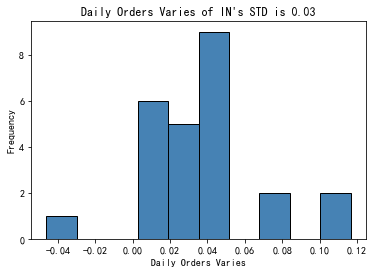

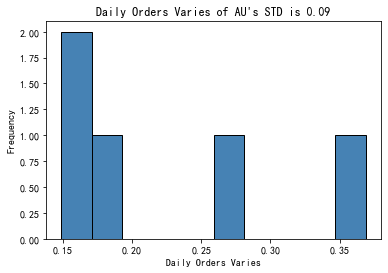

In [128]:
batch_plot_std(OR_SD_SALE_COUNT_df, 'Daily Orders Varies', 'Market' )

### 计算After Course Daily Orders和Before Course Daily Orders的相关性
1. plot_r函数输出相关性图片并保存

In [129]:
plot_r(OR_SD_SALE_COUNT_df, file_name='After Course Daily Orders vs Before Course Daily Orders', col_1='Daily Orders', col_2='Before Course Daily Orders', title='After Course Daily Orders vs Before Course Daily Orders')

### 按Dealer维度统计Retail Orders标准差
1. 按照MARKET, DEALER CODE, DEALER分组计算Retail Orders的标准差
2. 按照DEALER排序输出结果SD_RO_D_df

In [130]:
SD_RO_D = OR_AFTER_SD_SALE_COUNT_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Retail Orders'].std().round(2)
SD_RO_D.rename('SD_RO_D', inplace=True)
SD_RO_D_df = SD_RO_D.reset_index()
# SD_OP_D_df.rename(columns={'vccmarket__c':'MARKET', 'partnerid__c':'DEALER CODE', 'name__c':'DEALER'}, inplace=True)
SD_RO_D_df.sort_values('DEALER', inplace=True)
SD_RO_D_df

MARKET DEALER CODE                         DEALER  SD_RO_D
25     IN     6IN6044            Autobots, Ahmedabad    15.45
34     IN     6IN6060                  Central Volvo      NaN
31     IN     6IN6056                     Flyga Auto     4.95
28     IN     6IN6049           KIFS Motors, Andheri     4.24
29     IN   6IN6049S2        KIFS Motors, Prabhadevi    14.14
33     IN     6IN6059     KNS Vinayak Auto Pvt. Ltd.      NaN
22     IN    6IN60381          Kerala Volvo, Calicut      NaN
21     IN     6IN6038            Kerala Volvo, Kochi     7.21
27     IN     6IN6048       Krishna Auto, Chandigarh     5.69
36     IN     6IN6071                  Krishna Volvo    16.88
26     IN     6IN6045                 Martial Motors    13.01
35     IN     6IN6061                      SPL Volvo     7.02
32     IN     6IN6057                  Scandia Volvo    21.42
30     IN     6IN6054                    Speed Volvo     5.51
23     IN     6IN6043     Swede Auto Private Limited    19.09
24     IN    6IN60431                  Viking Motors     1.41
13     AU     6AU3187            Volvo Cars Brighton      NaN
16     AU     6AU4008      Volvo Cars Brisbane North    63.64
8      AU     6AU2605            Volvo Cars Canberra    75.66
5      AU     6AU2251       Volvo Cars Central Coast      NaN
10     AU     6AU3107           Volvo Cars Doncaster    14.50
15     AU     6AU3222             Volvo Cars Geelong      NaN
17     AU     6AU4213          Volvo Cars Gold Coast      NaN
19     AU     6AU7004              Volvo Cars Hobart      NaN
20     AU     6AU7254          Volvo Cars Launceston    10.61
1      AU     6AU2068           Volvo Cars Lindfield     8.49
4      AU     6AU2173           Volvo Cars Liverpool      NaN
14     AU     6AU3206           Volvo Cars Melbourne     3.51
2      AU     6AU2088              Volvo Cars Mosman      NaN
3      AU     6AU2156          Volvo Cars Parramatta     1.41
9      AU     6AU2754             Volvo Cars Penrith     8.50
18     AU     6AU6017               Volvo Cars Perth      NaN
0      AU     6AU2014     Volvo Cars Rushcutters Bay    67.18
11     AU     6AU3112         Volvo Cars South Yarra    49.00
7      AU     6AU2581  Volvo Cars Southern Highlands     5.66
6      AU     6AU2342            Volvo Cars Tamworth      NaN
12     AU     6AU3170            Volvo Cars Waverley      NaN
37     IN     6IN6072      Volvo Tamil nadu(Chennai)     7.21

In [131]:
# batch_plot_std(OR_AFTER_SD_SALE_COUNT_df, 'Retail Orders', 'Dealer')

### 按Market维度统计Retail Orders标准差
1. 按照MARKET分组计算Retail Orders的标准差
2. 按照MARKET排序输出结果SD_RO_M_df

In [132]:
SD_RO_M = OR_AFTER_SD_SALE_COUNT_df.groupby(['MARKET'])['Retail Orders'].std().round(2)
SD_RO_M.rename('SD_RO_M', inplace=True)
SD_RO_M_df = SD_RO_M.reset_index()
SD_RO_M_df.sort_values('MARKET', inplace=True)
SD_RO_M_df

MARKET  SD_RO_M
0     AU    60.11
1     IN    17.35

In [133]:
# batch_plot_std(OR_AFTER_SD_SALE_COUNT_df, 'Retail Orders', 'Market')

### 计算Retail Orders和Course Rating的相关性
1. 按OR_AFTER_SD_SALE_COUNT_df.FederationIdentifier和course_rating_df.USER CODE内联得到CR_RO_df
2. 输出结果CR_RO_df
3. plot_r函数输出相关性图片并保存

In [134]:
CR_RO_df = OR_AFTER_SD_SALE_COUNT_df.merge(course_rating_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CR_RO_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CR_RO_df.head()

MARKET DEALER CODE                    DEALER FederationIdentifier  \
0     IN     6IN6060             Central Volvo             A-ARORA2   
1     IN     6IN6054               Speed Volvo             A-KAPOOR   
2     IN     6IN6048  Krishna Auto, Chandigarh             A-SHARM3   
3     IN     6IN6071             Krishna Volvo             C-KUMAR1   
4     IN     6IN6071             Krishna Volvo               E-PAUL   

   Retail Orders Min Opportunity Time START DATE Max Order Time  Daily Orders  \
0             24  2020-10-26 00:00:00 2019-08-06     2022-07-29      0.037383   
1             23  2021-01-29 10:24:12 2019-06-20     2022-08-02      0.041818   
2             56  2020-11-23 00:00:00 2019-07-16     2022-08-20      0.088050   
3             33  2021-08-30 08:11:34 2021-08-28     2022-08-05      0.097059   
4             54  2020-11-25 00:00:00 2019-06-20     2022-08-24      0.084639   

  MARKET_y  ...      LAST NAME FIRST NAME USER CODE     CODE          TITLE  \
0    INDIA  ...          Arora   Abhishek  A-ARORA2  RTT0001  Course Rating   
1    INDIA  ...          Kapur      Arpan  A-KAPOOR  RTT0001  Course Rating   
2    INDIA  ...         Sharma     Ankush  A-SHARM3  RTT0001  Course Rating   
3    INDIA  ...  Pradeep Kumar     Chanda  C-KUMAR1  RTT0001  Course Rating   
4    INDIA  ...           Paul   Emmanuel    E-PAUL  RTT0001  Course Rating   

    CODE.1                         TRAINING Course Rating    STATUS  \
0  RTT0001  VCC5040: MY23 Introduction Film          5.00  FINISHED   
1  RTT0001  VCC5040: MY23 Introduction Film          9.33  FINISHED   
2  RTT0001  VCC5040: MY23 Introduction Film          9.00  FINISHED   
3  RTT0001  VCC5040: MY23 Introduction Film         10.00  FINISHED   
4  RTT0001  VCC5040: MY23 Introduction Film         10.00  FINISHED   

                  DATE  
0  09/08/2022 09:29:52  
1  03/08/2022 05:17:41  
2  02/08/2022 09:33:49  
3  03/08/2022 10:40:25  
4  09/08/2022 12:49:57  

[5 rows x 24 columns]

In [135]:
CR_RO_df.to_csv(r'Correlation\CR_RO_df.csv')

In [136]:
plot_r(CR_RO_df, 'Course Rating vs Retail Orders', 'Course Rating', 'Retail Orders', 'Course Rating vs Retail Orders')

### 计算Retail Orders和Course Completion的相关性
1. 按OR_AFTER_SD_SALE_COUNT_df.FederationIdentifier和complement_df.CDSID内联得到CC_RO_df
2. 输出结果CC_RO_df
3. plot_r函数输出相关性图片并保存

In [137]:
CC_RO_df = OR_AFTER_SD_SALE_COUNT_df.merge(complement_df, left_on=['FederationIdentifier'], right_on=['CDSID'], how='inner')
CC_RO_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CC_RO_df.head()

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0     IN     6IN6060               Central Volvo             A-ARORA2   
1     IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2     AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3     AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
4     IN     6IN6054                 Speed Volvo             A-KAPOOR   

   Retail Orders Min Opportunity Time START DATE_x Max Order Time  \
0             24  2020-10-26 00:00:00   2019-08-06     2022-07-29   
1             11  2022-02-11 08:33:08   2022-01-18     2022-08-25   
2             61  2021-09-21 03:34:51   2021-08-25     2022-08-15   
3            150  2021-04-27 22:47:34   2020-03-12     2022-08-20   
4             23  2021-01-29 10:24:12   2019-06-20     2022-08-02   

   Daily Orders   MARKET_y  ... Frequency Recency Rank Frequency Rank  \
0      0.037383      INDIA  ...  0.020909     0.038647       0.681159   
1      0.056410      INDIA  ...  0.117347     0.227053       0.275362   
2      0.185976  AUSTRALIA  ...  0.095436     0.792271       0.347826   
3      0.312500  AUSTRALIA  ...  0.008685     0.560386       0.917874   
4      0.041818      INDIA  ...  0.020158     0.159420       0.714976   

   Completion Rank  Start Rank      Rank Recency Binary  Frequency Binary  \
0         0.202703    0.178744  0.270531              1                 0   
1         0.202703    0.729469  0.173913              1                 1   
2         0.202703    0.589372  0.449275              0                 1   
3         0.711712    0.299517  0.864734              0                 0   
4         0.202703    0.062802  0.309179              1                 0   

   Completion Binary  Sales Learning Programme Completion(%)  
0                  0                                   76.67  
1                  1                                   76.67  
2                  1                                   76.67  
3                  0                                   23.33  
4                  0                                   76.67  

[5 rows x 28 columns]

Text(0.5, 1.0, 'Correlation of Features')

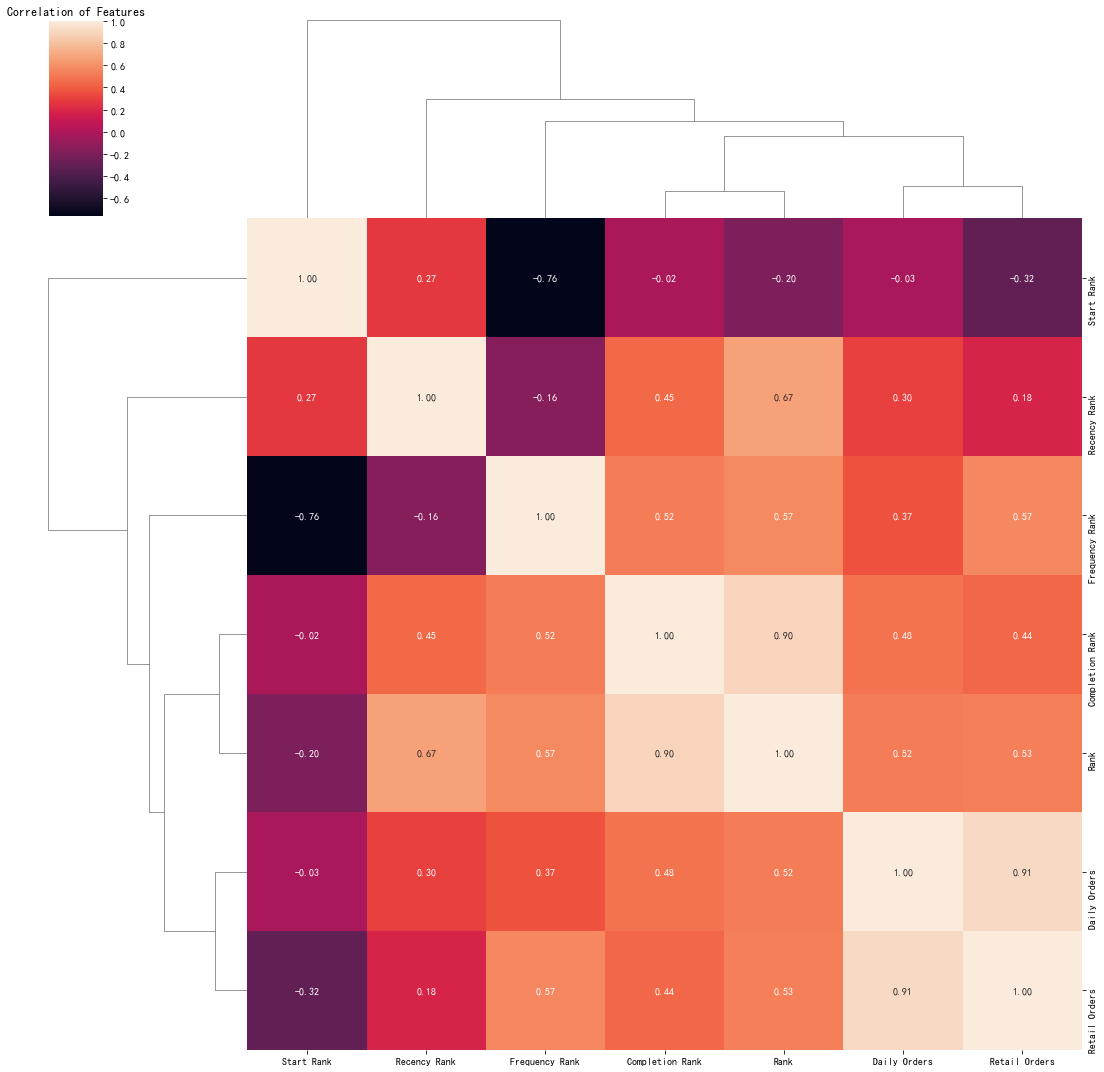

In [203]:
col_list = ['Recency Rank',	'Frequency Rank', 'Completion Rank', 'Start Rank', 'Rank', 'Daily Orders', 'Retail Orders']
corr_matrix = CC_RO_df[col_list].corr()
sns.clustermap(corr_matrix, annot=True, fmt=".2f", figsize = (15,15));
plt.title("Correlation of Features")

In [138]:
CC_RO_df.to_csv(r'Correlation\CC_RO_df.csv')

In [139]:
plot_r(CC_RO_df, 'Course Completion vs Retail Orders', 'Course Completion', 'Retail Orders', 'Course Completion vs Retail Orders')

In [140]:
plot_r(CC_RO_df, 'Course Completion vs Daily Orders', 'Course Completion', 'Daily Orders', 'Course Completion vs Daily Orders')

### 计算Retail Orders和Course Post-Test Score的相关性
1. 按OR_AFTER_SD_SALE_COUNT_df.FederationIdentifier和assessment_df.USER CODE内联得到CPT_RO_df
2. 输出结果CPT_RO_df
3. plot_r函数输出相关性图片并保存

In [141]:
CPT_RO_df = OR_AFTER_SD_SALE_COUNT_df.merge(assessment_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CPT_RO_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CPT_RO_df.head()

MARKET DEALER CODE                     DEALER FederationIdentifier  \
0     AU     6AU2088          Volvo Cars Mosman             B-AMBRO3   
1     AU     6AU4008  Volvo Cars Brisbane North             B-GUNNI1   
2     AU     6AU3206       Volvo Cars Melbourne             D-DIMAR1   
3     AU     6AU3206       Volvo Cars Melbourne             D-TAYL12   
4     AU     6AU3107       Volvo Cars Doncaster              D-ZERBI   

   Retail Orders Min Opportunity Time START DATE Max Order Time  Daily Orders  \
0            114  2021-05-26 23:33:57 2021-03-15     2022-08-07      0.260274   
1            264  2021-02-06 03:46:07 2019-08-09     2022-08-25      0.467257   
2            170  2021-07-20 00:46:16 2019-07-19     2022-08-13      0.437018   
3            177  2021-06-09 02:18:16 2019-07-04     2022-08-25      0.400452   
4            116  2021-05-11 07:28:38 2020-02-10     2022-10-31      0.215613   

    MARKET_y  ...   LAST NAME FIRST NAME USER CODE    TYPE  \
0  AUSTRALIA  ...     Ambrose        Ben  B-AMBRO3  Course   
1  AUSTRALIA  ...      Gunnis       Bill  B-GUNNI1  Course   
2  AUSTRALIA  ...  Di Martino    Domenic  D-DIMAR1  Course   
3  AUSTRALIA  ...      Taylor     Daniel  D-TAYL12  Course   
4  AUSTRALIA  ...       Zerbi    Domenic   D-ZERBI  Course   

                                            QUIZ     TYPE.1  \
0  VCC5044: Model year changes MY23 - assessment  POST_TEST   
1  VCC5044: Model year changes MY23 - assessment  POST_TEST   
2  VCC5044: Model year changes MY23 - assessment  POST_TEST   
3  VCC5044: Model year changes MY23 - assessment  POST_TEST   
4  VCC5044: Model year changes MY23 - assessment  POST_TEST   

  Course Post-Test Score                    STATUS                 DATE  \
0                  82.35                    PASSED  16/07/2022 04:34:06   
1                  70.59  KNOWLEDGE GAP IDENTIFIED  29/07/2022 06:47:50   
2                  82.35                    PASSED  25/07/2022 06:51:28   
3                  82.35                    PASSED  25/07/2022 06:53:50   
4                  82.35                    PASSED  26/04/2022 02:51:56   

  ELAPSED TIME  
0        138.0  
1        108.0  
2         35.0  
3         50.0  
4        267.0  

[5 rows x 24 columns]

In [142]:
CPT_RO_df.to_csv(r'Correlation\CPT_RO_df.csv')

In [143]:
plot_r(CPT_RO_df, 'Course Post-Test Score vs Retail Orders', 'Course Post-Test Score', 'Retail Orders', 'Course Post-Test Score vs Retail Orders')

### 计算Retail Orders和Sales Learning Programme Completion的相关性
1. 按OR_AFTER_SD_SALE_COUNT_df.FederationIdentifier和complement_df.CDSID内联得到SLPC_RO_df
2. 输出结果SLPC_RO_df
3. plot_r函数输出相关性图片并保存

In [144]:
SLPC_RO_df = OR_AFTER_SD_SALE_COUNT_df.merge(complement_df, left_on=['FederationIdentifier'], right_on=['CDSID'], how='inner')
SLPC_RO_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
SLPC_RO_df.head()

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0     IN     6IN6060               Central Volvo             A-ARORA2   
1     IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2     AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3     AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
4     IN     6IN6054                 Speed Volvo             A-KAPOOR   

   Retail Orders Min Opportunity Time START DATE_x Max Order Time  \
0             24  2020-10-26 00:00:00   2019-08-06     2022-07-29   
1             11  2022-02-11 08:33:08   2022-01-18     2022-08-25   
2             61  2021-09-21 03:34:51   2021-08-25     2022-08-15   
3            150  2021-04-27 22:47:34   2020-03-12     2022-08-20   
4             23  2021-01-29 10:24:12   2019-06-20     2022-08-02   

   Daily Orders   MARKET_y  ... Frequency Recency Rank Frequency Rank  \
0      0.037383      INDIA  ...  0.020909     0.038647       0.681159   
1      0.056410      INDIA  ...  0.117347     0.227053       0.275362   
2      0.185976  AUSTRALIA  ...  0.095436     0.792271       0.347826   
3      0.312500  AUSTRALIA  ...  0.008685     0.560386       0.917874   
4      0.041818      INDIA  ...  0.020158     0.159420       0.714976   

   Completion Rank  Start Rank      Rank Recency Binary  Frequency Binary  \
0         0.202703    0.178744  0.270531              1                 0   
1         0.202703    0.729469  0.173913              1                 1   
2         0.202703    0.589372  0.449275              0                 1   
3         0.711712    0.299517  0.864734              0                 0   
4         0.202703    0.062802  0.309179              1                 0   

   Completion Binary  Sales Learning Programme Completion(%)  
0                  0                                   76.67  
1                  1                                   76.67  
2                  1                                   76.67  
3                  0                                   23.33  
4                  0                                   76.67  

[5 rows x 28 columns]

In [145]:
plot_r(SLPC_RO_df, 'Sales Learning Programme Completion(%) vs Retail Orders', 'Sales Learning Programme Completion(%)', 'Retail Orders', 'Sales Learning Programme Completion(%) vs Retail Orders')

## 计算Opportunities to Test Drives Rate(%)
1. TD_AFTER_SD_SALE_COUNT_df和OP_AFTER_SD_SALE_COUNT_df内联得到OP_TD_AFTER_SD_SALE_df
2. Opportunities to Test Drive Rate(%) = Test Drives / Opportunities * 100%

In [200]:
OP_TD_AFTER_SD_SALE_df = TD_AFTER_SD_SALE_COUNT_df.merge(OP_AFTER_SD_SALE_COUNT_df, left_on=['MARKET', 'DEALER CODE', 'DEALER', 'FederationIdentifier'], right_on=['MARKET', 'DEALER CODE', 'DEALER', 'FederationIdentifier'], how='inner')
OP_TD_AFTER_SD_SALE_df['Opportunities to Test Drive Rate(%)'] = round(OP_TD_AFTER_SD_SALE_df['Test Drives'] / OP_TD_AFTER_SD_SALE_df['Opportunities'] * 100, 2)
OP_TD_AFTER_SD_SALE_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      IN     6IN6060               Central Volvo             A-ARORA2   
1      IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2      AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
3      IN     6IN6054                 Speed Volvo             A-KAPOOR   
4      IN     6IN6061                   SPL Volvo               A-SAHA   
..    ...         ...                         ...                  ...   
92     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
93     IN     6IN6045              Martial Motors                 V-MP   
94     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
95     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
96     IN     6IN6045              Martial Motors                  Y-A   

    Test Drives Min Opportunity Time_x START DATE_x Max Test Drive Time  \
0           133    2020-11-23 00:00:00   2019-08-06 2022-08-10 08:28:18   
1            76    2022-01-25 09:18:41   2022-01-18 2022-08-18 06:24:07   
2           130    2021-10-23 00:56:04   2020-03-12 2022-08-18 23:04:35   
3            90    2020-12-12 09:35:52   2019-06-20 2022-08-25 08:10:02   
4           228    2020-12-16 06:10:17   2019-07-01 2022-08-05 10:40:53   
..          ...                    ...          ...                 ...   
92          315    2021-03-13 11:30:40   2021-03-11 2022-08-26 06:59:44   
93          164    2022-02-03 08:57:04   2022-01-19 2022-08-22 12:04:14   
94          188    2021-02-05 07:10:14   2020-03-11 2022-08-13 06:54:57   
95          112    2021-12-22 23:29:34   2021-12-21 2022-08-18 03:39:42   
96          180    2022-01-31 06:50:11   2022-01-22 2022-08-23 03:35:53   

    Daily Test Drives  Opportunities Min Opportunity Time_y START DATE_y  \
0            0.212460            212    2020-10-17 00:00:00   2019-08-06   
1            0.370732            101    2022-01-25 09:18:41   2022-01-18   
2            0.433333            382    2021-03-28 00:00:00   2020-03-12   
3            0.144928            109    2020-10-25 00:00:00   2019-06-20   
4            0.381271            411    2020-10-21 00:00:00   2019-07-01   
..                ...            ...                    ...          ...   
92           0.593220            327    2021-03-13 11:30:40   2021-03-11   
93           0.815920            181    2022-01-31 06:37:31   2022-01-19   
94           0.339350            636    2021-02-01 06:34:03   2020-03-11   
95           0.468619            211    2021-12-22 23:29:34   2021-12-21   
96           0.882353            223    2022-01-24 07:06:46   2022-01-22   

   Max Opportunity Time  Daily Opportunities  \
0   2022-08-16 05:53:38             0.316891   
1   2022-08-18 06:24:04             0.492683   
2   2022-08-18 23:04:33             0.750491   
3   2022-08-10 12:08:29             0.166412   
4   2022-08-14 05:46:39             0.619910   
..                  ...                  ...   
92  2022-08-26 06:59:14             0.615819   
93  2022-08-19 10:50:20             0.900498   
94  2022-08-18 04:42:49             1.129663   
95  2022-08-18 03:39:37             0.882845   
96  2022-08-19 14:21:26             1.072115   

    Opportunities to Test Drive Rate(%)  
0                                 62.74  
1                                 75.25  
2                                 34.03  
3                                 82.57  
4                                 55.47  
..                                  ...  
92                                96.33  
93                                90.61  
94                                29.56  
95                                53.08  
96                                80.72  

[97 rows x 15 columns]

In [201]:
OP_TD_BEFORE_SD_SALE_df = TD_BEFORE_SD_SALE_COUNT_df.merge(OP_BEFORE_SD_SALE_COUNT_df, left_on=['MARKET', 'DEALER CODE', 'DEALER', 'FederationIdentifier'], right_on=['MARKET', 'DEALER CODE', 'DEALER', 'FederationIdentifier'], how='inner')
OP_TD_BEFORE_SD_SALE_df['Opportunities to Test Drive Rate(%)'] = round(OP_TD_BEFORE_SD_SALE_df['Test Drives'] / OP_TD_BEFORE_SD_SALE_df['Opportunities'] * 100, 2)
OP_TD_BEFORE_SD_SALE_df

MARKET DEALER CODE                        DEALER FederationIdentifier  \
0      IN     6IN6043    Swede Auto Private Limited             A-BISHT1   
1      IN     6IN6059    KNS Vinayak Auto Pvt. Ltd.             A-SHARM8   
2      IN     6IN6038           Kerala Volvo, Kochi                 A-VV   
3      IN     6IN6071                 Krishna Volvo             C-KUMAR1   
4      IN     6IN6045                Martial Motors                 D-AG   
5      IN     6IN6049          KIFS Motors, Andheri             D-CHADHA   
6      IN     6IN6054                   Speed Volvo             D-DWIVED   
7      IN     6IN6045                Martial Motors             D-SUNDER   
8      IN     6IN6073  Volvo Tamil Nadu(Coimbatore)                H-SB1   
9      IN     6IN6072     Volvo Tamil nadu(Chennai)                H-SB1   
10     AU     6AU4213         Volvo Cars Gold Coast             J-FERGU3   
11     IN     6IN6056                    Flyga Auto             J-SHARMA   
12     IN    6IN60441               Autobots, Surat             K-AGHERA   
13     IN     6IN6057                 Scandia Volvo             K-KHARBA   
14     IN     6IN6044           Autobots, Ahmedabad             M-GAJJA1   
15     IN     6IN6072     Volvo Tamil nadu(Chennai)                  M-S   
16     IN     6IN6072     Volvo Tamil nadu(Chennai)             N-KOTTE1   
17     IN     6IN6058        Krishna Auto, Ludhiana              N-VERMA   
18     IN     6IN6044           Autobots, Ahmedabad             P-CHAUDH   
19     IN     6IN6056                    Flyga Auto             P-SALOKH   
20     IN     6IN6038           Kerala Volvo, Kochi             R-ABRAHA   
21     IN    6IN60441               Autobots, Surat             R-CONTRA   
22     IN     6IN6045                Martial Motors                 R-DR   
23     IN     6IN6057                 Scandia Volvo             R-KUMAR6   
24     IN     6IN6071                 Krishna Volvo                  S-K   
25     IN     6IN6071                 Krishna Volvo             S-REDDYP   
26     IN     6IN6071                 Krishna Volvo             S-RIYAZA   
27     IN     6IN6054                   Speed Volvo             S-SHAMIM   
28     IN     6IN6044           Autobots, Ahmedabad             S-SHARMA   
29     IN     6IN6054                   Speed Volvo             T-BHATIA   
30     IN     6IN6059    KNS Vinayak Auto Pvt. Ltd.             T-SINGH2   
31     IN     6IN6045                Martial Motors                  U-L   
32     IN     6IN6038           Kerala Volvo, Kochi                  U-R   
33     IN     6IN6043    Swede Auto Private Limited             V-BARRY1   
34     IN     6IN6044           Autobots, Ahmedabad             V-DUDANI   
35     IN   6IN6049S2       KIFS Motors, Prabhadevi             V-KHATRI   
36     IN     6IN6045                Martial Motors                 V-MP   
37     IN     6IN6045                Martial Motors                  Y-A   

    Test Drives Min Opportunity Time_x START DATE_x Max Test Drive Time  \
0            50    2021-01-09 11:05:40   2022-01-18 2022-01-13 06:52:29   
1            43    2020-12-11 10:37:29   2021-08-23 2021-08-09 12:26:28   
2            51    2021-11-18 04:12:01   2022-03-05 2022-02-22 10:41:07   
3            52    2021-01-13 06:10:06   2021-08-28 2021-08-20 11:34:41   
4           117    2020-11-07 00:00:00   2022-01-17 2022-01-17 08:18:22   
5            41    2020-12-10 09:09:47   2021-03-10 2021-03-08 10:36:36   
6           108    2020-12-12 05:08:23   2022-01-17 2022-01-14 10:13:01   
7            79    2021-01-19 09:47:08   2022-01-20 2022-01-17 08:26:15   
8            21    2021-10-12 04:51:28   2022-01-18 2022-01-10 05:26:41   
9            21    2021-01-06 09:40:24   2022-01-18 2021-10-20 13:25:33   
10           12    2021-04-17 07:12:48   2021-08-26 2021-08-24 07:03:52   
11           85    2020-12-19 12:50:28   2022-01-21 2022-01-11 12:29:43   
12           60    2021-01-23 13:49:58   2022-02-09 2021-08-28 

### 按Dealer维度统计Test Drives标准差
1. 按照MARKET, DEALER CODE, DEALER分组计算Test Drives的标准差
2. 按照DEALER排序输出结果SD_TD_D_df

In [148]:
SD_TD_D = OP_TD_AFTER_SD_SALE_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Test Drives'].std().round(2)
SD_TD_D.rename('SD_TD_D', inplace=True)
SD_TD_D_df = SD_TD_D.reset_index()
# SD_OP_D_df.rename(columns={'vccmarket__c':'MARKET', 'partnerid__c':'DEALER CODE', 'name__c':'DEALER'}, inplace=True)
SD_TD_D_df.sort_values('DEALER', inplace=True)
SD_TD_D_df

MARKET DEALER CODE                         DEALER  SD_TD_D
23     IN     6IN6044            Autobots, Ahmedabad    22.34
24     IN    6IN60441                Autobots, Surat      NaN
34     IN     6IN6060                  Central Volvo      NaN
30     IN     6IN6056                     Flyga Auto    29.70
27     IN     6IN6049           KIFS Motors, Andheri   118.79
28     IN   6IN6049S2        KIFS Motors, Prabhadevi    48.79
33     IN     6IN6059     KNS Vinayak Auto Pvt. Ltd.      NaN
20     IN    6IN60381          Kerala Volvo, Calicut      NaN
19     IN     6IN6038            Kerala Volvo, Kochi    42.26
26     IN     6IN6048       Krishna Auto, Chandigarh    11.00
32     IN     6IN6058         Krishna Auto, Ludhiana    18.38
36     IN     6IN6071                  Krishna Volvo    36.92
25     IN     6IN6045                 Martial Motors    53.61
39     IN     6IN6075                Rajasthan Volvo      NaN
35     IN     6IN6061                      SPL Volvo    85.33
31     IN     6IN6057                  Scandia Volvo    78.44
29     IN     6IN6054                    Speed Volvo    22.22
21     IN     6IN6043     Swede Auto Private Limited    23.08
22     IN    6IN60431                  Viking Motors    28.18
12     AU     6AU3187            Volvo Cars Brighton      NaN
14     AU     6AU4008      Volvo Cars Brisbane North   118.79
8      AU     6AU2605            Volvo Cars Canberra      NaN
5      AU     6AU2251       Volvo Cars Central Coast      NaN
10     AU     6AU3107           Volvo Cars Doncaster    22.74
15     AU     6AU4213          Volvo Cars Gold Coast      NaN
17     AU     6AU7004              Volvo Cars Hobart      NaN
18     AU     6AU7254          Volvo Cars Launceston    12.73
1      AU     6AU2068           Volvo Cars Lindfield    43.13
4      AU     6AU2173           Volvo Cars Liverpool      NaN
13     AU     6AU3206           Volvo Cars Melbourne    15.13
2      AU     6AU2088              Volvo Cars Mosman      NaN
3      AU     6AU2156          Volvo Cars Parramatta     3.54
9      AU     6AU2754             Volvo Cars Penrith     9.90
16     AU     6AU6017               Volvo Cars Perth      NaN
0      AU     6AU2014     Volvo Cars Rushcutters Bay    41.01
11     AU     6AU3112         Volvo Cars South Yarra    30.75
7      AU     6AU2581  Volvo Cars Southern Highlands     7.07
6      AU     6AU2342            Volvo Cars Tamworth      NaN
38     IN     6IN6073   Volvo Tamil Nadu(Coimbatore)    79.20
37     IN     6IN6072      Volvo Tamil nadu(Chennai)    57.40

In [149]:
# batch_plot_std(OP_TD_AFTER_SD_SALE_df, 'Test Drives', 'Dealer')

### 按Market维度统计Test Drives标准差
1. 按照MARKET分组计算Test Drives的标准差
2. 按照MARKET排序输出结果SD_TD_M_df

In [150]:
SD_TD_M = OP_TD_AFTER_SD_SALE_df.groupby(['MARKET'])['Test Drives'].std().round(2)
SD_TD_M.rename('SD_TD_M', inplace=True)
SD_TD_M_df = SD_TD_M.reset_index()
# SD_OP_D_df.rename(columns={'vccmarket__c':'MARKET', 'partnerid__c':'DEALER CODE', 'name__c':'DEALER'}, inplace=True)
SD_TD_M_df.sort_values('MARKET', inplace=True)
SD_TD_M_df

MARKET  SD_TD_M
0     AU    77.15
1     IN    89.95

In [151]:
# batch_plot_std(OP_TD_AFTER_SD_SALE_df, 'Test Drives', 'Market')

### 计算Opportunities to Test Drives Rate(%)和Course Rating的相关性
1. 按OP_TD_AFTER_SD_SALE_df.FederationIdentifier和course_rating_df.USER CODE内联得到CR_OPTDR_df
2. 输出结果CR_OPTDR_df
3. plot_r函数输出相关性图片并保存

In [152]:
CR_OPTDR_df = OP_TD_AFTER_SD_SALE_df.merge(course_rating_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CR_OPTDR_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CR_OPTDR_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      IN     6IN6060               Central Volvo             A-ARORA2   
1      IN     6IN6054                 Speed Volvo             A-KAPOOR   
2      IN     6IN6048    Krishna Auto, Chandigarh             A-SHARM3   
3      IN     6IN6071               Krishna Volvo             C-KUMAR1   
4      IN     6IN6071               Krishna Volvo               E-PAUL   
5      IN     6IN6043  Swede Auto Private Limited             G-CHAWLA   
6      IN     6IN6072   Volvo Tamil nadu(Chennai)             G-RAGHUN   
7      IN     6IN6038         Kerala Volvo, Kochi             J-BRITTO   
8      IN     6IN6057               Scandia Volvo             M-KAUSHI   
9      IN     6IN6072   Volvo Tamil nadu(Chennai)                  M-S   
10     IN     6IN6058      Krishna Auto, Ludhiana              N-VERMA   
11     IN     6IN6043  Swede Auto Private Limited             P-CHOUDH   
12     IN     6IN6038         Kerala Volvo, Kochi             P-SREEDH   
13     IN     6IN6038         Kerala Volvo, Kochi             R-ABRAHA   
14     IN     6IN6071               Krishna Volvo                R-ALI   
15     IN     6IN6075             Rajasthan Volvo             S-BIDSER   
16     IN     6IN6061                   SPL Volvo               S-DAS4   
17     IN    6IN60431               Viking Motors             S-GUPTA6   
18     IN     6IN6071               Krishna Volvo             S-REDDYP   
19     IN     6IN6071               Krishna Volvo             S-RIYAZA   
20     IN     6IN6057               Scandia Volvo             S-SING11   
21     IN     6IN6071               Krishna Volvo             S-SINGH2   
22     IN     6IN6054                 Speed Volvo             T-BHATIA   
23     IN     6IN6038         Kerala Volvo, Kochi                  U-R   
24     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
25     IN     6IN6045              Martial Motors                 V-MP   

    Test Drives Min Opportunity Time_x START DATE_x Max Test Drive Time  \
0           133    2020-11-23 00:00:00   2019-08-06 2022-08-10 08:28:18   
1            90    2020-12-12 09:35:52   2019-06-20 2022-08-25 08:10:02   
2           139    2021-01-15 04:53:55   2019-07-16 2022-08-17 06:28:17   
3           180    2021-08-30 08:07:05   2021-08-28 2022-08-19 11:37:51   
4           198    2020-12-21 04:30:48   2019-06-20 2022-08-19 11:46:28   
5           120    2020-12-12 11:45:38   2019-05-22 2022-08-17 06:51:52   
6           173    2021-06-25 05:22:37   2021-05-21 2022-08-18 11:55:16   
7           204    2020-12-11 11:16:30   2019-08-01 2022-08-26 12:57:47   
8           321    2020-12-11 12:04:21   2019-08-02 2022-08-23 07:09:52   
9           134    2022-01-30 11:42:52   2022-01-26 2022-08-19 14:15:10   
10           33    2022-02-10 06:54:18   2022-01-19 2022-08-22 04:50:58   
11           98    2020-12-11 05:57:12   2019-08-12 2022-08-14 11:59:43   
12          154    2020-12-18 05:45:40   2019-10-19 2022-08-13 12:51:06   
13          122    2021-07-29 07:22:47   2021-07-22 2022-08-19 05:35:27   
14          254    2020-12-02 00:00:00   2019-06-20 2022-08-18 07:00:28   
15           34    2022-01-24 08:32:16   2022-01-19 2022-08-14 10:14:43   
16          326    2020-12-18 06:58:32   2019-08-02 2022-08-17 11:22:10   
17          131    2020-12-13 05:36:29   2020-02-11 2022-08-21 08:02:01   
18          233    2021-07-08 09:36:23   2021-07-06 2022-08-24 04:50:59   
19          171    2021-08-30 13:37:38   2021-08-28 2022-08-17 14:02:34   
20          309    2020-09-09 00:00:00   2019-05-17 2022-08-18 08:43:03   
21          254    2020-12-04 00:00:00   2019-06-20 2022-08-18 13:45:00   
22           85    2022-01-21 09:23:23   2022-01-19 2022-08-18 05:05:29   
23          161    2021-09-17 12:17:51   2021-09-08 2022-08-20 11:52:05   
24          315    2021-03-13 11:30:40   2021-03-11 2022-08-26 06:59:44   
25          164    2022-02-03 08:57:04   2022-01-19 20

In [153]:
plot_r(CR_OPTDR_df, 'Course Rating vs Opportunities to Test Drive Rate(%)', 'Course Rating', 'Opportunities to Test Drive Rate(%)', 'Course Rating vs Opportunities to Test Drive Rate(%)')

### 计算Opportunities to Test Drives Rate(%)和Course Completion的相关性
1. 按OP_TD_AFTER_SD_SALE_df.FederationIdentifier和complement_df.CDSID内联得到CC_OPTDR_df
2. 输出结果CC_OPTDR_df
3. plot_r函数输出相关性图片并保存

In [202]:
CC_OPTDR_df = OP_TD_AFTER_SD_SALE_df.merge(complement_df, left_on=['FederationIdentifier'], right_on=['CDSID'], how='inner')
CC_OPTDR_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CC_OPTDR_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      IN     6IN6060               Central Volvo             A-ARORA2   
1      IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2      AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
3      IN     6IN6054                 Speed Volvo             A-KAPOOR   
4      IN     6IN6061                   SPL Volvo               A-SAHA   
..    ...         ...                         ...                  ...   
92     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
93     IN     6IN6045              Martial Motors                 V-MP   
94     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
95     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
96     IN     6IN6045              Martial Motors                  Y-A   

    Test Drives Min Opportunity Time_x START DATE_x Max Test Drive Time  \
0           133    2020-11-23 00:00:00   2019-08-06 2022-08-10 08:28:18   
1            76    2022-01-25 09:18:41   2022-01-18 2022-08-18 06:24:07   
2           130    2021-10-23 00:56:04   2020-03-12 2022-08-18 23:04:35   
3            90    2020-12-12 09:35:52   2019-06-20 2022-08-25 08:10:02   
4           228    2020-12-16 06:10:17   2019-07-01 2022-08-05 10:40:53   
..          ...                    ...          ...                 ...   
92          315    2021-03-13 11:30:40   2021-03-11 2022-08-26 06:59:44   
93          164    2022-02-03 08:57:04   2022-01-19 2022-08-22 12:04:14   
94          188    2021-02-05 07:10:14   2020-03-11 2022-08-13 06:54:57   
95          112    2021-12-22 23:29:34   2021-12-21 2022-08-18 03:39:42   
96          180    2022-01-31 06:50:11   2022-01-22 2022-08-23 03:35:53   

    Daily Test Drives  Opportunities  ... Frequency Recency Rank  \
0            0.212460            212  ...  0.020909          8.0   
1            0.370732            101  ...  0.117347         47.0   
2            0.433333            382  ...  0.008685        116.0   
3            0.144928            109  ...  0.020158         33.0   
4            0.381271            411  ...  0.020390         47.0   
..                ...            ...  ...       ...          ...   
92           0.593220            327  ...  0.044487          8.0   
93           0.815920            181  ...  1.466667        188.0   
94           0.339350            636  ...  0.009206         69.0   
95           0.468619            211  ...  0.056452        161.0   
96           0.882353            223  ...  2.200000        193.0   

   Frequency Rank  Completion Rank  Start Rank   Rank Recency Binary  \
0           141.0             45.0        37.0   55.0              1   
1            57.0             45.0       151.0   37.0              1   
2           190.0            158.0        62.0  179.0              0   
3           148.0             45.0        13.0   63.0              1   
4           146.0             45.0        19.0   74.0              1   
..            ...              ...         ...    ...            ...   
92          101.0             45.0        86.0   41.0              1   
93           18.0             79.0       155.0   94.0              0   
94          186.0            143.0        60.0  148.0              1   
95           95.0            158.0       140.0  159.0              0   
96            9.0             79.0       164.0   88.0              0   

   Frequency Binary Completion Binary  Sales Learning Programme Completion(%)  
0                 0                 0                                   76.67  
1                 1                 1                                   76.67  
2                 0                 0                                   23.33  
3                 0                 0                                   76.67  
4                 0                 0                                   76.67  
..              ...               ...              

Text(0.5, 1.0, 'Correlation of Features')

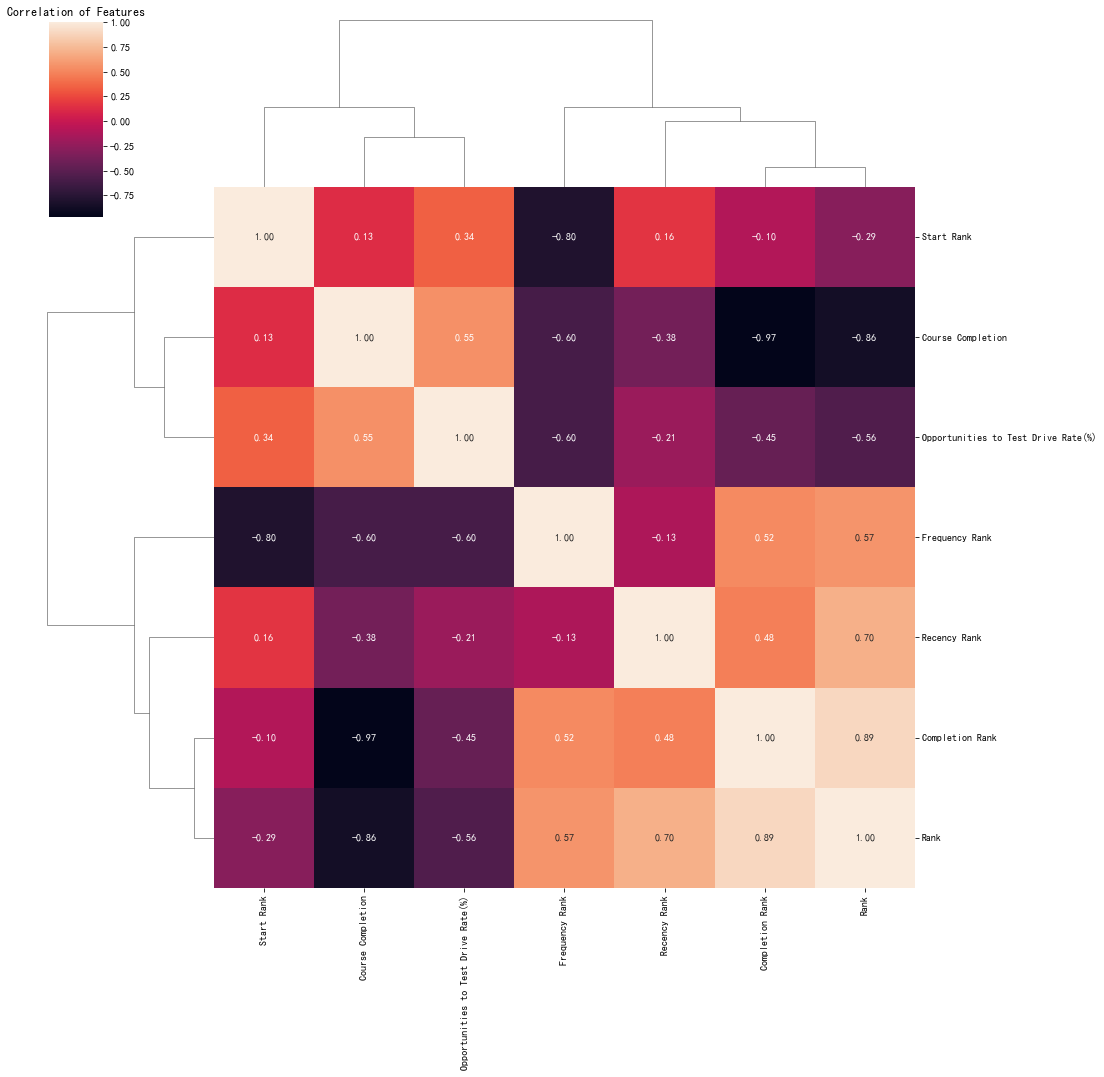

In [206]:
col_list = ['Recency Rank',	'Frequency Rank', 'Completion Rank', 'Course Completion', 'Start Rank', 'Rank', 'Opportunities to Test Drive Rate(%)']
corr_matrix = CC_OPTDR_df[col_list].corr()
sns.clustermap(corr_matrix, annot=True, fmt=".2f", figsize = (15,15));
plt.title("Correlation of Features")

In [216]:
plot_r(CC_OPTDR_df, 'Frequency Rank vs Opportunities to Test Drive Rate(%)', 'Frequency Rank', 'Opportunities to Test Drive Rate(%)', 'Frequency Rank vs Opportunities to Test Drive Rate(%)')

In [214]:
plot_r(CC_OPTDR_df, 'Course Completion vs Opportunities to Test Drive Rate(%)', 'Course Completion', 'Opportunities to Test Drive Rate(%)', 'Course Completion vs Opportunities to Test Drive Rate(%)')

In [156]:
plot_r(CC_OPTDR_df, 'Start Rank vs Opportunities to Test Drive Rate(%)', 'Start Rank', 'Opportunities to Test Drive Rate(%)', 'Start Rank vs Opportunities to Test Drive Rate(%)')

### 计算Opportunities to Test Drives Rate(%)和Course Post-Test Score的相关性
1. 按OP_TD_AFTER_SD_SALE_df.FederationIdentifier和assessment_df.USER CODE内联得到CPT_OPTDR_df
2. 输出结果CPT_OPTDR_df
3. plot_r函数输出相关性图片并保存

In [157]:
CPT_OPTDR_df = OP_TD_AFTER_SD_SALE_df.merge(assessment_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CPT_OPTDR_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CPT_OPTDR_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      AU     6AU2088           Volvo Cars Mosman             B-AMBRO3   
1      AU     6AU4008   Volvo Cars Brisbane North             B-GUNNI1   
2      AU     6AU3206        Volvo Cars Melbourne             D-DIMAR1   
3      AU     6AU3206        Volvo Cars Melbourne             D-TAYL12   
4      AU     6AU3107        Volvo Cars Doncaster              D-ZERBI   
5      AU     6AU3107        Volvo Cars Doncaster               E-CHOW   
6      AU     6AU2014  Volvo Cars Rushcutters Bay              F-MILLS   
7      AU     6AU3112      Volvo Cars South Yarra             J-DAWSO1   
8      AU     6AU4213       Volvo Cars Gold Coast             J-FERGU3   
9      AU     6AU2014  Volvo Cars Rushcutters Bay               J-MA36   
10     AU     6AU7254       Volvo Cars Launceston             J-PEARC2   
11     AU     6AU2156       Volvo Cars Parramatta             L-LARKI1   
12     AU     6AU3112      Volvo Cars South Yarra             M-CHRAP1   
13     AU     6AU7254       Volvo Cars Launceston              M-DEAN1   
14     AU     6AU3112      Volvo Cars South Yarra             M-MOOR12   
15     AU     6AU3107        Volvo Cars Doncaster              O-SMITH   
16     AU     6AU3206        Volvo Cars Melbourne             S-AGRAWA   
17     AU     6AU2605         Volvo Cars Canberra             S-COLLI2   
18     AU     6AU2068        Volvo Cars Lindfield             T-BEAUMO   
19     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
20     AU     6AU3187         Volvo Cars Brighton              W-WONG5   

    Test Drives Min Opportunity Time_x START DATE_x Max Test Drive Time  \
0            23    2021-11-22 00:00:36   2021-03-15 2022-07-02 05:43:10   
1           356    2021-02-02 01:59:54   2019-08-09 2022-08-26 03:19:03   
2            87    2021-08-12 03:48:52   2019-07-19 2022-08-15 02:40:31   
3            58    2021-11-20 04:50:42   2019-07-04 2022-08-07 23:48:03   
4            72    2021-09-17 07:45:34   2020-02-10 2022-08-19 02:52:01   
5            28    2022-02-21 04:33:51   2021-07-26 2022-07-23 07:54:53   
6           124    2021-10-22 22:00:44   2020-08-22 2022-08-16 04:59:31   
7            49    2021-04-07 02:01:15   2020-01-28 2022-08-15 00:25:02   
8            52    2021-09-10 01:33:14   2021-08-26 2022-07-27 00:21:00   
9            66    2022-01-08 05:27:01   2020-03-21 2022-08-20 01:28:36   
10           51    2021-10-21 06:14:12   2021-06-28 2022-08-15 02:33:00   
11           55    2022-01-12 01:07:30   2020-03-12 2022-08-15 06:53:24   
12           55    2022-03-21 04:27:59   2021-07-16 2022-08-12 02:02:05   
13           33    2021-04-08 07:16:16   2020-10-15 2022-08-02 06:45:57   
14          105    2021-11-11 05:32:52   2021-07-28 2022-08-15 05:39:13   
15           60    2021-09-10 05:57:21   2021-03-12 2022-08-12 04:53:42   
16           80    2021-12-01 23:29:28   2019-07-08 2022-08-18 03:43:25   
17          209    2021-07-20 01:18:04   2020-09-29 2022-08-19 07:07:57   
18           69    2021-10-05 07:47:26   2020-12-17 2022-08-20 05:02:28   
19          188    2021-02-05 07:10:14   2020-03-11 2022-08-13 06:54:57   
20          112    2021-12-22 23:29:34   2021-12-21 2022-08-18 03:39:42   

    Daily Test Drives  Opportunities  ...   LAST NAME FIRST NAME USER CODE  \
0            0.103139            156  ...     Ambrose        Ben  B-AMBRO3   
1            0.623468           1029  ...      Gunnis       Bill  B-GUNNI1   
2            0.236413            485  ...  Di Martino    Domenic  D-DIMAR1   
3            0.222222            356  ...      Taylor     Daniel  D-TAYL12   
4            0.214286            211  ...       Zerbi    Domenic   D-ZERBI   
5            0.183007            189  ...        Chow    Elfleda    E-CHOW   
6            0.416107            571  ...       Mills     Fraser   F-MILLS   
7            0.098990            275  ...      Dawson     justin  J-DAWSO1   
8            0.162500

In [158]:
plot_r(CPT_OPTDR_df, 'Course Post-Test Score vs Opportunities to Test Drive Rate(%)', 'Course Post-Test Score', 'Opportunities to Test Drive Rate(%)', 'Course Post-Test Score vs Opportunities to Test Drive Rate(%)')

### 计算Opportunities to Test Drives Rate(%)和Sales Learning Programme Completion的相关性
1. 按OP_TD_AFTER_SD_SALE_df.FederationIdentifier和complement_df.CDSID内联得到SLPC_OPTDR_df
2. 输出结果SLPC_OPTDR_df
3. plot_r函数输出相关性图片并保存

In [159]:
SLPC_OPTDR_df = OP_TD_AFTER_SD_SALE_df.merge(complement_df, left_on=['FederationIdentifier'], right_on=['CDSID'], how='inner')
SLPC_OPTDR_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
SLPC_OPTDR_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      IN     6IN6060               Central Volvo             A-ARORA2   
1      IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2      AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
3      IN     6IN6054                 Speed Volvo             A-KAPOOR   
4      IN     6IN6061                   SPL Volvo               A-SAHA   
..    ...         ...                         ...                  ...   
92     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
93     IN     6IN6045              Martial Motors                 V-MP   
94     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
95     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
96     IN     6IN6045              Martial Motors                  Y-A   

    Test Drives Min Opportunity Time_x START DATE_x Max Test Drive Time  \
0           133    2020-11-23 00:00:00   2019-08-06 2022-08-10 08:28:18   
1            76    2022-01-25 09:18:41   2022-01-18 2022-08-18 06:24:07   
2           130    2021-10-23 00:56:04   2020-03-12 2022-08-18 23:04:35   
3            90    2020-12-12 09:35:52   2019-06-20 2022-08-25 08:10:02   
4           228    2020-12-16 06:10:17   2019-07-01 2022-08-05 10:40:53   
..          ...                    ...          ...                 ...   
92          315    2021-03-13 11:30:40   2021-03-11 2022-08-26 06:59:44   
93          164    2022-02-03 08:57:04   2022-01-19 2022-08-22 12:04:14   
94          188    2021-02-05 07:10:14   2020-03-11 2022-08-13 06:54:57   
95          112    2021-12-22 23:29:34   2021-12-21 2022-08-18 03:39:42   
96          180    2022-01-31 06:50:11   2022-01-22 2022-08-23 03:35:53   

    Daily Test Drives  Opportunities  ... Frequency Recency Rank  \
0            0.212460            212  ...  0.020909     0.038647   
1            0.370732            101  ...  0.117347     0.227053   
2            0.433333            382  ...  0.008685     0.560386   
3            0.144928            109  ...  0.020158     0.159420   
4            0.381271            411  ...  0.020390     0.227053   
..                ...            ...  ...       ...          ...   
92           0.593220            327  ...  0.044487     0.038647   
93           0.815920            181  ...  1.466667     0.908213   
94           0.339350            636  ...  0.009206     0.333333   
95           0.468619            211  ...  0.056452     0.777778   
96           0.882353            223  ...  2.200000     0.932367   

   Frequency Rank  Completion Rank  Start Rank      Rank Recency Binary  \
0        0.681159         0.202703    0.178744  0.270531              1   
1        0.275362         0.202703    0.729469  0.173913              1   
2        0.917874         0.711712    0.299517  0.864734              0   
3        0.714976         0.202703    0.062802  0.309179              1   
4        0.705314         0.202703    0.091787  0.357488              1   
..            ...              ...         ...       ...            ...   
92       0.487923         0.202703    0.415459  0.198068              1   
93       0.086957         0.355856    0.748792  0.463768              0   
94       0.898551         0.644144    0.289855  0.719807              1   
95       0.458937         0.711712    0.676329  0.758454              0   
96       0.004831         0.355856    0.792271  0.420290              0   

   Frequency Binary Completion Binary  Sales Learning Programme Completion(%)  
0                 0                 0                                   76.67  
1                 1                 1                                   76.67  
2                 0                 0                                   23.33  
3                 0                 0                                   76.67  
4                 0                 0                                   76.67  
..             

In [160]:
plot_r(SLPC_OPTDR_df, 'Sales Learning Programme Completion(%) vs Opportunities to Test Drive Rate(%)', 'Sales Learning Programme Completion(%)', 'Opportunities to Test Drive Rate(%)', 'Sales Learning Programme Completion(%) vs Opportunities to Test Drive Rate(%)')

## 计算Opportunities to Retail Orders Rate(%)
1. OR_AFTER_SD_SALE_COUNT_df和OP_AFTER_SD_SALE_COUNT_df内联得到OP_RO_SALE_df
2. Opportunities to Retail Orders Rate(%) = Retail Orders / Opportunities * 100%

In [161]:
OP_RO_SALE_df = OR_AFTER_SD_SALE_COUNT_df.merge(OP_AFTER_SD_SALE_COUNT_df, left_on=['MARKET', 'DEALER CODE', 'DEALER', 'FederationIdentifier'], right_on=['MARKET', 'DEALER CODE', 'DEALER', 'FederationIdentifier'], how='inner')
OP_RO_SALE_df['Opportunities to Retail Orders Rate(%)'] = round(OP_RO_SALE_df['Retail Orders'] / OP_RO_SALE_df['Opportunities'] * 100, 2)
OP_RO_SALE_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      IN     6IN6060               Central Volvo             A-ARORA2   
1      IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2      AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3      AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
4      IN     6IN6054                 Speed Volvo             A-KAPOOR   
..    ...         ...                         ...                  ...   
81     IN     6IN6044         Autobots, Ahmedabad             V-DUDANI   
82     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
83     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
84     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
85     IN     6IN6045              Martial Motors                  Y-A   

    Retail Orders Min Opportunity Time_x START DATE_x Max Order Time  \
0              24    2020-10-26 00:00:00   2019-08-06     2022-07-29   
1              11    2022-02-11 08:33:08   2022-01-18     2022-08-25   
2              61    2021-09-21 03:34:51   2021-08-25     2022-08-15   
3             150    2021-04-27 22:47:34   2020-03-12     2022-08-20   
4              23    2021-01-29 10:24:12   2019-06-20     2022-08-02   
..            ...                    ...          ...            ...   
81             49    2021-10-30 12:46:20   2021-10-13     2022-08-18   
82             41    2021-03-13 11:30:40   2021-03-11     2022-08-14   
83            174    2021-02-02 07:35:27   2020-03-11     2022-08-13   
84            119    2021-12-22 23:29:34   2021-12-21     2022-08-18   
85             19    2022-01-31 06:50:11   2022-01-22     2022-08-24   

    Daily Orders  Opportunities Min Opportunity Time_y START DATE_y  \
0       0.037383            212    2020-10-17 00:00:00   2019-08-06   
1       0.056410            101    2022-01-25 09:18:41   2022-01-18   
2       0.185976            137    2021-08-26 23:15:24   2021-08-25   
3       0.312500            382    2021-03-28 00:00:00   2020-03-12   
4       0.041818            109    2020-10-25 00:00:00   2019-06-20   
..           ...            ...                    ...          ...   
81      0.167808            157    2021-10-30 12:46:20   2021-10-13   
82      0.078998            327    2021-03-13 11:30:40   2021-03-11   
83      0.312388            636    2021-02-01 06:34:03   2020-03-11   
84      0.497908            211    2021-12-22 23:29:34   2021-12-21   
85      0.092683            223    2022-01-24 07:06:46   2022-01-22   

   Max Opportunity Time  Daily Opportunities  \
0   2022-08-16 05:53:38             0.316891   
1   2022-08-18 06:24:04             0.492683   
2   2022-08-15 05:22:10             0.387006   
3   2022-08-18 23:04:33             0.750491   
4   2022-08-10 12:08:29             0.166412   
..                  ...                  ...   
81  2022-08-18 12:50:08             0.535836   
82  2022-08-26 06:59:14             0.615819   
83  2022-08-18 04:42:49             1.129663   
84  2022-08-18 03:39:37             0.882845   
85  2022-08-19 14:21:26             1.072115   

    Opportunities to Retail Orders Rate(%)  
0                                    11.32  
1                                    10.89  
2                                    44.53  
3                                    39.27  
4                                    21.10  
..                                     ...  
81                                   31.21  
82                                   12.54  
83                                   27.36  
84                                   56.40  
85                                    8.52  

[86 rows x 15 columns]

In [162]:
OP_OR_UI_df.groupby('opportunity_id').count()['order_id'].sort_values(ascending=False)

opportunity_id
0062w00000D3F1LAAV    5
0062w00000Bu5kcAAB    3
0062w00000D3T73AAF    2
0062w00000DukilAAB    2
0062w00000Bw7eiAAB    2
                     ..
0062w00000BenBvAAJ    1
0062w00000BemY0AAJ    1
0062w00000BemUwAAJ    1
0062w00000BemUIAAZ    1
0062w00000EtyVZAAZ    1
Name: order_id, Length: 8806, dtype: int64

### 按Dealer维度统计Opportunities to Retail Orders Rate(%)标准差
1. 按照MARKET, DEALER CODE, DEALER分组计算Opportunities to Retail Orders Rate(%)的标准差
2. 按照DEALER排序输出结果SD_RO_D_df

In [163]:
SD_OPROR_D = OP_RO_SALE_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Opportunities to Retail Orders Rate(%)'].std().round(2)
SD_OPROR_D.rename('SD_OPROR_D', inplace=True)
SD_OPROR_D_df = SD_OPROR_D.reset_index()
# SD_OP_D_df.rename(columns={'vccmarket__c':'MARKET', 'partnerid__c':'DEALER CODE', 'name__c':'DEALER'}, inplace=True)
SD_OPROR_D_df.sort_values('DEALER', inplace=True)
SD_OPROR_D_df

MARKET DEALER CODE                         DEALER  SD_OPROR_D
24     IN     6IN6044            Autobots, Ahmedabad        9.92
33     IN     6IN6060                  Central Volvo         NaN
30     IN     6IN6056                     Flyga Auto        3.51
27     IN     6IN6049           KIFS Motors, Andheri        1.59
28     IN   6IN6049S2        KIFS Motors, Prabhadevi        0.45
32     IN     6IN6059     KNS Vinayak Auto Pvt. Ltd.         NaN
21     IN    6IN60381          Kerala Volvo, Calicut         NaN
20     IN     6IN6038            Kerala Volvo, Kochi        2.56
26     IN     6IN6048       Krishna Auto, Chandigarh        2.06
35     IN     6IN6071                  Krishna Volvo        3.41
25     IN     6IN6045                 Martial Motors        1.03
34     IN     6IN6061                      SPL Volvo       10.33
31     IN     6IN6057                  Scandia Volvo        2.00
29     IN     6IN6054                    Speed Volvo        4.55
22     IN     6IN6043     Swede Auto Private Limited        7.31
23     IN    6IN60431                  Viking Motors        2.86
12     AU     6AU3187            Volvo Cars Brighton         NaN
15     AU     6AU4008      Volvo Cars Brisbane North        1.20
8      AU     6AU2605            Volvo Cars Canberra       15.13
5      AU     6AU2251       Volvo Cars Central Coast         NaN
10     AU     6AU3107           Volvo Cars Doncaster        9.04
14     AU     6AU3222             Volvo Cars Geelong         NaN
16     AU     6AU4213          Volvo Cars Gold Coast         NaN
18     AU     6AU7004              Volvo Cars Hobart         NaN
19     AU     6AU7254          Volvo Cars Launceston       11.09
1      AU     6AU2068           Volvo Cars Lindfield        6.12
4      AU     6AU2173           Volvo Cars Liverpool         NaN
13     AU     6AU3206           Volvo Cars Melbourne        7.52
2      AU     6AU2088              Volvo Cars Mosman         NaN
3      AU     6AU2156          Volvo Cars Parramatta       18.54
9      AU     6AU2754             Volvo Cars Penrith       41.11
17     AU     6AU6017               Volvo Cars Perth         NaN
0      AU     6AU2014     Volvo Cars Rushcutters Bay       15.63
11     AU     6AU3112         Volvo Cars South Yarra       12.51
7      AU     6AU2581  Volvo Cars Southern Highlands        1.97
6      AU     6AU2342            Volvo Cars Tamworth         NaN
36     IN     6IN6072      Volvo Tamil nadu(Chennai)        1.78

In [164]:
# batch_plot_std(OP_RO_SALE_df, 'Opportunities to Retail Orders Rate(%)', 'Dealer')

### 按Market维度统计Opportunities to Retail Orders Rate(%)标准差
1. 按照MARKET分组计算Opportunities to Retail Orders Rate(%)的标准差
2. 按照MARKET排序输出结果SD_OPROR_M_df

In [165]:
SD_OPROR_M = OP_RO_SALE_df.groupby(['MARKET'])['Opportunities to Retail Orders Rate(%)'].std().round(2)
SD_OPROR_M.rename('SD_OPROR_M', inplace=True)
SD_OPROR_M_df = SD_OPROR_M.reset_index()
# SD_OP_D_df.rename(columns={'vccmarket__c':'MARKET', 'partnerid__c':'DEALER CODE', 'name__c':'DEALER'}, inplace=True)
SD_OPROR_M_df.sort_values('MARKET', inplace=True)
SD_OPROR_M_df

MARKET  SD_OPROR_M
0     AU       16.92
1     IN        7.35

In [166]:
# batch_plot_std(OP_RO_SALE_df, 'Opportunities to Retail Orders Rate(%)', 'Market')

### 计算Opportunities to Retail Orders Rate(%)和Course Rating的相关性
1. 按OP_TD_AFTER_SD_SALE_df.FederationIdentifier和course_rating_df.USER CODE内联得到CR_OPROR_df
2. 输出结果CR_OPTDR_df
3. plot_r函数输出相关性图片并保存

In [167]:
CR_OPROR_df = OP_RO_SALE_df.merge(course_rating_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CR_OPROR_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CR_OPROR_df


MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      IN     6IN6060               Central Volvo             A-ARORA2   
1      IN     6IN6054                 Speed Volvo             A-KAPOOR   
2      IN     6IN6048    Krishna Auto, Chandigarh             A-SHARM3   
3      IN     6IN6071               Krishna Volvo             C-KUMAR1   
4      IN     6IN6071               Krishna Volvo               E-PAUL   
5      IN     6IN6043  Swede Auto Private Limited             G-CHAWLA   
6      IN     6IN6072   Volvo Tamil nadu(Chennai)             G-RAGHUN   
7      IN     6IN6038         Kerala Volvo, Kochi             J-BRITTO   
8      IN     6IN6057               Scandia Volvo             M-KAUSHI   
9      IN     6IN6072   Volvo Tamil nadu(Chennai)                  M-S   
10     IN     6IN6038         Kerala Volvo, Kochi             P-SREEDH   
11     IN     6IN6071               Krishna Volvo                R-ALI   
12     IN     6IN6061                   SPL Volvo               S-DAS4   
13     IN    6IN60431               Viking Motors             S-GUPTA6   
14     IN     6IN6071               Krishna Volvo             S-REDDYP   
15     IN     6IN6071               Krishna Volvo             S-RIYAZA   
16     IN     6IN6057               Scandia Volvo             S-SING11   
17     IN     6IN6071               Krishna Volvo             S-SINGH2   
18     IN     6IN6054                 Speed Volvo             T-BHATIA   
19     IN     6IN6038         Kerala Volvo, Kochi                  U-R   
20     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   

    Retail Orders Min Opportunity Time_x START DATE_x Max Order Time  \
0              24    2020-10-26 00:00:00   2019-08-06     2022-07-29   
1              23    2021-01-29 10:24:12   2019-06-20     2022-08-02   
2              56    2020-11-23 00:00:00   2019-07-16     2022-08-20   
3              33    2021-08-30 08:11:34   2021-08-28     2022-08-05   
4              54    2020-11-25 00:00:00   2019-06-20     2022-08-24   
5              38    2020-10-29 00:00:00   2019-05-22     2022-08-20   
6              25    2021-07-09 06:28:49   2021-05-21     2022-07-29   
7              35    2020-09-05 00:00:00   2019-08-01     2022-08-20   
8              57    2020-08-04 00:00:00   2019-08-02     2022-08-06   
9              15    2022-02-05 04:40:08   2022-01-26     2022-08-06   
10             21    2020-08-14 00:00:00   2019-10-19     2022-08-20   
11             66    2020-10-15 00:00:00   2019-06-20     2022-08-17   
12             61    2020-11-05 00:00:00   2019-08-02     2022-07-13   
13             26    2020-12-16 12:26:47   2020-02-11     2022-08-23   
14             37    2021-07-13 07:20:49   2021-07-06     2022-08-20   
15             18    2021-09-22 07:06:28   2021-08-28     2022-08-18   
16             67    2020-08-06 00:00:00   2019-05-17     2022-08-10   
17             47    2020-10-31 00:00:00   2019-06-20     2022-08-12   
18             13    2022-01-21 09:23:23   2022-01-19     2022-08-08   
19             25    2021-09-17 12:17:51   2021-09-08     2022-07-30   
20             41    2021-03-13 11:30:40   2021-03-11     2022-08-14   

    Daily Orders  Opportunities  ...      LAST NAME    FIRST NAME USER CODE  \
0       0.037383            212  ...          Arora      Abhishek  A-ARORA2   
1       0.041818            109  ...          Kapur         Arpan  A-KAPOOR   
2       0.088050            178  ...         Sharma        Ankush  A-SHARM3   
3       0.097059            266  ...  Pradeep Kumar        Chanda  C-KUMAR1   
4       0.084639            354  ...           Paul      Emmanuel    E-PAUL   
5       0.057489            179  ...         Chawla        Gaurav  G-CHAWLA   
6       0.064935            352  ...      Raghunath         Gokul  G-RAGHUN   
7       0.048951            330  ...     Britto P.G          John  J-BRITTO   
8       0.077763            487  ...        KAUSHIK        MANISH  M-KAUSHI   

In [ ]:
Frequency Rank 

In [168]:
plot_r(CR_OPROR_df, 'Course Rating vs Opportunities to Retail Orders Rate(%)', 'Course Rating', 'Opportunities to Retail Orders Rate(%)', 'Course Rating vs Opportunities to Retail Orders Rate(%)')

### 计算Opportunities to Retail Orders Rate(%)和Course Completion的相关性
1. 按OP_RO_SALE_df.FederationIdentifier和complement_df.CDSID内联得到CC_OPROR_df
2. 输出结果CC_OPROR_df
3. plot_r函数输出相关性图片并保存

In [169]:
CC_OPROR_df = OP_RO_SALE_df.merge(complement_df, left_on=['FederationIdentifier'], right_on=['CDSID'], how='inner')
CC_OPROR_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CC_OPROR_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      IN     6IN6060               Central Volvo             A-ARORA2   
1      IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2      AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3      AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
4      IN     6IN6054                 Speed Volvo             A-KAPOOR   
..    ...         ...                         ...                  ...   
81     IN     6IN6044         Autobots, Ahmedabad             V-DUDANI   
82     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
83     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
84     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
85     IN     6IN6045              Martial Motors                  Y-A   

    Retail Orders Min Opportunity Time_x START DATE_x Max Order Time  \
0              24    2020-10-26 00:00:00   2019-08-06     2022-07-29   
1              11    2022-02-11 08:33:08   2022-01-18     2022-08-25   
2              61    2021-09-21 03:34:51   2021-08-25     2022-08-15   
3             150    2021-04-27 22:47:34   2020-03-12     2022-08-20   
4              23    2021-01-29 10:24:12   2019-06-20     2022-08-02   
..            ...                    ...          ...            ...   
81             49    2021-10-30 12:46:20   2021-10-13     2022-08-18   
82             41    2021-03-13 11:30:40   2021-03-11     2022-08-14   
83            174    2021-02-02 07:35:27   2020-03-11     2022-08-13   
84            119    2021-12-22 23:29:34   2021-12-21     2022-08-18   
85             19    2022-01-31 06:50:11   2022-01-22     2022-08-24   

    Daily Orders  Opportunities  ... Frequency Recency Rank Frequency Rank  \
0       0.037383            212  ...  0.020909     0.038647       0.681159   
1       0.056410            101  ...  0.117347     0.227053       0.275362   
2       0.185976            137  ...  0.095436     0.792271       0.347826   
3       0.312500            382  ...  0.008685     0.560386       0.917874   
4       0.041818            109  ...  0.020158     0.159420       0.714976   
..           ...            ...  ...       ...          ...            ...   
81      0.167808            157  ...  2.200000     0.990338       0.004831   
82      0.078998            327  ...  0.044487     0.038647       0.487923   
83      0.312388            636  ...  0.009206     0.333333       0.898551   
84      0.497908            211  ...  0.056452     0.777778       0.458937   
85      0.092683            223  ...  2.200000     0.932367       0.004831   

    Completion Rank  Start Rank      Rank Recency Binary Frequency Binary  \
0          0.202703    0.178744  0.270531              1                0   
1          0.202703    0.729469  0.173913              1                1   
2          0.202703    0.589372  0.449275              0                1   
3          0.711712    0.299517  0.864734              0                0   
4          0.202703    0.062802  0.309179              1                0   
..              ...         ...       ...            ...              ...   
81         0.355856    0.661836  0.463768              0                1   
82         0.202703    0.415459  0.198068              1                1   
83         0.644144    0.289855  0.719807              1                0   
84         0.711712    0.676329  0.758454              0                1   
85         0.355856    0.792271  0.420290              0                1   

   Completion Binary  Sales Learning Programme Completion(%)  
0                  0                                   76.67  
1                  1                                   76.67  
2                  1                                   76.67  
3                  0                                   23.33  
4                  0                                   76.67  
..       

Text(0.5, 1.0, 'Correlation of Features')

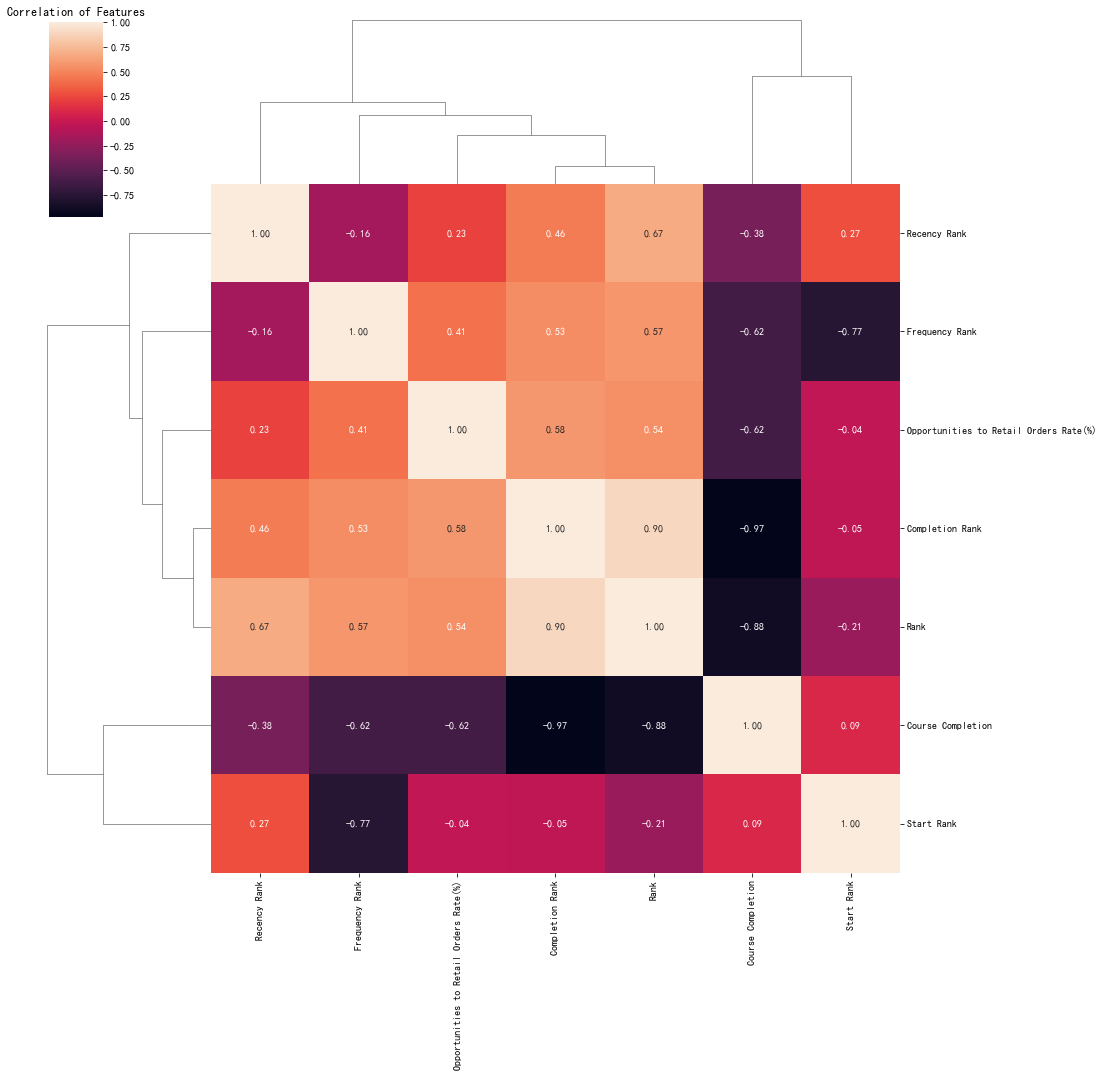

In [217]:
col_list = ['Recency Rank',	'Frequency Rank', 'Completion Rank', 'Course Completion', 'Start Rank', 'Rank', 'Opportunities to Retail Orders Rate(%)']
corr_matrix = CC_OPROR_df[col_list].corr()
sns.clustermap(corr_matrix, annot=True, fmt=".2f", figsize = (15,15));
plt.title("Correlation of Features")

In [170]:
CC_OPROR_df.to_csv(r'Correlation\CC_OPROR_df.csv')

In [220]:
plot_r(CC_OPROR_df, 'Frequency Rank vs Opportunities to Retail Orders Rate(%)', 'Frequency Rank', 'Opportunities to Retail Orders Rate(%)', 'Frequency Rank vs Opportunities to Retail Orders Rate(%)')

In [172]:
plot_r(CC_OPROR_df, 'Course Completion vs Opportunities to Retail Orders Rate(%)', 'Course Completion', 'Opportunities to Retail Orders Rate(%)', 'Course Completion vs Opportunities to Retail Orders Rate(%)')

### 计算Opportunities to Retail Orders Rate(%)和Course Post-Test Score的相关性
1. 按OP_RO_SALE_df.FederationIdentifier和assessment_df.USER CODE内联得到CPT_OPROR_df
2. 输出结果CPT_OPROR_df
3. plot_r函数输出相关性图片并保存

In [173]:
CPT_OPROR_df = OP_RO_SALE_df.merge(assessment_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CPT_OPROR_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CPT_OPROR_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      AU     6AU2088           Volvo Cars Mosman             B-AMBRO3   
1      AU     6AU4008   Volvo Cars Brisbane North             B-GUNNI1   
2      AU     6AU3206        Volvo Cars Melbourne             D-DIMAR1   
3      AU     6AU3206        Volvo Cars Melbourne             D-TAYL12   
4      AU     6AU3107        Volvo Cars Doncaster              D-ZERBI   
5      AU     6AU3107        Volvo Cars Doncaster               E-CHOW   
6      AU     6AU2014  Volvo Cars Rushcutters Bay              F-MILLS   
7      AU     6AU3112      Volvo Cars South Yarra             J-DAWSO1   
8      AU     6AU4213       Volvo Cars Gold Coast             J-FERGU3   
9      AU     6AU2014  Volvo Cars Rushcutters Bay               J-MA36   
10     AU     6AU7254       Volvo Cars Launceston             J-PEARC2   
11     AU     6AU2156       Volvo Cars Parramatta             L-LARKI1   
12     AU     6AU3112      Volvo Cars South Yarra             M-CHRAP1   
13     AU     6AU7254       Volvo Cars Launceston              M-DEAN1   
14     AU     6AU3112      Volvo Cars South Yarra             M-MOOR12   
15     AU     6AU3107        Volvo Cars Doncaster              O-SMITH   
16     AU     6AU3206        Volvo Cars Melbourne             S-AGRAWA   
17     AU     6AU2605         Volvo Cars Canberra             S-COLLI2   
18     AU     6AU2068        Volvo Cars Lindfield             T-BEAUMO   
19     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
20     AU     6AU3187         Volvo Cars Brighton              W-WONG5   

    Retail Orders Min Opportunity Time_x START DATE_x Max Order Time  \
0             114    2021-05-26 23:33:57   2021-03-15     2022-08-07   
1             264    2021-02-06 03:46:07   2019-08-09     2022-08-25   
2             170    2021-07-20 00:46:16   2019-07-19     2022-08-13   
3             177    2021-06-09 02:18:16   2019-07-04     2022-08-25   
4             116    2021-05-11 07:28:38   2020-02-10     2022-10-31   
5             102    2021-07-28 06:56:09   2021-07-26     2022-08-12   
6             188    2021-06-13 06:17:18   2020-08-22     2022-08-16   
7             140    2021-04-19 05:32:02   2020-01-28     2022-11-07   
8              85    2021-09-10 00:44:14   2021-08-26     2022-08-17   
9              93    2022-01-05 01:11:50   2020-03-21     2023-02-14   
10             47    2021-10-22 03:32:14   2021-06-28     2022-08-15   
11             71    2021-11-07 11:24:20   2020-03-12     2022-08-14   
12            188    2021-07-19 04:31:42   2021-07-16     2022-08-19   
13             62    2021-08-12 01:05:16   2020-10-15     2022-08-03   
14             90    2021-11-16 23:39:46   2021-07-28     2022-08-23   
15             87    2021-07-12 00:33:09   2021-03-12     2022-08-12   
16            174    2021-08-03 07:54:36   2019-07-08     2022-08-20   
17            139    2021-07-27 00:30:33   2020-09-29     2022-09-30   
18            162    2021-03-19 01:16:31   2020-12-17     2022-08-22   
19            174    2021-02-02 07:35:27   2020-03-11     2022-08-13   
20            119    2021-12-22 23:29:34   2021-12-21     2022-08-18   

    Daily Orders  Opportunities  ...   LAST NAME FIRST NAME USER CODE    TYPE  \
0       0.260274            156  ...     Ambrose        Ben  B-AMBRO3  Course   
1       0.467257           1029  ...      Gunnis       Bill  B-GUNNI1  Course   
2       0.437018            485  ...  Di Martino    Domenic  D-DIMAR1  Course   
3       0.400452            356  ...      Taylor     Daniel  D-TAYL12  Course   
4       0.215613            211  ...       Zerbi    Domenic   D-ZERBI  Course   
5       0.268421            189  ...        Chow    Elfleda    E-CHOW  Course   
6       0.438228            571  ...       Mills     Fraser   F-MILLS  Course   
7       0.246914            275  ...      Dawson     justin  J-DAWSO1  Course   
8       0.249267            121  ...    Ferguson   Jonathan 

In [174]:
plot_r(CPT_OPROR_df, 'Course Post-Test Score vs Opportunities to Retail Orders Rate(%)', 'Course Post-Test Score', 'Opportunities to Retail Orders Rate(%)', 'Course Post-Test Score vs Opportunities to Retail Orders Rate(%)')

### 计算Opportunities to Retail Orders Rate(%)和Sales Learning Programme Completion的相关性
1. 按OP_RO_SALE_df.FederationIdentifier和complement_df.CDSID内联得到SLPC_OPROR_df
2. 输出结果SLPC_OPROR_df
3. plot_r函数输出相关性图片并保存

In [175]:
SLPC_OPROR_df = OP_RO_SALE_df.merge(complement_df, left_on=['FederationIdentifier'], right_on=['CDSID'], how='inner')
SLPC_OPROR_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
SLPC_OPROR_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      IN     6IN6060               Central Volvo             A-ARORA2   
1      IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2      AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3      AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
4      IN     6IN6054                 Speed Volvo             A-KAPOOR   
..    ...         ...                         ...                  ...   
81     IN     6IN6044         Autobots, Ahmedabad             V-DUDANI   
82     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
83     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
84     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
85     IN     6IN6045              Martial Motors                  Y-A   

    Retail Orders Min Opportunity Time_x START DATE_x Max Order Time  \
0              24    2020-10-26 00:00:00   2019-08-06     2022-07-29   
1              11    2022-02-11 08:33:08   2022-01-18     2022-08-25   
2              61    2021-09-21 03:34:51   2021-08-25     2022-08-15   
3             150    2021-04-27 22:47:34   2020-03-12     2022-08-20   
4              23    2021-01-29 10:24:12   2019-06-20     2022-08-02   
..            ...                    ...          ...            ...   
81             49    2021-10-30 12:46:20   2021-10-13     2022-08-18   
82             41    2021-03-13 11:30:40   2021-03-11     2022-08-14   
83            174    2021-02-02 07:35:27   2020-03-11     2022-08-13   
84            119    2021-12-22 23:29:34   2021-12-21     2022-08-18   
85             19    2022-01-31 06:50:11   2022-01-22     2022-08-24   

    Daily Orders  Opportunities  ... Frequency Recency Rank Frequency Rank  \
0       0.037383            212  ...  0.020909     0.038647       0.681159   
1       0.056410            101  ...  0.117347     0.227053       0.275362   
2       0.185976            137  ...  0.095436     0.792271       0.347826   
3       0.312500            382  ...  0.008685     0.560386       0.917874   
4       0.041818            109  ...  0.020158     0.159420       0.714976   
..           ...            ...  ...       ...          ...            ...   
81      0.167808            157  ...  2.200000     0.990338       0.004831   
82      0.078998            327  ...  0.044487     0.038647       0.487923   
83      0.312388            636  ...  0.009206     0.333333       0.898551   
84      0.497908            211  ...  0.056452     0.777778       0.458937   
85      0.092683            223  ...  2.200000     0.932367       0.004831   

    Completion Rank  Start Rank      Rank Recency Binary Frequency Binary  \
0          0.202703    0.178744  0.270531              1                0   
1          0.202703    0.729469  0.173913              1                1   
2          0.202703    0.589372  0.449275              0                1   
3          0.711712    0.299517  0.864734              0                0   
4          0.202703    0.062802  0.309179              1                0   
..              ...         ...       ...            ...              ...   
81         0.355856    0.661836  0.463768              0                1   
82         0.202703    0.415459  0.198068              1                1   
83         0.644144    0.289855  0.719807              1                0   
84         0.711712    0.676329  0.758454              0                1   
85         0.355856    0.792271  0.420290              0                1   

   Completion Binary  Sales Learning Programme Completion(%)  
0                  0                                   76.67  
1                  1                                   76.67  
2                  1                                   76.67  
3                  0                                   23.33  
4                  0                                   76.67  
..       

In [176]:
plot_r(SLPC_OPROR_df, 'Sales Learning Programme Completion(%) vs Opportunities to Retail Orders Rate(%)', 'Sales Learning Programme Completion(%)', 'Opportunities to Retail Orders Rate(%)', 'Sales Learning Programme RATE(%) vs Opportunities to Retail Orders Rate(%)')

In [177]:
CR_TD_D_df = pd.merge(SD_CR_D_df, SD_TD_D_df, left_on=['DEALER CODE'], right_on=['DEALER CODE'], how='inner')
CR_TD_D_df.dropna(how='any', inplace=True)
CR_TD_D_df.rename(columns={'DEALER_x':'DEALER'}, inplace=True)
CR_TD_D_df

MARKET_x DEALER CODE                DEALER  SD_CR_D MARKET_y  \
0       INDIA     6IN6044             Ahmedabad     0.23       IN   
1       INDIA     6IN6045             Bangalore     0.66       IN   
3       INDIA     6IN6048            Chandigarh     0.19       IN   
4       INDIA     6IN6072               Chennai     0.00       IN   
5       INDIA     6IN6073            Coimbatore     0.00       IN   
6       INDIA     6IN6043              Gurugram     0.50       IN   
7       INDIA     6IN6071             Hyderabad     0.46       IN   
10      INDIA     6IN6038                 Kochi     0.51       IN   
12      INDIA     6IN6054               Lucknow     1.22       IN   
13      INDIA     6IN6058              Ludhiana     0.00       IN   
14      INDIA   6IN6049S2            Prabhadevi     0.71       IN   
16      INDIA     6IN6057         Scandia Delhi     0.00       IN   
18      INDIA    6IN60431          Viking Delhi     0.00       IN   
20  AUSTRALIA     6AU3107  Volvo Cars Doncaster     1.41       AU   

                        DEALER_y  SD_TD_D  
0            Autobots, Ahmedabad    22.34  
1                 Martial Motors    53.61  
3       Krishna Auto, Chandigarh    11.00  
4      Volvo Tamil nadu(Chennai)    57.40  
5   Volvo Tamil Nadu(Coimbatore)    79.20  
6     Swede Auto Private Limited    23.08  
7                  Krishna Volvo    36.92  
10           Kerala Volvo, Kochi    42.26  
12                   Speed Volvo    22.22  
13        Krishna Auto, Ludhiana    18.38  
14       KIFS Motors, Prabhadevi    48.79  
16                 Scandia Volvo    78.44  
18                 Viking Motors    28.18  
20          Volvo Cars Doncaster    22.74

In [178]:
# CC_TD_D_no_zero_df = remove_zeros(CC_TD_D_df, 'SD_CC_D', 'SD_TD_D')

## 计算Cycle Duration
1. OP_OR_UI_AFTER_SD_df参见处理Retail Orders
2. Cycle Duration = ordersubmitteddate__c - leadtoopportunitytime__c
3. 将Cycle Duration为负数或0的记录置为0

In [179]:
# 计算潜在客户-订单成交销售周期
OP_OR_UI_AFTER_SD_df['leadtoopportunitytime__c'] = pd.to_datetime(OP_OR_UI_AFTER_SD_df['leadtoopportunitytime__c'])
OP_OR_UI_AFTER_SD_df['leadtoopportunitytime__c'] = OP_OR_UI_AFTER_SD_df['leadtoopportunitytime__c'].dt.tz_localize(None)
OP_OR_UI_AFTER_SD_df['ordersubmitteddate__c'] = pd.to_datetime(OP_OR_UI_AFTER_SD_df['ordersubmitteddate__c'])
OP_OR_UI_AFTER_SD_df['ordersubmitteddate__c'] = OP_OR_UI_AFTER_SD_df['ordersubmitteddate__c'].dt.tz_localize(None)
OP_OR_UI_AFTER_SD_df['Cycle Duration'] = (OP_OR_UI_AFTER_SD_df['ordersubmitteddate__c'] -
                           OP_OR_UI_AFTER_SD_df['leadtoopportunitytime__c']).dt.days
OP_OR_UI_AFTER_SD_df['Cycle Duration'] = OP_OR_UI_AFTER_SD_df['Cycle Duration'].apply(
    lambda x: x if x > 0 else 0)
OP_OR_UI_AFTER_SD_df.rename(columns={'vccmarket__c_x': 'vccmarket__c', 'partnerid__c_x': 'partnerid__c',
                            'name__c_x': 'name__c', }, inplace=True)
OP_OR_UI_AFTER_SD_df

id partnerid__c                     name__c  \
0     0062w00000DtvyoAAB     6IN60381       Kerala Volvo, Calicut   
1     0062w00000DsoBLAAZ     6IN60381       Kerala Volvo, Calicut   
2     0062w00000DWLRpAAP     6IN60381       Kerala Volvo, Calicut   
3     0062w00000D5PRfAAN     6IN60381       Kerala Volvo, Calicut   
4     0062w00000D3JnJAAV     6IN60381       Kerala Volvo, Calicut   
...                  ...          ...                         ...   
6834  0062w00000D2xwsAAB      6AU2014  Volvo Cars Rushcutters Bay   
6835  0062w00000CQc5UAAT      6AU2014  Volvo Cars Rushcutters Bay   
6836  0062w00000CO1kPAAT      6AU2014  Volvo Cars Rushcutters Bay   
6837  0062w00000CO1fnAAD      6AU2014  Volvo Cars Rushcutters Bay   
6838  0062w00000CNSkEAAX      6AU2014  Volvo Cars Rushcutters Bay   

      dedealergroupcode_x dealergroupname_x                   createddate  \
0                     NaN            Kerala  2022-06-28T06:55:49.000+0000   
1                     NaN            Kerala  2022-06-16T07:50:43.000+0000   
2                     NaN            Kerala  2022-04-20T17:53:58.000+0000   
3                     NaN            Kerala  2022-03-29T17:14:21.000+0000   
4                     NaN            Kerala  2022-03-05T03:37:53.000+0000   
...                   ...               ...                           ...   
6834                  NaN               NaN  2022-02-28T03:30:31.000+0000   
6835                  NaN               NaN  2022-02-21T03:06:07.000+0000   
6836                  NaN               NaN  2022-01-16T03:05:38.000+0000   
6837                  NaN               NaN  2022-01-16T01:53:54.000+0000   
6838                  NaN               NaN  2022-01-08T05:25:20.000+0000   

     leadtoopportunitytime__c  leadtoopportunityduration__c vccmarket__c  \
0         2022-06-30 03:43:00                          45.0           IN   
1         2022-06-16 07:51:26                           0.0           IN   
2         2022-04-29 10:58:07                         209.0           IN   
3         2022-03-29 17:18:04                           0.0           IN   
4         2022-03-08 09:56:04                          78.0           IN   
...                       ...                           ...          ...   
6834      2022-02-28 03:32:50                           0.0           AU   
6835      2022-02-21 03:10:33                           0.0           AU   
6836      2022-01-16 03:34:51                           0.0           AU   
6837      2022-01-16 01:54:52                           0.0           AU   
6838      2022-01-08 05:27:01                           0.0           AU   

                      Id  ... Recency Rank Frequency Rank  Completion Rank  \
0     0052w000004iecfAAA  ...     0.381643       0.574879         0.144144   
1     0052w000004iecfAAA  ...     0.381643       0.574879         0.144144   
2     0052w000004iecfAAA  ...     0.381643       0.574879         0.144144   
3     0052w000004iecfAAA  ...     0.381643       0.574879         0.144144   
4     0052w000004iecfAAA  ...     0.381643       0.574879         0.144144   
...                  ...  ...          ...            ...              ...   
6834  0052w000006ZjwEAAS  ...     0.719807       0.840580         0.585586   
6835  0052w000006ZjwEAAS  ...     0.719807       0.840580         0.585586   
6836  0052w000006ZjwEAAS  ...     0.719807       0.840580         0.585586   
6837  0052w000006ZjwEAAS  ...     0.719807       0.840580         0.585586   
6838  0052w000006ZjwEAAS  ...     0.719807       0.840580         0.585586   

     Start Rank      Rank Recency Binary Frequency Binary Completion Binary  \
0      0.193237  0.333333              1                0                 0   
1      0.193237  0.333333              1                0                 0   
2      0.193237  0.333333              1                0                 0   
3      0.193237  0.333333              1                0                 0   
4      0.193237  0.3333

### 按Sale维度统计Cycle Duration均值
1. 按照vccmarket__c, partnerid__c, name__c, FederationIdentifier分组统计每个Sale的Cycle Duration均值(记为Cycle Duration)、有效订单最小时间(记为Min Opportunity Time)、培训开始日期(记为START DATE)
2. 按照FederationIdentifier排序输出结果OR_SALE_MEAN_df

In [180]:
CD_SALE_MEAN_df = OP_OR_UI_AFTER_SD_df.groupby(['vccmarket__c', 'partnerid__c', 'name__c', 'FederationIdentifier']).agg(
    {'Cycle Duration': 'mean', 'leadtoopportunitytime__c': 'min', 'START DATE': 'min'}).reset_index()
CD_SALE_MEAN_df.rename(columns={'vccmarket__c': 'MARKET', 'partnerid__c': 'DEALER CODE',
                     'name__c': 'DEALER', 'order_id': 'Retail Orders', 'leadtoopportunitytime__c': 'Min Opportunity Time'}, inplace=True)
CD_SALE_MEAN_df.sort_values(by='FederationIdentifier', inplace=True)
CD_SALE_MEAN_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
94     IN     6IN6060               Central Volvo             A-ARORA2   
50     IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
31     AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3      AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
78     IN     6IN6054                 Speed Volvo             A-KAPOOR   
..    ...         ...                         ...                  ...   
77     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
69     IN     6IN6045              Martial Motors                 V-MP   
35     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
27     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
70     IN     6IN6045              Martial Motors                  Y-A   

    Cycle Duration Min Opportunity Time START DATE  
94       79.541667  2020-10-26 00:00:00 2019-08-06  
50        8.545455  2022-02-11 08:33:08 2022-01-18  
31        1.819672  2021-09-21 03:34:51 2021-08-25  
3         3.533333  2021-04-27 22:47:34 2020-03-12  
78       16.304348  2021-01-29 10:24:12 2019-06-20  
..             ...                  ...        ...  
77       44.707317  2021-03-13 11:30:40 2021-03-11  
69        1.444444  2022-02-18 08:31:31 2022-01-19  
35        6.471264  2021-02-02 07:35:27 2020-03-11  
27        0.596639  2021-12-22 23:29:34 2021-12-21  
70       12.105263  2022-01-31 06:50:11 2022-01-22  

[112 rows x 7 columns]

### 按Dealer维度统计Cycle Duration标准差
1. 按照MARKET, DEALER CODE, DEALER分组计算Cycle Duration的标准差
2. 按照DEALER排序输出结果SD_CD_D_df

In [181]:
SD_CD_D = OP_OR_UI_AFTER_SD_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Cycle Duration'].std().round(2)
SD_CD_D.rename('SD_CD_D', inplace=True)
SD_CD_D_df = SD_CD_D.reset_index()
# SD_OP_D_df.rename(columns={'vccmarket__c':'MARKET', 'partnerid__c':'DEALER CODE', 'name__c':'DEALER'}, inplace=True)
SD_CD_D_df.sort_values('DEALER', inplace=True)
SD_CD_D_df

MARKET DEALER CODE                         DEALER  SD_CD_D
26      INDIA     6IN6044                      Ahmedabad    48.41
30      INDIA     6IN6049                        Andheri    64.82
28      INDIA     6IN6045                      Bangalore    47.85
23      INDIA    6IN60381                        Calicut    32.40
29      INDIA     6IN6048                     Chandigarh    12.05
40      INDIA     6IN6072                        Chennai    44.73
41      INDIA     6IN6073                     Coimbatore    26.18
24      INDIA     6IN6043                       Gurugram    27.19
39      INDIA     6IN6071                      Hyderabad    58.96
37      INDIA     6IN6060                         Indore   122.24
42      INDIA     6IN6075                         Jaipur    42.05
22      INDIA     6IN6038                          Kochi    49.93
38      INDIA     6IN6061                        Kolkata    21.31
32      INDIA     6IN6054                        Lucknow    30.50
35      INDIA     6IN6058                       Ludhiana    25.46
31      INDIA   6IN6049S2                     Prabhadevi    61.15
33      INDIA     6IN6056                           Pune    17.21
36      INDIA     6IN6059                         Raipur    38.43
34      INDIA     6IN6057                  Scandia Delhi    48.80
27      INDIA    6IN60441                          Surat     0.00
25      INDIA    6IN60431                   Viking Delhi    51.94
13  AUSTRALIA     6AU3187            Volvo Cars Brighton     4.06
16  AUSTRALIA     6AU4008      Volvo Cars Brisbane North    17.47
8   AUSTRALIA     6AU2605            Volvo Cars Canberra    25.02
5   AUSTRALIA     6AU2251       Volvo Cars Central Coast    32.98
10  AUSTRALIA     6AU3107           Volvo Cars Doncaster    11.42
15  AUSTRALIA     6AU3222             Volvo Cars Geelong    10.34
18  AUSTRALIA     6AU4213          Volvo Cars Gold Coast     9.25
20  AUSTRALIA     6AU7004              Volvo Cars Hobart    33.86
21  AUSTRALIA     6AU7254          Volvo Cars Launceston    21.08
1   AUSTRALIA     6AU2068           Volvo Cars Lindfield    20.74
4   AUSTRALIA     6AU2173           Volvo Cars Liverpool    25.65
14  AUSTRALIA     6AU3206           Volvo Cars Melbourne    17.63
2   AUSTRALIA     6AU2088              Volvo Cars Mosman     4.40
3   AUSTRALIA     6AU2156          Volvo Cars Parramatta    31.89
9   AUSTRALIA     6AU2754             Volvo Cars Penrith     9.90
19  AUSTRALIA     6AU6017               Volvo Cars Perth    24.95
0   AUSTRALIA     6AU2014     Volvo Cars Rushcutters Bay    17.20
11  AUSTRALIA     6AU3112         Volvo Cars South Yarra    15.23
7   AUSTRALIA     6AU2580  Volvo Cars Southern Highlands     8.36
17  AUSTRALIA     6AU4128          Volvo Cars Springwood    31.70
6   AUSTRALIA     6AU2342            Volvo Cars Tamworth    30.84
12  AUSTRALIA     6AU3170            Volvo Cars Waverley     3.59

In [182]:
# batch_plot_std(OP_OR_UI_AFTER_SD_df, 'Cycle Duration', 'Dealer')

### 按Market维度统计Cycle Duration标准差
1. 按照MARKET分组计算Cycle Duration的标准差
2. 按照MARKET排序输出结果SD_CD_D_df

In [183]:
# 按市场维度统计成交销售周期标准差
SD_CD_M = OP_OR_UI_AFTER_SD_df.groupby(['MARKET'])['Cycle Duration'].std().round(2)
SD_CD_M.rename('SD_CD_D', inplace=True)
SD_CD_M_df = SD_CD_M.reset_index()
# SD_OP_D_df.rename(columns={'vccmarket__c':'MARKET', 'partnerid__c':'DEALER CODE', 'name__c':'DEALER'}, inplace=True)
SD_CD_M_df.sort_values('MARKET', inplace=True)
SD_CD_M_df

MARKET  SD_CD_D
0  AUSTRALIA    19.73
1      INDIA    49.46

In [184]:
# batch_plot_std(OP_OR_UI_AFTER_SD_df, 'Cycle Duration', 'Market')

### 计算Cycle Duration和Course Rating的相关性
1. 按OP_TD_AFTER_SD_SALE_df.FederationIdentifier和course_rating_df.USER CODE内联得到CR_OPROR_df
2. 输出结果CR_OPTDR_df
3. plot_r函数输出相关性图片并保存

In [185]:
# 统计
CR_CD_df = CD_SALE_MEAN_df.merge(course_rating_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CR_CD_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CR_CD_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      IN     6IN6060               Central Volvo             A-ARORA2   
1      IN     6IN6054                 Speed Volvo             A-KAPOOR   
2      IN     6IN6048    Krishna Auto, Chandigarh             A-SHARM3   
3      IN     6IN6071               Krishna Volvo             C-KUMAR1   
4      IN     6IN6071               Krishna Volvo               E-PAUL   
5      IN     6IN6043  Swede Auto Private Limited             G-CHAWLA   
6      IN     6IN6072   Volvo Tamil nadu(Chennai)             G-RAGHUN   
7      IN     6IN6038         Kerala Volvo, Kochi             J-BRITTO   
8      IN     6IN6057               Scandia Volvo             M-KAUSHI   
9      IN     6IN6072   Volvo Tamil nadu(Chennai)                  M-S   
10     IN     6IN6058      Krishna Auto, Ludhiana              N-VERMA   
11     IN     6IN6043  Swede Auto Private Limited             P-CHOUDH   
12     IN     6IN6038         Kerala Volvo, Kochi             P-SREEDH   
13     IN     6IN6038         Kerala Volvo, Kochi             R-ABRAHA   
14     IN     6IN6071               Krishna Volvo                R-ALI   
15     AU     6AU3170         Volvo Cars Waverley             S-AITKEN   
16     IN     6IN6075             Rajasthan Volvo             S-BIDSER   
17     IN     6IN6061                   SPL Volvo               S-DAS4   
18     IN    6IN60431               Viking Motors             S-GUPTA6   
19     IN     6IN6071               Krishna Volvo             S-REDDYP   
20     IN     6IN6071               Krishna Volvo             S-RIYAZA   
21     IN     6IN6057               Scandia Volvo             S-SING11   
22     IN     6IN6071               Krishna Volvo             S-SINGH2   
23     IN     6IN6054                 Speed Volvo             T-BHATIA   
24     IN     6IN6038         Kerala Volvo, Kochi                  U-R   
25     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
26     IN     6IN6045              Martial Motors                 V-MP   

    Cycle Duration Min Opportunity Time START DATE   MARKET_y   REGION  \
0        79.541667  2020-10-26 00:00:00 2019-08-06      INDIA  Central   
1        16.304348  2021-01-29 10:24:12 2019-06-20      INDIA    North   
2         8.678571  2020-11-23 00:00:00 2019-07-16      INDIA    North   
3        31.696970  2021-08-30 08:11:34 2021-08-28      INDIA    South   
4        29.555556  2020-11-25 00:00:00 2019-06-20      INDIA    South   
5        10.421053  2020-10-29 00:00:00 2019-05-22      INDIA    North   
6        40.280000  2021-07-09 06:28:49 2021-05-21      INDIA    South   
7         6.200000  2020-09-05 00:00:00 2019-08-01      INDIA    South   
8        26.456140  2020-08-04 00:00:00 2019-08-02      INDIA    North   
9         9.600000  2022-02-05 04:40:08 2022-01-26      INDIA    South   
10        1.200000  2022-04-01 12:30:35 2022-01-19      INDIA    North   
11       14.869565  2020-11-28 00:00:00 2019-08-12      INDIA    North   
12       48.809524  2020-08-14 00:00:00 2019-10-19      INDIA    South   
13       13.500000  2021-08-12 05:06:34 2021-07-22      INDIA    South   
14       30.727273  2020-10-15 00:00:00 2019-06-20      INDIA    South   
15        4.750000  2021-11-22 02:08:23 2021-07-22  AUSTRALIA    South   
16       31.125000  2022-01-24 08:32:16 2022-01-19      INDIA     West   
17        7.852459  2020-11-05 00:00:00 2019-08-02      INDIA     East   
18       36.615385  2020-12-16 12:26:47 2020-02-11      INDIA    North   
19       38.783784  2021-07-13 07:20:49 2021-07-06      INDIA    South   
20       24.388889  2021-09-22 07:06:28 2021-08-28      INDIA    South   
21       14.970149  2020-08-06 00:00:00 2019-05-17      INDIA    North   
22       50.489362  2020-10-31 00:00:00 2019-06-20      INDIA    South   
23       20.230769  2022-01-21 09:23:23 2022-01-19      INDIA    North   
24        8.880000  2021-09-17 12:17:51 2021-09-08      INDIA    South   
25    

In [186]:
CR_CD_df.to_csv(r'Correlation\CR_CD_df.csv')

In [187]:
plot_r(CR_CD_df, 'Course Rating vs Cycle Duration', 'Course Rating', 'Cycle Duration', 'Course Rating vs Cycle Duration')

### 计算Cycle Duration和Course Completion的相关性
1. 按CD_SALE_MEAN_df.FederationIdentifier和complement_df.CDSID内联得到CC_CD_df
2. 输出结果CC_CD_df
3. plot_r函数输出相关性图片并保存

In [188]:
CC_CD_df = CD_SALE_MEAN_df.merge(complement_df, left_on=['DEALER CODE', 'FederationIdentifier'], right_on=['DEALER CODE','CDSID'], how='inner')
CC_CD_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CC_CD_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0       IN     6IN6060               Central Volvo             A-ARORA2   
1       IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2       AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3       AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
4       IN     6IN6054                 Speed Volvo             A-KAPOOR   
..     ...         ...                         ...                  ...   
103     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
104     IN     6IN6045              Martial Motors                 V-MP   
105     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
106     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
107     IN     6IN6045              Martial Motors                  Y-A   

     Cycle Duration Min Opportunity Time START DATE_x   MARKET_y  \
0         79.541667  2020-10-26 00:00:00   2019-08-06      INDIA   
1          8.545455  2022-02-11 08:33:08   2022-01-18      INDIA   
2          1.819672  2021-09-21 03:34:51   2021-08-25  AUSTRALIA   
3          3.533333  2021-04-27 22:47:34   2020-03-12  AUSTRALIA   
4         16.304348  2021-01-29 10:24:12   2019-06-20      INDIA   
..              ...                  ...          ...        ...   
103       44.707317  2021-03-13 11:30:40   2021-03-11      INDIA   
104        1.444444  2022-02-18 08:31:31   2022-01-19      INDIA   
105        6.471264  2021-02-02 07:35:27   2020-03-11  AUSTRALIA   
106        0.596639  2021-12-22 23:29:34   2021-12-21  AUSTRALIA   
107       12.105263  2022-01-31 06:50:11   2022-01-22      INDIA   

                      DEALER_y     CDSID  ...  Frequency  Recency Rank  \
0                       Indore  A-ARORA2  ...   0.020909      0.038647   
1                     Gurugram  A-BISHT1  ...   0.117347      0.227053   
2           Volvo Cars Geelong  A-BOYLE2  ...   0.095436      0.792271   
3         Volvo Cars Lindfield  A-FRASER  ...   0.008685      0.560386   
4                      Lucknow  A-KAPOOR  ...   0.020158      0.159420   
..                         ...       ...  ...        ...           ...   
103                 Prabhadevi  V-KHATRI  ...   0.044487      0.038647   
104                  Bangalore      V-MP  ...   1.466667      0.908213   
105  Volvo Cars Brisbane North    W-BASS  ...   0.009206      0.333333   
106        Volvo Cars Brighton   W-WONG5  ...   0.056452      0.777778   
107                  Bangalore       Y-A  ...   2.200000      0.932367   

    Frequency Rank Completion Rank  Start Rank      Rank  Recency Binary  \
0         0.681159        0.202703    0.178744  0.270531               1   
1         0.275362        0.202703    0.729469  0.173913               1   
2         0.347826        0.202703    0.589372  0.449275               0   
3         0.917874        0.711712    0.299517  0.864734               0   
4         0.714976        0.202703    0.062802  0.309179               1   
..             ...             ...         ...       ...             ...   
103       0.487923        0.202703    0.415459  0.198068               1   
104       0.086957        0.355856    0.748792  0.463768               0   
105       0.898551        0.644144    0.289855  0.719807               1   
106       0.458937        0.711712    0.676329  0.758454               0   
107       0.004831        0.355856    0.792271  0.420290               0   

     Frequency Binary  Completion Binary  \
0                   0                  0   
1                   1                  1   
2                   1                  1   
3                   0                  0   
4                   0                  0   
..                ...                ...   
103                 1                  1   
104                 1                  1   
105                 0                  0   
106                 1                  1   


Text(0.5, 1.0, 'Correlation of Features')

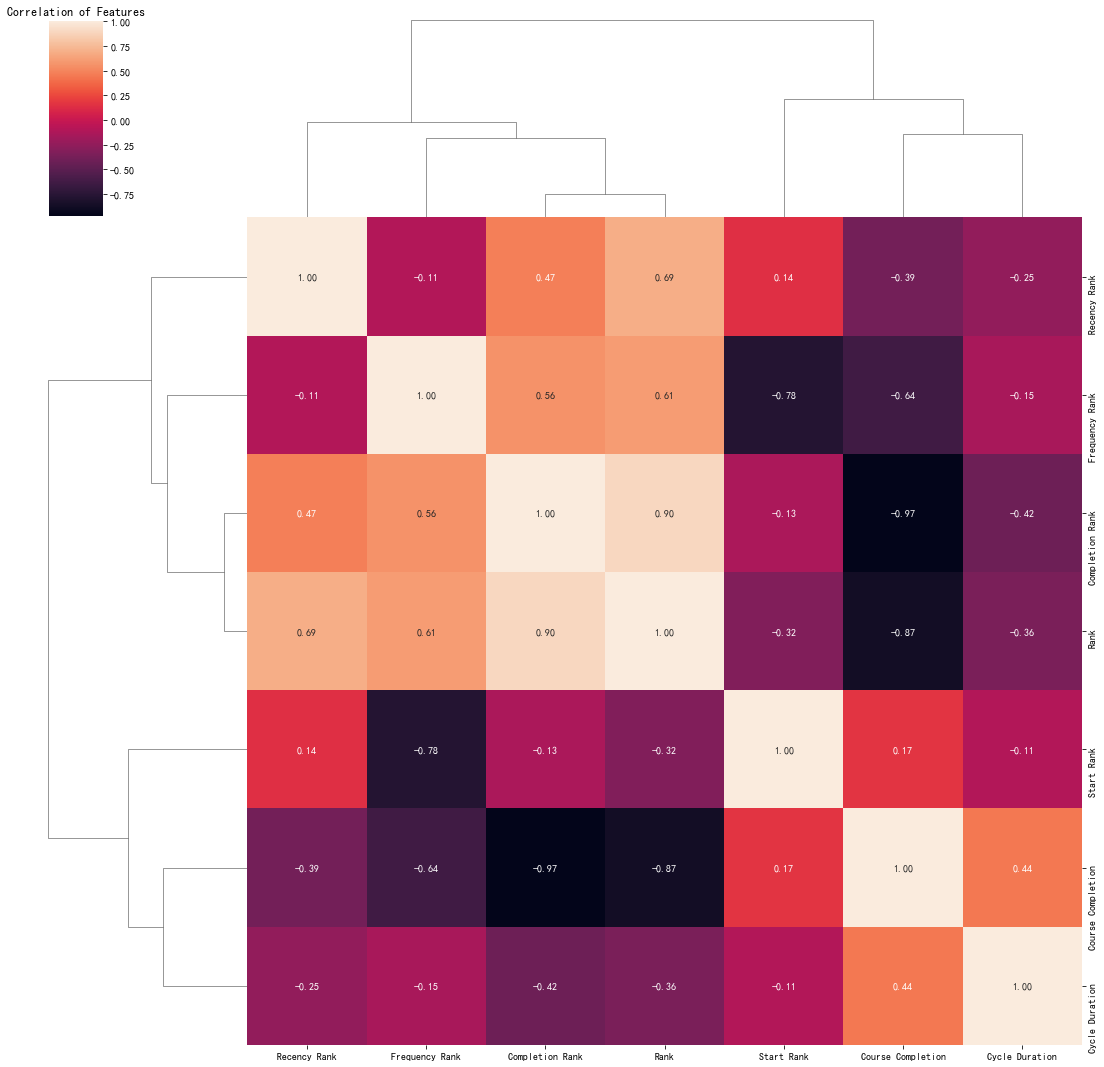

In [221]:
col_list = ['Recency Rank',	'Frequency Rank', 'Completion Rank', 'Course Completion', 'Start Rank', 'Rank', 'Cycle Duration']
corr_matrix = CC_CD_df[col_list].corr()
sns.clustermap(corr_matrix, annot=True, fmt=".2f", figsize = (15,15));
plt.title("Correlation of Features")

In [189]:
CC_CD_df.to_csv(r'Correlation\CC_CD_df.csv')

In [190]:
plot_r(CC_CD_df, 'Course Completion vs Cycle Duration', 'Course Completion', 'Cycle Duration', 'Course Completion vs Cycle Duration')

In [191]:
plot_r(CC_CD_df, 'Course Completion vs Cycle Duration', 'Recency Rank', 'Cycle Duration', 'Course Completion vs Cycle Duration')

### 计算Cycle Duration和Course Post-Test Score的相关性
1. 按CD_SALE_MEAN_df.FederationIdentifier和assessment_df.USER CODE内联得到CPT_CD_df
2. 输出结果CPT_CD_df
3. plot_r函数输出相关性图片并保存

In [192]:
CPT_CD_df = CD_SALE_MEAN_df.merge(assessment_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CPT_CD_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CPT_CD_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      AU     6AU2088           Volvo Cars Mosman             B-AMBRO3   
1      AU     6AU3112      Volvo Cars South Yarra               B-DEAN   
2      AU     6AU4008   Volvo Cars Brisbane North             B-GUNNI1   
3      AU     6AU4008   Volvo Cars Brisbane North             B-PA1000   
4      AU     6AU3206        Volvo Cars Melbourne             D-DIMAR1   
5      AU     6AU3206        Volvo Cars Melbourne             D-TAYL12   
6      AU     6AU3107        Volvo Cars Doncaster              D-ZERBI   
7      AU     6AU3107        Volvo Cars Doncaster               E-CHOW   
8      AU     6AU2014  Volvo Cars Rushcutters Bay              F-MILLS   
9      AU     6AU2040        Volvo Cars Five Dock              F-MILLS   
10     AU     6AU3112      Volvo Cars South Yarra             J-DAWSO1   
11     AU     6AU4213       Volvo Cars Gold Coast             J-FERGU3   
12     AU     6AU2014  Volvo Cars Rushcutters Bay               J-MA36   
13     AU     6AU7254       Volvo Cars Launceston             J-PEARC2   
14     AU     6AU2156       Volvo Cars Parramatta             L-LARKI1   
15     AU     6AU3112      Volvo Cars South Yarra             M-CHRAP1   
16     AU     6AU7254       Volvo Cars Launceston              M-DEAN1   
17     AU     6AU3112      Volvo Cars South Yarra             M-MOOR12   
18     AU     6AU3107        Volvo Cars Doncaster              O-SMITH   
19     AU     6AU3206        Volvo Cars Melbourne             S-AGRAWA   
20     AU     6AU3170         Volvo Cars Waverley             S-AITKEN   
21     AU     6AU2605         Volvo Cars Canberra             S-COLLI2   
22     AU     6AU2068        Volvo Cars Lindfield             T-BEAUMO   
23     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
24     AU     6AU3187         Volvo Cars Brighton              W-WONG5   

    Cycle Duration Min Opportunity Time START DATE   MARKET_y   REGION  \
0         0.596491  2021-05-26 23:33:57 2021-03-15  AUSTRALIA  Central   
1         0.000000  2021-09-17 01:36:58 2021-03-15  AUSTRALIA    South   
2         8.659091  2021-02-06 03:46:07 2019-08-09  AUSTRALIA    North   
3         4.571429  2021-02-08 04:54:02 2019-05-20  AUSTRALIA    North   
4         2.158824  2021-07-20 00:46:16 2019-07-19  AUSTRALIA    South   
5         3.418079  2021-06-09 02:18:16 2019-07-04  AUSTRALIA    South   
6         2.405172  2021-05-11 07:28:38 2020-02-10  AUSTRALIA    South   
7         1.450980  2021-07-28 06:56:09 2021-07-26  AUSTRALIA    South   
8         2.856383  2021-06-13 06:17:18 2020-08-22  AUSTRALIA  Central   
9         0.000000  2022-01-15 00:17:18 2020-08-22  AUSTRALIA  Central   
10        5.385714  2021-04-19 05:32:02 2020-01-28  AUSTRALIA    South   
11        1.400000  2021-09-10 00:44:14 2021-08-26  AUSTRALIA    North   
12        3.290323  2022-01-05 01:11:50 2020-03-21  AUSTRALIA  Central   
13        6.042553  2021-10-22 03:32:14 2021-06-28  AUSTRALIA    South   
14        8.225352  2021-11-07 11:24:20 2020-03-12  AUSTRALIA  Central   
15        1.510638  2021-07-19 04:31:42 2021-07-16  AUSTRALIA    South   
16        4.709677  2021-08-12 01:05:16 2020-10-15  AUSTRALIA    South   
17        5.433333  2021-11-16 23:39:46 2021-07-28  AUSTRALIA    South   
18        0.724138  2021-07-12 00:33:09 2021-03-12  AUSTRALIA    South   
19        1.804598  2021-08-03 07:54:36 2019-07-08  AUSTRALIA    South   
20        4.750000  2021-11-22 02:08:23 2021-07-22  AUSTRALIA    South   
21        9.971223  2021-07-27 00:30:33 2020-09-29  AUSTRALIA    South   
22        7.530864  2021-03-19 01:16:31 2020-12-17  AUSTRALIA  Central   
23        6.471264  2021-02-02 07:35:27 2020-03-11  AUSTRALIA    North   
24        0.596639  2021-12-22 23:29:34 2021-12-21  AUSTRALIA    South   

                 DEALER GROUP  ...   LAST NAME FIRST NAME USER CODE    TYPE  \
0                  SMA Motors  ...     Ambrose        Ben  B-AMBRO3  Cours

In [193]:
CPT_CD_df.to_csv(r'Correlation\CPT_CD_df.csv')

In [194]:
plot_r(CPT_CD_df, 'Course Post-Test Score vs Cycle Duration', 'Course Post-Test Score', 'Cycle Duration', 'Course Post-Test Score vs Cycle Duration')

### 计算Cycle Duration和Sales Learning Programme Completion的相关性
1. 按CD_SALE_MEAN_df.FederationIdentifier和complement_df.CDSID内联得到SLPC_CD_df
2. 输出结果SLPC_CD_df
3. plot_r函数输出相关性图片并保存

In [195]:
SLPC_CD_df = CD_SALE_MEAN_df.merge(complement_df, left_on=['DEALER CODE','FederationIdentifier'], right_on=['DEALER CODE','CDSID'], how='inner')
SLPC_CD_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
SLPC_CD_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0       IN     6IN6060               Central Volvo             A-ARORA2   
1       IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2       AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3       AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
4       IN     6IN6054                 Speed Volvo             A-KAPOOR   
..     ...         ...                         ...                  ...   
103     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
104     IN     6IN6045              Martial Motors                 V-MP   
105     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
106     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
107     IN     6IN6045              Martial Motors                  Y-A   

     Cycle Duration Min Opportunity Time START DATE_x   MARKET_y  \
0         79.541667  2020-10-26 00:00:00   2019-08-06      INDIA   
1          8.545455  2022-02-11 08:33:08   2022-01-18      INDIA   
2          1.819672  2021-09-21 03:34:51   2021-08-25  AUSTRALIA   
3          3.533333  2021-04-27 22:47:34   2020-03-12  AUSTRALIA   
4         16.304348  2021-01-29 10:24:12   2019-06-20      INDIA   
..              ...                  ...          ...        ...   
103       44.707317  2021-03-13 11:30:40   2021-03-11      INDIA   
104        1.444444  2022-02-18 08:31:31   2022-01-19      INDIA   
105        6.471264  2021-02-02 07:35:27   2020-03-11  AUSTRALIA   
106        0.596639  2021-12-22 23:29:34   2021-12-21  AUSTRALIA   
107       12.105263  2022-01-31 06:50:11   2022-01-22      INDIA   

                      DEALER_y     CDSID  ...  Frequency  Recency Rank  \
0                       Indore  A-ARORA2  ...   0.020909      0.038647   
1                     Gurugram  A-BISHT1  ...   0.117347      0.227053   
2           Volvo Cars Geelong  A-BOYLE2  ...   0.095436      0.792271   
3         Volvo Cars Lindfield  A-FRASER  ...   0.008685      0.560386   
4                      Lucknow  A-KAPOOR  ...   0.020158      0.159420   
..                         ...       ...  ...        ...           ...   
103                 Prabhadevi  V-KHATRI  ...   0.044487      0.038647   
104                  Bangalore      V-MP  ...   1.466667      0.908213   
105  Volvo Cars Brisbane North    W-BASS  ...   0.009206      0.333333   
106        Volvo Cars Brighton   W-WONG5  ...   0.056452      0.777778   
107                  Bangalore       Y-A  ...   2.200000      0.932367   

    Frequency Rank Completion Rank  Start Rank      Rank  Recency Binary  \
0         0.681159        0.202703    0.178744  0.270531               1   
1         0.275362        0.202703    0.729469  0.173913               1   
2         0.347826        0.202703    0.589372  0.449275               0   
3         0.917874        0.711712    0.299517  0.864734               0   
4         0.714976        0.202703    0.062802  0.309179               1   
..             ...             ...         ...       ...             ...   
103       0.487923        0.202703    0.415459  0.198068               1   
104       0.086957        0.355856    0.748792  0.463768               0   
105       0.898551        0.644144    0.289855  0.719807               1   
106       0.458937        0.711712    0.676329  0.758454               0   
107       0.004831        0.355856    0.792271  0.420290               0   

     Frequency Binary  Completion Binary  \
0                   0                  0   
1                   1                  1   
2                   1                  1   
3                   0                  0   
4                   0                  0   
..                ...                ...   
103                 1                  1   
104                 1                  1   
105                 0                  0   
106                 1                  1   


In [196]:
SLPC_CD_df.to_csv(r'Correlation\SLPC_CD_df.csv')

In [197]:
plot_r(SLPC_CD_df, 'Sales Learning Programme Completion(%) vs Cycle Duration', 'Sales Learning Programme Completion(%)', 'Cycle Duration', 'Sales Learning Programme Completion(%) vs Cycle Duration')

In [198]:
import datetime
# RFM统计
max_date = complement_df["LAST DATE"].max() + datetime.timedelta(days=1)
complement_df['Recency'] = (max_date - complement_df["LAST DATE"]).dt.days    # Recency
complement_df['Frequency'] = complement_df["Course Completion"] / ((complement_df['LAST DATE'] - complement_df['START DATE']).dt.days + 1)  # Frequency
# complement_df = pd.merge(complement_df, assessment_df[['USER CODE', 'Course Post-Test Score']], left_on='CDSID', right_on='USER CODE', how='left')

complement_df['Recency Rank'] = complement_df['Recency'].rank(method='min', ascending=True)
complement_df['Frequency Rank'] = complement_df['Frequency'].rank(method='min', ascending=False)
complement_df['Completion Rank'] = complement_df['Course Completion'].rank(method='min', ascending=False)
complement_df['Start Rank'] = complement_df['START DATE'].rank(method='min', ascending=True)
complement_df['Rank'] = complement_df['Recency Rank'] + complement_df['Frequency Rank'] + complement_df['Completion Rank']
complement_df['Rank'] = complement_df['Rank'].rank(method='min', ascending=True)

In [199]:
OP_TD_AFTER_SD_SALE_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      IN     6IN6060               Central Volvo             A-ARORA2   
1      IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2      AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
3      IN     6IN6054                 Speed Volvo             A-KAPOOR   
4      IN     6IN6061                   SPL Volvo               A-SAHA   
..    ...         ...                         ...                  ...   
92     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
93     IN     6IN6045              Martial Motors                 V-MP   
94     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
95     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
96     IN     6IN6045              Martial Motors                  Y-A   

    Test Drives Min Opportunity Time_x START DATE_x Max Test Drive Time  \
0           133    2020-11-23 00:00:00   2019-08-06 2022-08-10 08:28:18   
1            76    2022-01-25 09:18:41   2022-01-18 2022-08-18 06:24:07   
2           130    2021-10-23 00:56:04   2020-03-12 2022-08-18 23:04:35   
3            90    2020-12-12 09:35:52   2019-06-20 2022-08-25 08:10:02   
4           228    2020-12-16 06:10:17   2019-07-01 2022-08-05 10:40:53   
..          ...                    ...          ...                 ...   
92          315    2021-03-13 11:30:40   2021-03-11 2022-08-26 06:59:44   
93          164    2022-02-03 08:57:04   2022-01-19 2022-08-22 12:04:14   
94          188    2021-02-05 07:10:14   2020-03-11 2022-08-13 06:54:57   
95          112    2021-12-22 23:29:34   2021-12-21 2022-08-18 03:39:42   
96          180    2022-01-31 06:50:11   2022-01-22 2022-08-23 03:35:53   

    Daily Test Drives  Opportunities Min Opportunity Time_y START DATE_y  \
0            0.212460            212    2020-10-17 00:00:00   2019-08-06   
1            0.370732            101    2022-01-25 09:18:41   2022-01-18   
2            0.433333            382    2021-03-28 00:00:00   2020-03-12   
3            0.144928            109    2020-10-25 00:00:00   2019-06-20   
4            0.381271            411    2020-10-21 00:00:00   2019-07-01   
..                ...            ...                    ...          ...   
92           0.593220            327    2021-03-13 11:30:40   2021-03-11   
93           0.815920            181    2022-01-31 06:37:31   2022-01-19   
94           0.339350            636    2021-02-01 06:34:03   2020-03-11   
95           0.468619            211    2021-12-22 23:29:34   2021-12-21   
96           0.882353            223    2022-01-24 07:06:46   2022-01-22   

   Max Opportunity Time  Daily Opportunities  \
0   2022-08-16 05:53:38             0.316891   
1   2022-08-18 06:24:04             0.492683   
2   2022-08-18 23:04:33             0.750491   
3   2022-08-10 12:08:29             0.166412   
4   2022-08-14 05:46:39             0.619910   
..                  ...                  ...   
92  2022-08-26 06:59:14             0.615819   
93  2022-08-19 10:50:20             0.900498   
94  2022-08-18 04:42:49             1.129663   
95  2022-08-18 03:39:37             0.882845   
96  2022-08-19 14:21:26             1.072115   

    Opportunities to Test Drive Rate(%)  
0                                 62.74  
1                                 75.25  
2                                 34.03  
3                                 82.57  
4                                 55.47  
..                                  ...  
92                                96.33  
93                                90.61  
94                                29.56  
95                                53.08  
96                                80.72  

[97 rows x 15 columns]